## Contents

In [9]:
# Overview
# Imports
# Load train.csv
# Split the data into train, val, test
# Try a baseline RandomForest
# Reload original data
# Check for duplicates
# Check Multicolinearity
# Check which variables are really categorical
# Drop useless columns
# Fill missing values
# Check for outliers - not applied to final model
# Check skewed features - not applied to final model
# Check linear regression criterias
# Decide on columns for last time
# Try models
#     Linear regression
#         Vanialla
#         Elasticnet
#         Lasso
#         Ridge
#     Backward Feature Elimination
#         mlxtend
#         statsmodel
#     XGBRegressor
#         Try a baseline
#         Try Tuning
#     DTRegressor
#         Try a baseline
#         Try Tuning
#     Random Forest Regressor
#         Try a baseline
#         Try Tuning

## Overview

This notebook uses the Ames Housing dataset provided in the Kaggle competition - "House Prices - Advanced Regression Techniques".
<br> Link to competition page - 
<br> https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

The Ames Housing dataset was compiled by Dean De Cock for use in data science education. 
<br> It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. 
http://jse.amstat.org/v19n3/decock.pdf

Our objective is to predict the price of a house given the descriptive features of it.
<br> Target variable is - SalePrice and Metric is RMSE

The description given about metric on Kaggle page is this -

"Submissions are evaluated on Root-Mean-Squared-Error (RMSE) between the logarithm of the predicted value and the logarithm of the observed sales price. (Taking logs means that errors in predicting expensive houses and cheap houses will affect the result equally.)"

The submission format should be like this - 

Id,SalePrice
<br>1461,169000.1
<br>1462,187724.1233
<br>1463,175221
<br>etc.

The train and test data is given. As expected the test data does not have the saleprice column in it.
<br> Both Train and Test data has 80 feature columns, train has the target column too making it 81 for Train data.

Files given on Kaggle:
    
train.csv - the training set
<br>test.csv - the test set
<br>data_description.txt - full description of each column, originally prepared by Dean De Cock but lightly edited to match the column names used here
<br>sample_submission.csv - a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms

Here's a brief version of what you'll find in the data description file.
<br>SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.<br>MSSubClass: The building class<br>MSZoning: The general zoning classification<br>LotFrontage: Linear feet of street connected to property<br>LotArea: Lot size in square feet<br>Street: Type of road access<br>Alley: Type of alley access<br>LotShape: General shape of property<br>LandContour: Flatness of the property<br>Utilities: Type of utilities available<br>LotConfig: Lot configuration<br>LandSlope: Slope of property<br>Neighborhood: Physical locations within Ames city limits<br>Condition1: Proximity to main road or railroad<br>Condition2: Proximity to main road or railroad (if a second is present)<br>BldgType: Type of dwelling<br>HouseStyle: Style of dwelling<br>OverallQual: Overall material and finish quality<br>OverallCond: Overall condition rating<br>YearBuilt: Original construction date<br>YearRemodAdd: Remodel date<br>RoofStyle: Type of roof<br>RoofMatl: Roof material<br>Exterior1st: Exterior covering on house<br>Exterior2nd: Exterior covering on house (if more than one material)<br>MasVnrType: Masonry veneer type<br>MasVnrArea: Masonry veneer area in square feet<br>ExterQual: Exterior material quality<br>ExterCond: Present condition of the material on the exterior<br>Foundation: Type of foundation<br>BsmtQual: Height of the basement<br>BsmtCond: General condition of the basement<br>BsmtExposure: Walkout or garden level basement walls<br>BsmtFinType1: Quality of basement finished area<br>BsmtFinSF1: Type 1 finished square feet<br>BsmtFinType2: Quality of second finished area (if present)<br>BsmtFinSF2: Type 2 finished square feet<br>BsmtUnfSF: Unfinished square feet of basement area<br>TotalBsmtSF: Total square feet of basement area<br>Heating: Type of heating<br>HeatingQC: Heating quality and condition<br>CentralAir: Central air conditioning<br>Electrical: Electrical system<br>1stFlrSF: First Floor square feet<br>2ndFlrSF: Second floor square feet<br>LowQualFinSF: Low quality finished square feet (all floors)<br>GrLivArea: Above grade (ground) living area square feet<br>BsmtFullBath: Basement full bathrooms<br>BsmtHalfBath: Basement half bathrooms<br>FullBath: Full bathrooms above grade<br>HalfBath: Half baths above grade<br>Bedroom: Number of bedrooms above basement level<br>Kitchen: Number of kitchens<br>KitchenQual: Kitchen quality<br>TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)<br>Functional: Home functionality rating<br>Fireplaces: Number of fireplaces<br>FireplaceQu: Fireplace quality<br>GarageType: Garage location<br>GarageYrBlt: Year garage was built<br>GarageFinish: Interior finish of the garage<br>GarageCars: Size of garage in car capacity<br>GarageArea: Size of garage in square feet<br>GarageQual: Garage quality<br>GarageCond: Garage condition<br>PavedDrive: Paved driveway<br>WoodDeckSF: Wood deck area in square feet<br>OpenPorchSF: Open porch area in square feet<br>EnclosedPorch: Enclosed porch area in square feet<br>3SsnPorch: Three season porch area in square feet<br>ScreenPorch: Screen porch area in square feet<br>PoolArea: Pool area in square feet<br>PoolQC: Pool quality<br>Fence: Fence quality<br>MiscFeature: Miscellaneous feature not covered in other categories<br>MiscVal: $Value of miscellaneous feature<br>MoSold: Month Sold<br>YrSold: Year Sold<br>SaleType: Type of sale<br>SaleCondition: Condition of sale

## Imports

In [10]:
import warnings
warnings.filterwarnings("ignore")
import time

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.special import boxcox1p
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.linear_model import LinearRegression
import statsmodels.regression.linear_model as sm
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressorr̥
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso, Ridge

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.stattools import durbin_watson

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

## Loading the data

In [11]:
df = pd.read_csv('train.csv')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

There are 1460 rows. Some of them have missing values.

## Try Baseline

In [13]:
ndf = df.copy()

le = preprocessing.LabelEncoder()
ndf = ndf.apply(le.fit_transform)

features = ndf.drop(['SalePrice'], axis = 1)
target = ndf['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.20, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.50, random_state=42)

print('X_train: ', len(X_train), ' y_train: ', len(y_train))
print('X_val: ', len(X_val), ' y_val: ', len(y_val))
print('X_test: ', len(X_test), ' y_test: ', len(y_test))

X_train:  1168  y_train:  1168
X_val:  146  y_val:  146
X_test:  146  y_test:  146


In [14]:
ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   MSZoning       1460 non-null   int32
 3   LotFrontage    1460 non-null   int64
 4   LotArea        1460 non-null   int64
 5   Street         1460 non-null   int32
 6   Alley          1460 non-null   int32
 7   LotShape       1460 non-null   int32
 8   LandContour    1460 non-null   int32
 9   Utilities      1460 non-null   int32
 10  LotConfig      1460 non-null   int32
 11  LandSlope      1460 non-null   int32
 12  Neighborhood   1460 non-null   int32
 13  Condition1     1460 non-null   int32
 14  Condition2     1460 non-null   int32
 15  BldgType       1460 non-null   int32
 16  HouseStyle     1460 non-null   int32
 17  OverallQual    1460 non-null   int64
 18  OverallCond    1460 non-null   int64
 19  YearBu

In [15]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

regressor.fit(X_train, y_train) 

y_pred = regressor.predict(X_train)

rms = sqrt(mean_squared_error(y_train, y_pred))
r2 = (r2_score(y_train, y_pred))
print('Train: ',rms, r2)

y_pred = regressor.predict(X_val)

rms = sqrt(mean_squared_error(y_val, y_pred))
r2 = (r2_score(y_val, y_pred))
print('Val: ',rms, r2)

# Train:  21.49352618964763 0.983618006494901
# Val:  49.14163049045355 0.9173903608878979

Train:  21.49352618964763 0.983618006494901
Val:  49.14163049045355 0.9173903608878979


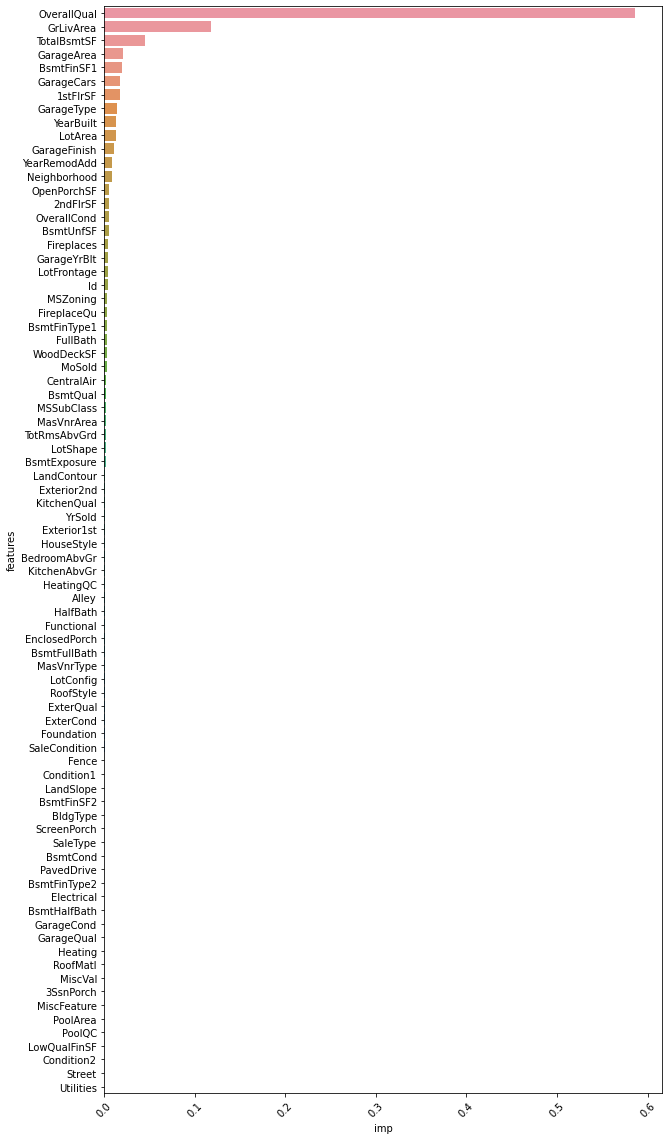

In [16]:
imp_df = pd.DataFrame({'features':X_train.columns, 'imp':regressor.feature_importances_}).sort_values(by=['imp'], ascending=False)
plt.figure(figsize=(10,20))
plt.xticks(rotation=45)
sns.barplot(x=imp_df.imp, y=imp_df.features)
plt.show()

In [17]:
imp_df[:12]

features       imp
17   OverallQual  0.586560
46     GrLivArea  0.117834
38   TotalBsmtSF  0.044983
62    GarageArea  0.020556
34    BsmtFinSF1  0.020272
61    GarageCars  0.018131
43      1stFlrSF  0.017935
58    GarageType  0.014508
19     YearBuilt  0.013643
4        LotArea  0.012901
60  GarageFinish  0.011543
20  YearRemodAdd  0.009216

The model is suffering from overfitting and now we have some idea about which features might be important for us.
<br>We will clean the data and prepare for a Linear Regression model also we will check how features affect each other and the target variable more closely and in an interpretable manner.
<br>Also we will look into the missing values and do extensive EDA to learn more about the story behind the data.

## Reload the data

In [18]:
df = pd.read_csv('train.csv')

features = df.drop(['SalePrice'], axis = 1)
target = df['SalePrice']

X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.20, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.50, random_state=42)

print('X_train: ', len(X_train), ' y_train: ', len(y_train))
print('X_val: ', len(X_val), ' y_val: ', len(y_val))
print('X_test: ', len(X_test), ' y_test: ', len(y_test))

X_train:  1168  y_train:  1168
X_val:  146  y_val:  146
X_test:  146  y_test:  146


In [19]:
X_train['SalePrice'] = y_train
df = X_train

## Duplicate observations

In [20]:
len(df[df.duplicated()])

0

In [21]:
ndf = df.drop(['Id'], axis=1)
len(ndf[ndf.duplicated()])

0

Confimed that we do not have any duplicate entries.

## Multicolinearity

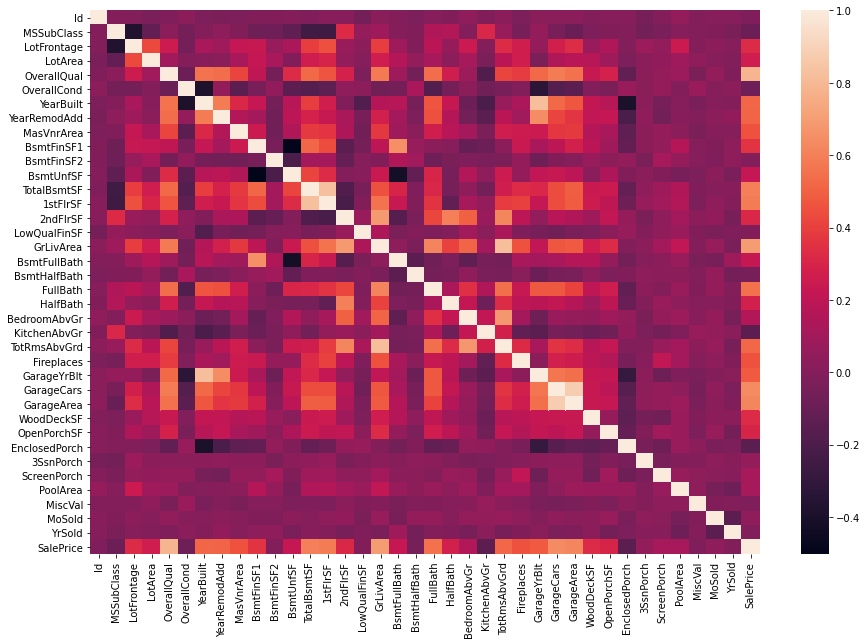

In [22]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr())
plt.show()

In [23]:
for i in range(len(df.corr())):
    for j in range(len(df.corr())):
        if i<j:
            val = df.corr()[df.corr()r̥].iloc[i,j]
            if (val<1) and (val>0.7) :
                print(df.corr().columns[i],' ~ ',df.corr().columns[j])

OverallQual  ~  SalePrice
YearBuilt  ~  GarageYrBlt
TotalBsmtSF  ~  1stFlrSF
GrLivArea  ~  TotRmsAbvGrd
GarageCars  ~  GarageArea


Most important features : OverallQual, GrLivArea  because they are correlated with target.

Features to choose from:
    
    YearBuilt  ~  GarageYrBlt
    TotalBsmtSF  ~  1stFlrSF
    GrLivArea  ~  TotRmsAbvGrd
    GarageCars  ~  GarageArea

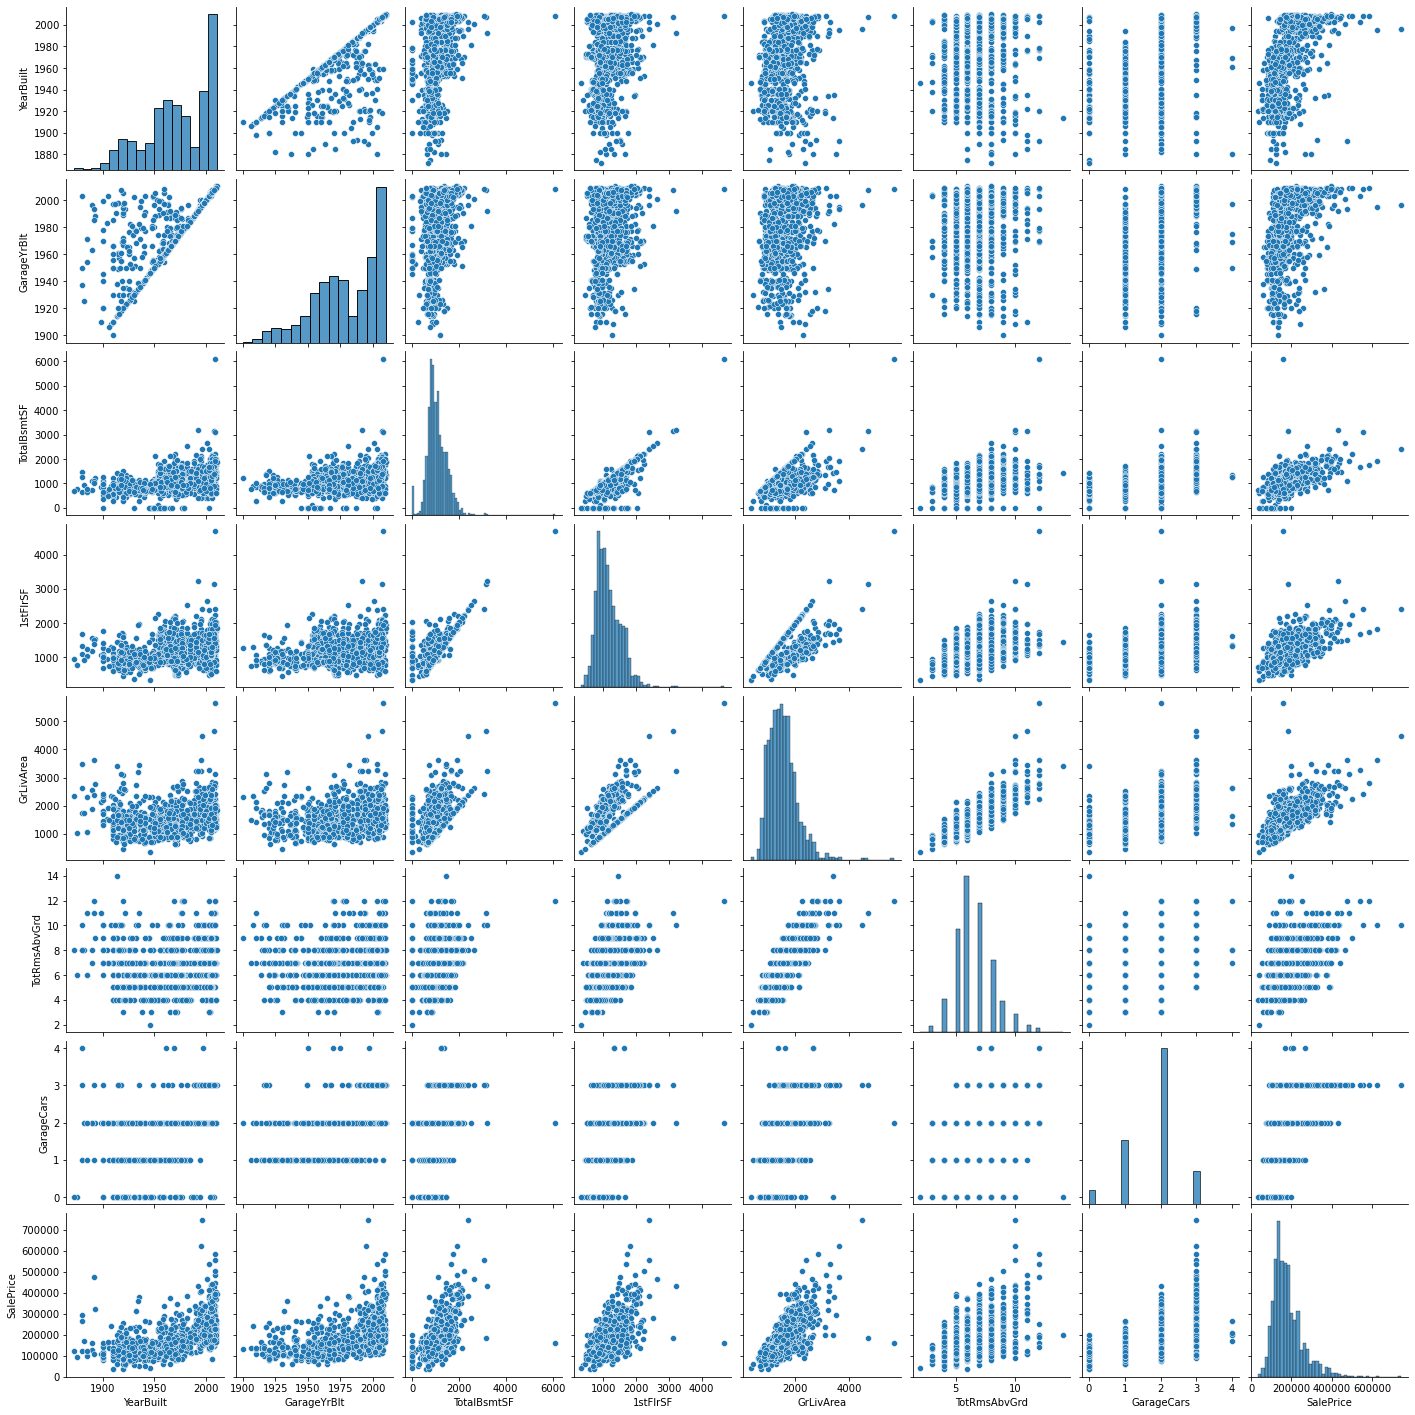

In [24]:
sns.pairplot(df[['YearBuilt', 'GarageYrBlt', 'TotalBsmtSF', 
                '1stFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 'GarageCars', 'SalePrice']])

In [25]:
df[['YearBuilt', 'GarageYrBlt', 'TotalBsmtSF', 
    '1stFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 'GarageCars', 'SalePrice']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 254 to 1126
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YearBuilt     1168 non-null   int64  
 1   GarageYrBlt   1104 non-null   float64
 2   TotalBsmtSF   1168 non-null   int64  
 3   1stFlrSF      1168 non-null   int64  
 4   GrLivArea     1168 non-null   int64  
 5   TotRmsAbvGrd  1168 non-null   int64  
 6   GarageCars    1168 non-null   int64  
 7   SalePrice     1168 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 82.1 KB


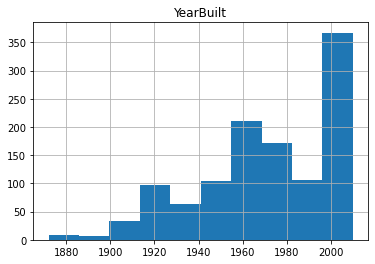

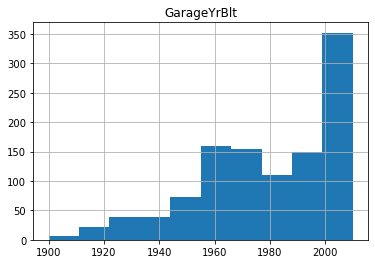

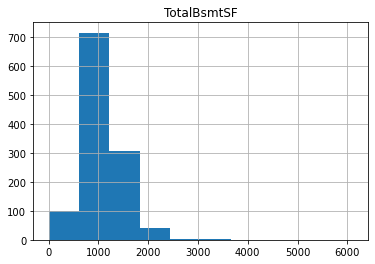

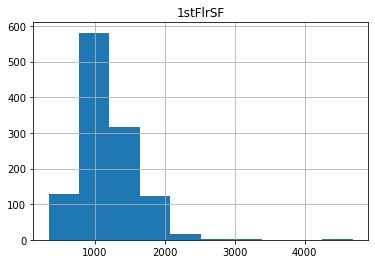

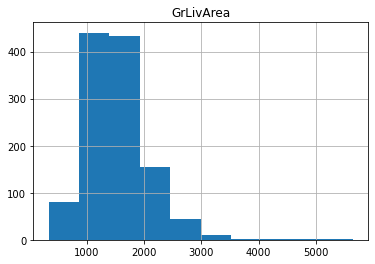

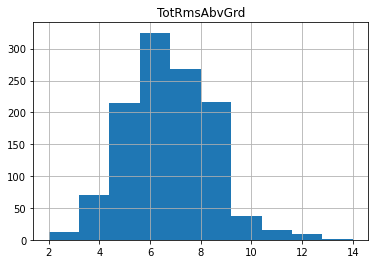

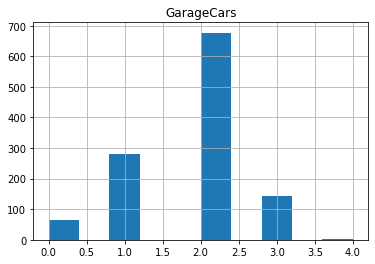

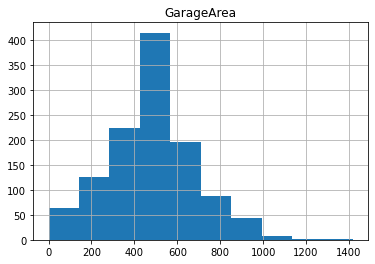

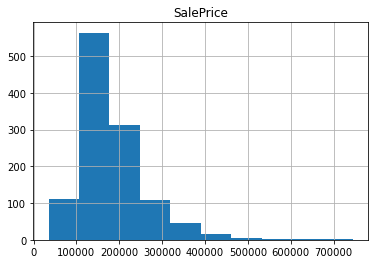

In [26]:
for i in ['YearBuilt', 'GarageYrBlt', 'TotalBsmtSF', 
    '1stFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice']:
    plt.title(i)
    df[i].hist()
    plt.show()

Before choosing between two variables I want to check who has higher correlation with target and has better distribution and less no of nulls.

In [27]:
high_corr_target = df.corr().SalePrice.sort_values()
for i in ['YearBuilt', 'GarageYrBlt', 'TotalBsmtSF', 
    '1stFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice']:
    print(i, round(high_corr_target[i], 2))

YearBuilt 0.52
GarageYrBlt 0.48
TotalBsmtSF 0.6
1stFlrSF 0.59
GrLivArea 0.7
TotRmsAbvGrd 0.52
GarageCars 0.64
GarageArea 0.62
SalePrice 1.0


Deciding between variables which are highly correlated:
    
    YearBuilt  ~  GarageYrBlt -> I pick YearBuilt
    TotalBsmtSF  ~  1stFlrSF  -> I pick 1stFlrSF
    GrLivArea  ~  TotRmsAbvGrd-> I pick GrLivArea
    GarageCars  ~  GarageArea -> I pick GarageArea
    
Also we need to remember the variables with high correlation with the target:
    
    OverallQual, GrLivArea 

Let's see our choices:

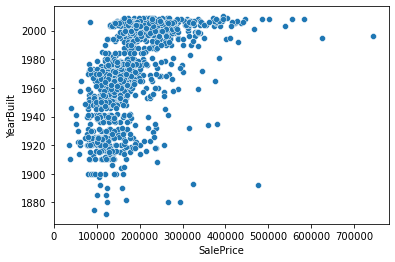

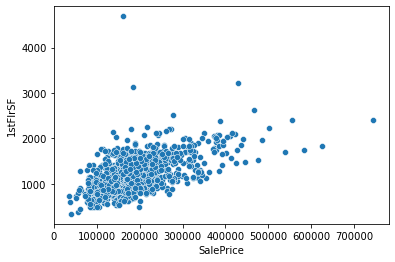

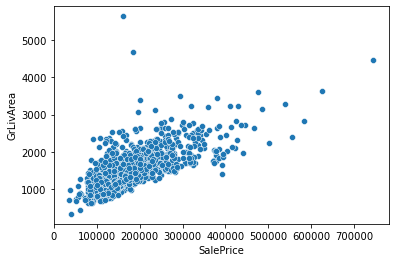

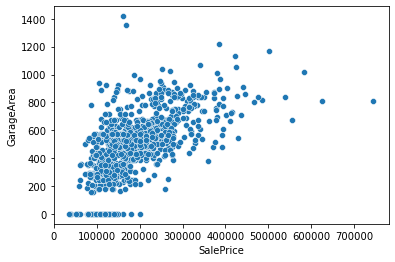

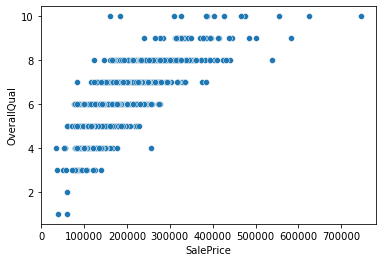

In [28]:
# 
for i in ['YearBuilt', '1stFlrSF', 'GrLivArea', 'GarageArea', 'OverallQual']:
    sns.scatterplot(data = df, x='SalePrice', y=i)
    plt.show()

If we look into OverallQual column, we will find that - houses with 8 and above rating starts at median price at 160000 around.
Houses with 9 rating starts at 200000 and with 10 rating at 300000, however the rating 10 has few outliers.

In [29]:
df = df.drop(['GarageYrBlt', 'TotalBsmtSF', 'TotRmsAbvGrd', 'GarageCars'], axis=1)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 254 to 1126
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    951 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          74 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  Overal

So now we are left with 77 columns only.

We should drop the Id column rightaway as it doesn't help in anyway.

In [31]:
df = df.drop(['Id'], axis=1)

In [32]:
len(df.columns)

76

## Check if potentially categorical

In [33]:
pd.options.display.max_columns = 100
df.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
254           20       RL         70.0     8400   Pave   NaN      Reg   
1066          60       RL         59.0     7837   Pave   NaN      IR1   
638           30       RL         67.0     8777   Pave   NaN      Reg   
799           50       RL         60.0     7200   Pave   NaN      Reg   
380           50       RL         50.0     5000   Pave  Pave      Reg   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
254          Lvl    AllPub    Inside       Gtl        NAmes       Norm   
1066         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
638          Lvl    AllPub    Inside       Gtl      Edwards      Feedr   
799          Lvl    AllPub    Corner       Gtl        SWISU      Feedr   
380          Lvl    AllPub    Inside       Gtl        SWISU       Norm   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
254        Norm     1Fam     1Story            5            6       1957   
1066       Norm     1Fam     2Story            6            7       1993   
638        Norm     1Fam     1Story            5            7       1910   
799        Norm     1Fam     1.5Fin            5            7       1937   
380        Norm     1Fam     1.5Fin            5            6       1924   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
254           1957     Gable  CompShg     MetalSd     MetalSd       None   
1066          1994     Gable  CompShg     VinylSd     VinylSd       None   
638           1950     Gable  CompShg     MetalSd     Wd Sdng       None   
799           1950     Gable  CompShg     Wd Sdng     Wd Sdng    BrkFace   
380           1950     Gable  CompShg     BrkFace     Wd Sdng       None   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
254          0.0        TA        Gd     CBlock       TA       TA   
1066         0.0        Gd        TA      PConc       Gd       TA   
638          0.0        TA        TA     CBlock       Fa       TA   
799        252.0        TA        TA     BrkTil       Gd       TA   
380          0.0        TA        TA     BrkTil       TA       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
254            No          Rec         922          Unf           0   
1066           No          Unf           0          Unf           0   
638            No          Unf           0          Unf           0   
799            No          ALQ         569          Unf           0   
380            No          LwQ         218          Unf           0   

      BsmtUnfSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
254         392    GasA        TA          Y      SBrkr      1314         0   
1066        799    GasA        Gd          Y      SBrkr       799       772   
638         796    GasA        Gd          Y      FuseA       796         0   
799         162    GasA        Ex          Y      SBrkr       981       787   
380         808    GasA        TA          Y      SBrkr      1026       665   

      LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
254              0       1314             1             0         1         0   
1066             0       1571             0             0         2         1   
638              0        796             0             0         1         0   
799              0       1768             1             0         1         1   
380              0       1691             0             0         2         0   

      BedroomAbvGr  KitchenAbvGr KitchenQual Functional  Fireplaces  \
254              3             1          TA        Typ           0   
1066             3             1          TA        Typ           1   
638              2             1          TA        Typ           0   
799              3             1          Gd        Typ           2   
380              3             1          Gd     

From data dictionary I have decided to convert some columns to categorical.

In [34]:
df[['OverallQual',   
    'OverallCond',  
    'YearBuilt',
    'YearRemodAdd',
    'Fireplaces',
    'MoSold',
    'YrSold']] = df[['OverallQual',   
                    'OverallCond',  
                    'YearBuilt',
                    'YearRemodAdd',
                    'Fireplaces',
                    'MoSold',
                    'YrSold']].astype(object)
# df.info()

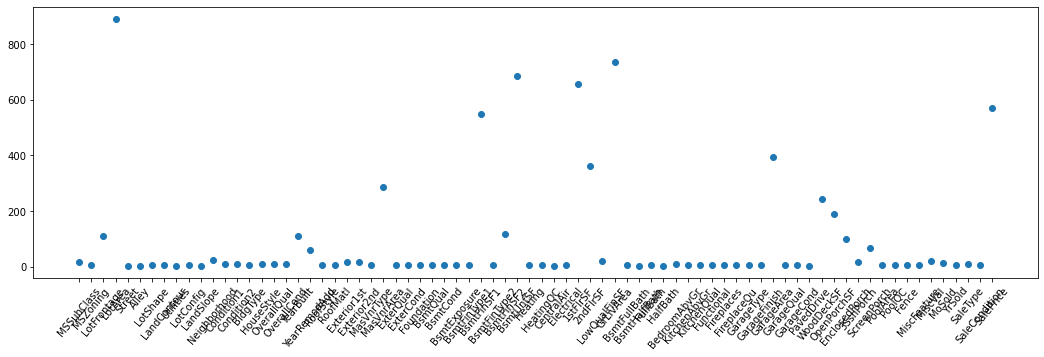

In [35]:
lens = []
for i in df.columns:
    lens.append(len(df[i].unique()))
plt.figure(figsize=(18,5))
plt.scatter(df.columns, lens)
plt.xticks(rotation=50)
plt.show()

As most columns have low no of distinct values, they are potentially categorical columns.

In [36]:
for i in df.columns:
    print(i, len(df[i].unique()))

MSSubClass 15
MSZoning 5
LotFrontage 108
LotArea 890
Street 2
Alley 3
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
OverallQual 10
OverallCond 9
YearBuilt 111
YearRemodAdd 61
RoofStyle 6
RoofMatl 7
Exterior1st 15
Exterior2nd 16
MasVnrType 5
MasVnrArea 287
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 5
BsmtCond 5
BsmtExposure 5
BsmtFinType1 7
BsmtFinSF1 549
BsmtFinType2 7
BsmtFinSF2 118
BsmtUnfSF 685
Heating 6
HeatingQC 5
CentralAir 2
Electrical 5
1stFlrSF 657
2ndFlrSF 361
LowQualFinSF 20
GrLivArea 734
BsmtFullBath 4
BsmtHalfBath 3
FullBath 4
HalfBath 3
BedroomAbvGr 8
KitchenAbvGr 4
KitchenQual 4
Functional 7
Fireplaces 4
FireplaceQu 6
GarageType 7
GarageFinish 4
GarageArea 394
GarageQual 6
GarageCond 6
PavedDrive 3
WoodDeckSF 244
OpenPorchSF 188
EnclosedPorch 98
3SsnPorch 17
ScreenPorch 66
PoolArea 7
PoolQC 4
Fence 5
MiscFeature 5
MiscVal 19
MoSold 12
YrSold 5
SaleType 9
SaleCondition 6
SalePrice 571


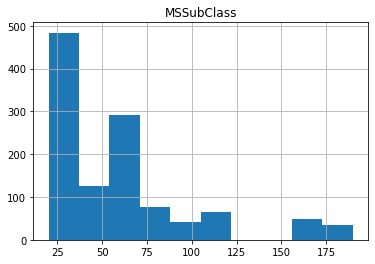

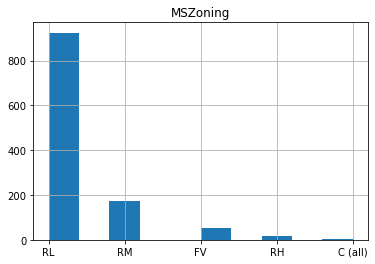

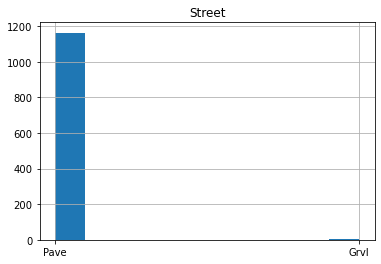

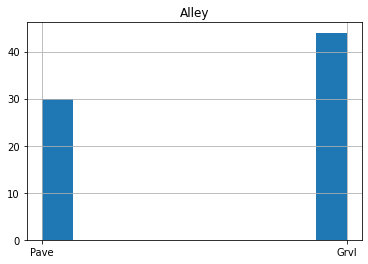

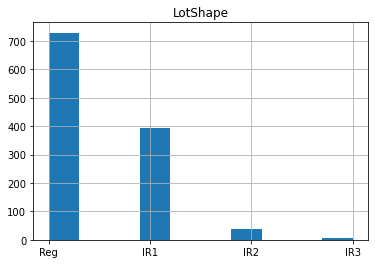

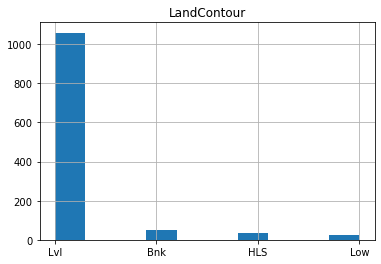

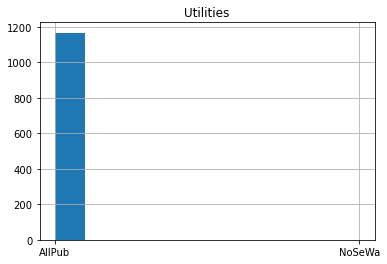

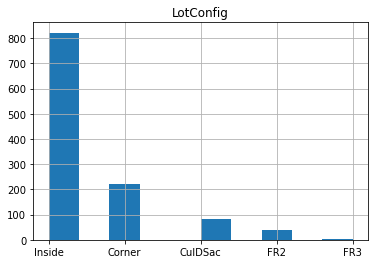

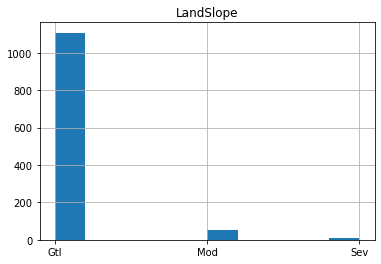

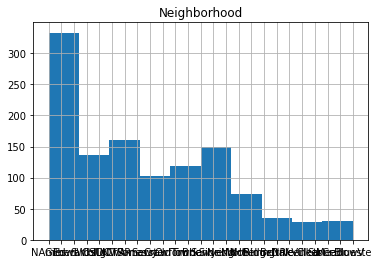

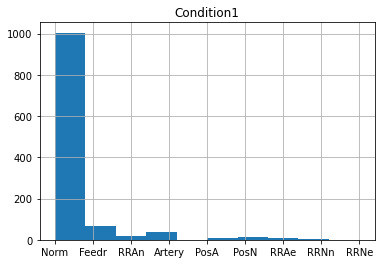

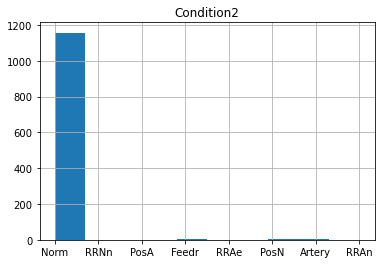

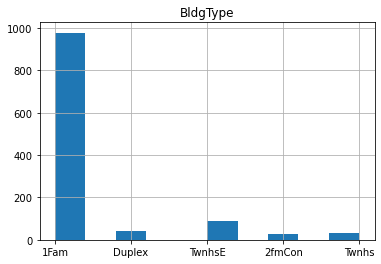

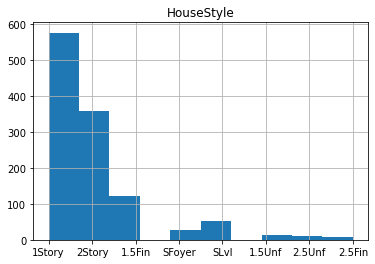

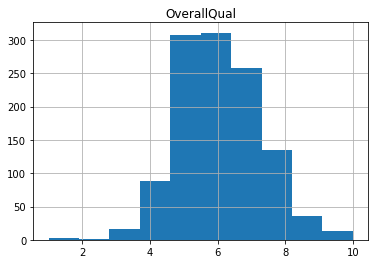

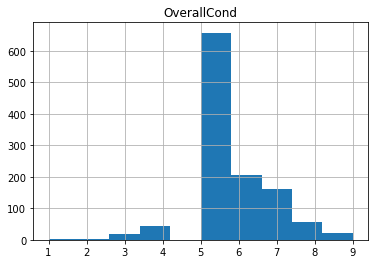

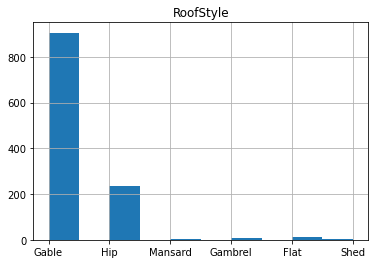

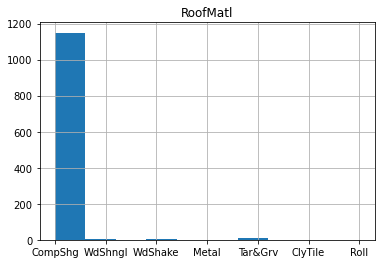

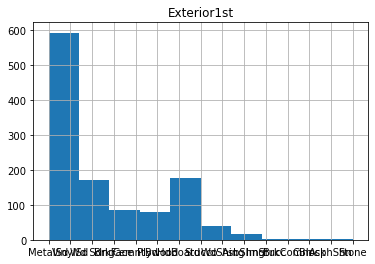

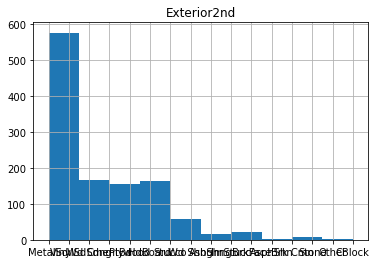

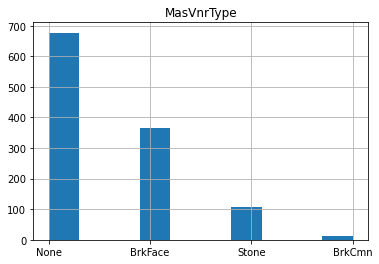

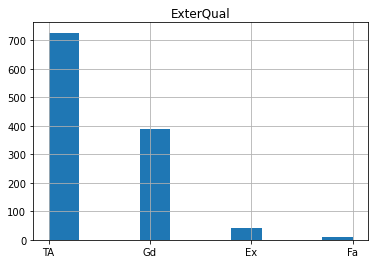

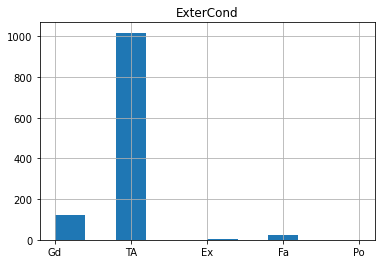

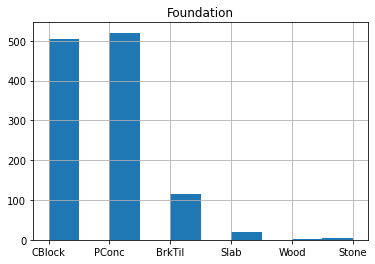

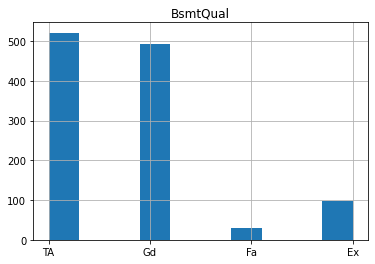

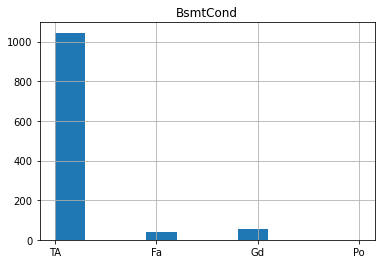

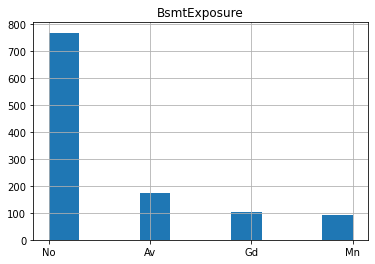

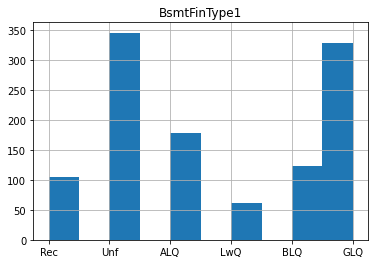

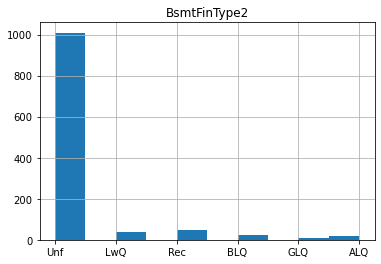

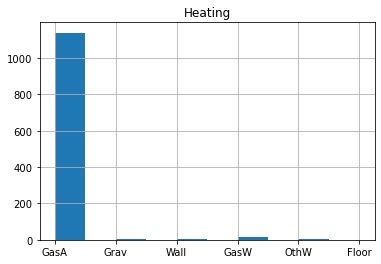

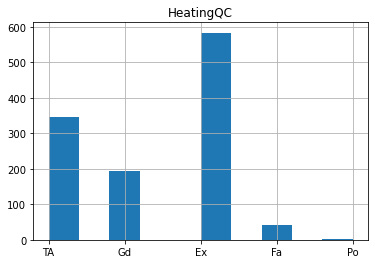

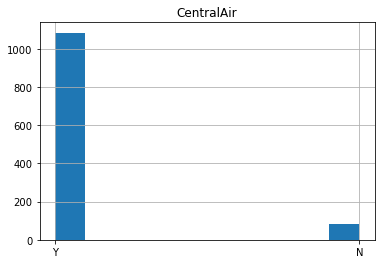

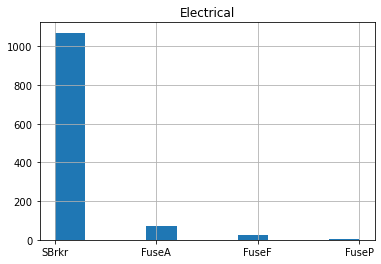

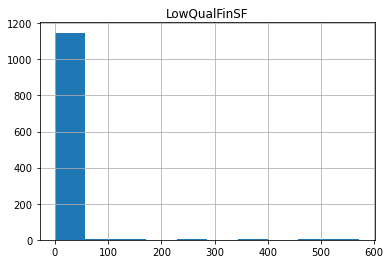

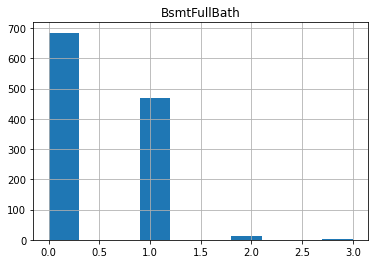

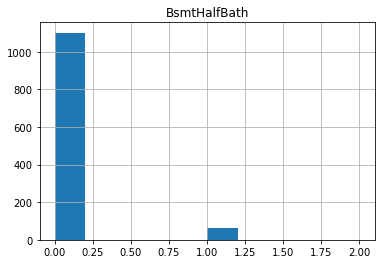

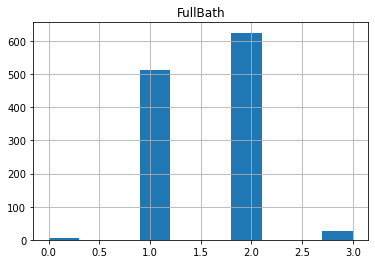

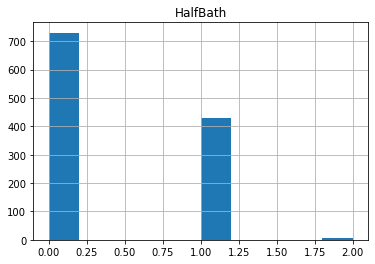

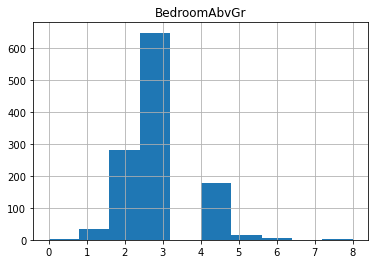

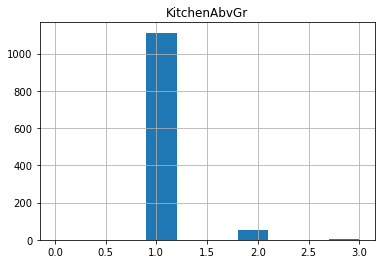

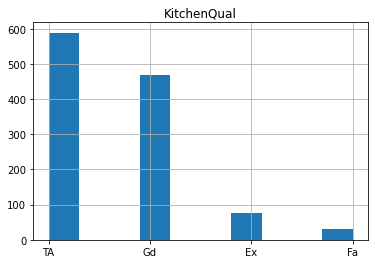

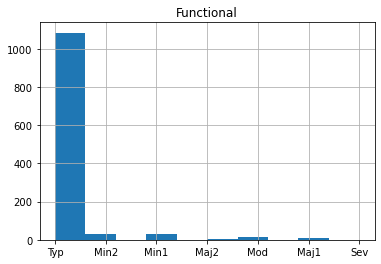

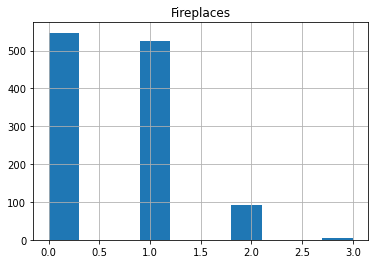

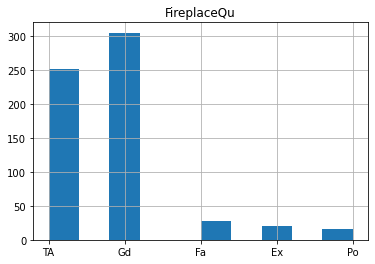

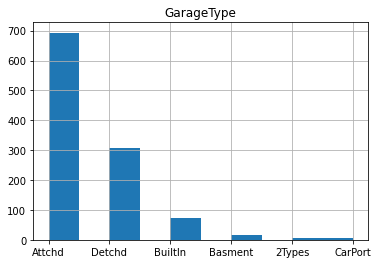

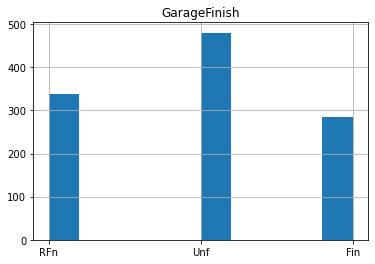

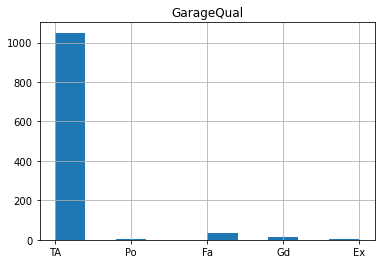

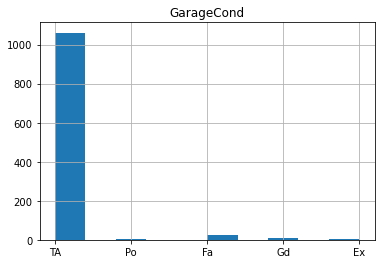

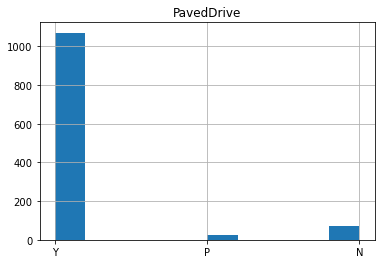

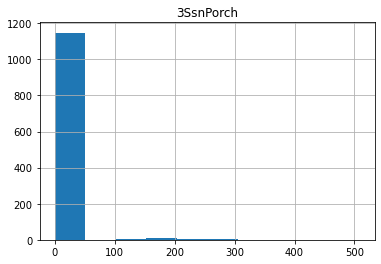

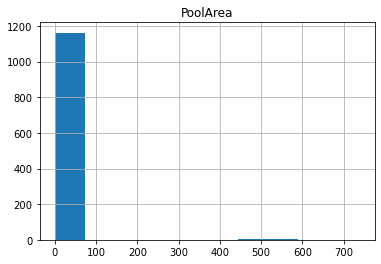

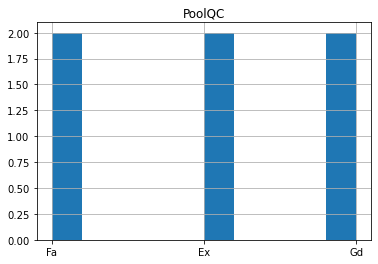

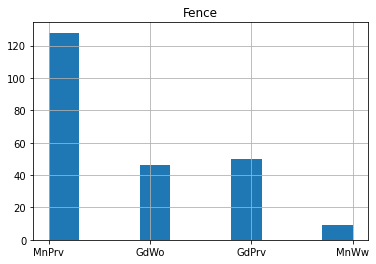

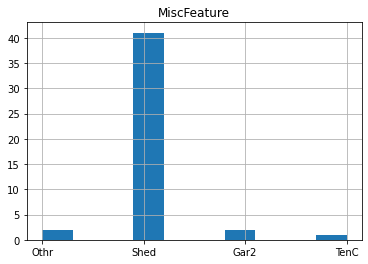

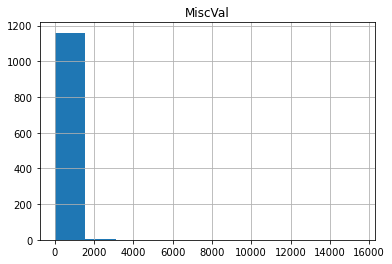

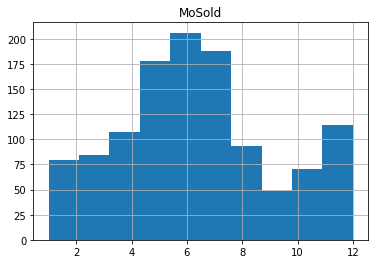

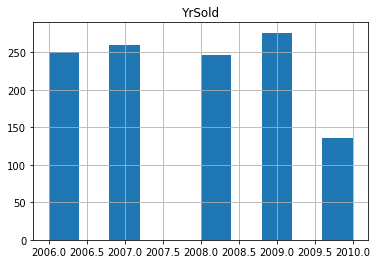

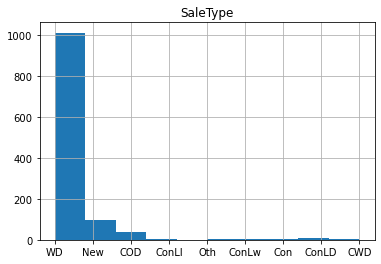

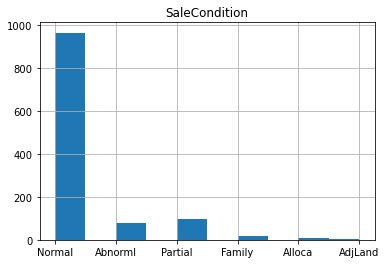

In [37]:
potentially_cat = []
for i in df.columns:
    if len(df[i].unique())<26:
        plt.title(i)
        df[i].hist()
        plt.show()
        potentially_cat.append(i)

Except MiscVal, everything is categorical. So we should convert them to object type.

In [38]:
df[potentially_cat] = df[potentially_cat].astype(object)

Lets check how many cat and how many num columns are there at this point.

In [39]:
print('Cat:', len(df.select_dtypes(include=[object]).columns))
print('Num:', len(df.select_dtypes(include=['int64', 'float64']).columns))

Cat: 61
Num: 15


## Drop useless categorical columns

Now lets check if any categorical column is useless. For example if we have a binary col with one column taking 90% of the values, then that column is useless, because there should be good split among categories.

In [40]:
obj_type_cols = df.select_dtypes(include=[object]).columns

In [41]:
critical_cols = []

for i in obj_type_cols:
    a = round(df[i].value_counts() / len(df) * 100)
    if any(i>80 for i in a):
        print(i)
        critical_cols.append(i)

Street
LandContour
Utilities
LandSlope
Condition1
Condition2
BldgType
RoofMatl
ExterCond
BsmtCond
BsmtFinType2
Heating
CentralAir
Electrical
LowQualFinSF
BsmtHalfBath
KitchenAbvGr
Functional
GarageQual
GarageCond
PavedDrive
3SsnPorch
PoolArea
MiscVal
SaleType
SaleCondition


So these are categorical columns with more than 80% values in one category.
<br>Let's check their distributions.

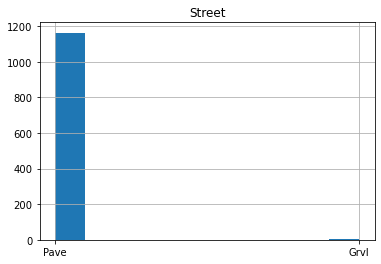

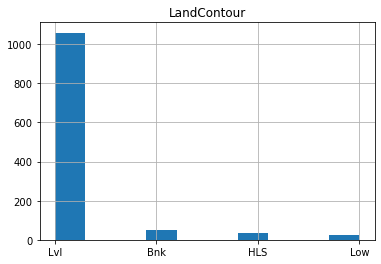

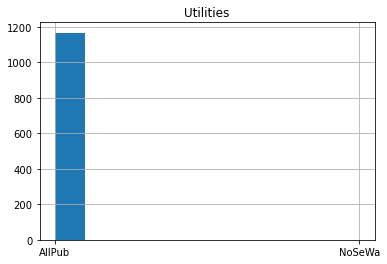

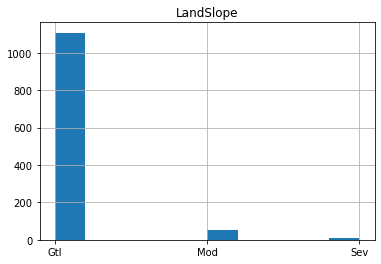

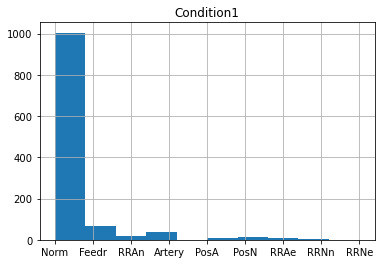

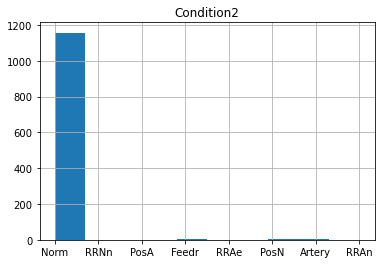

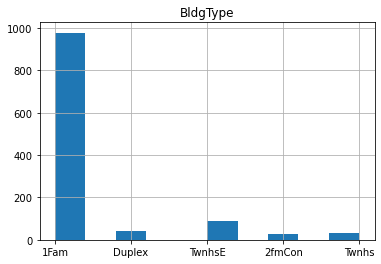

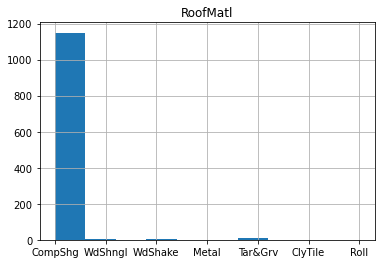

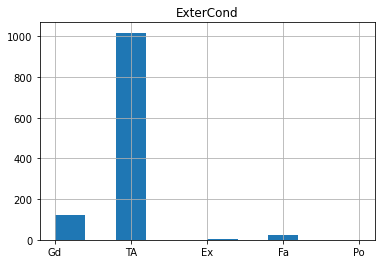

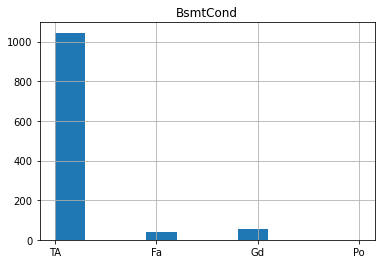

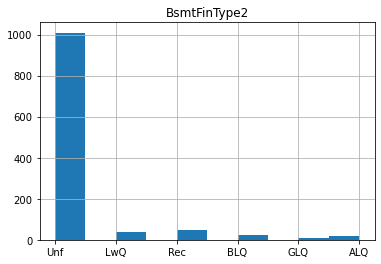

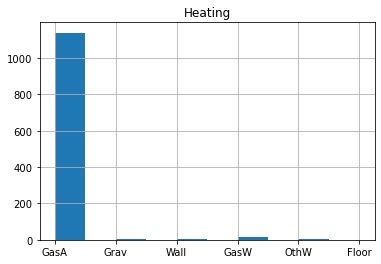

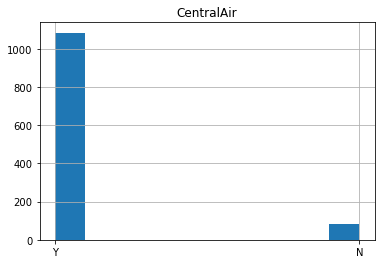

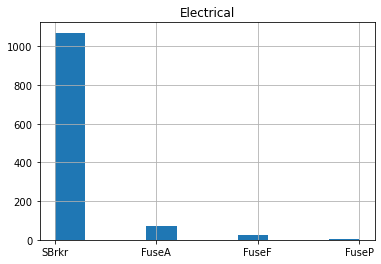

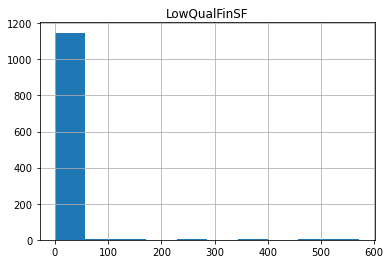

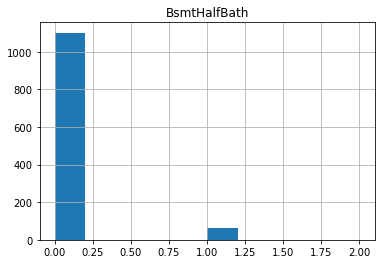

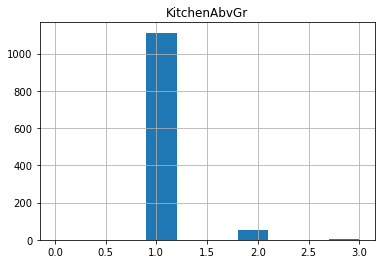

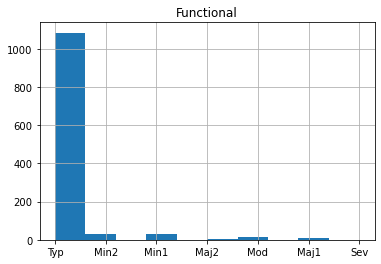

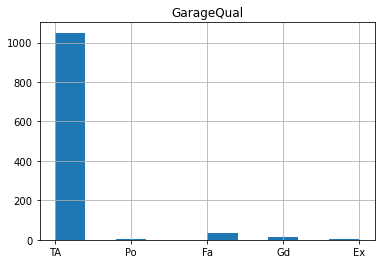

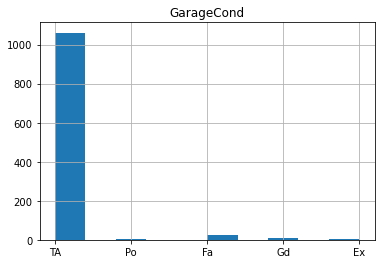

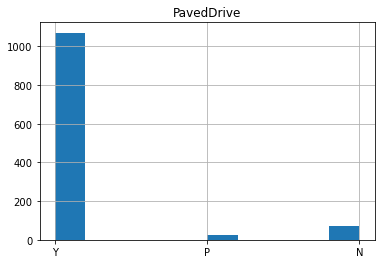

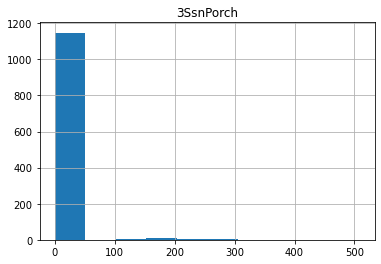

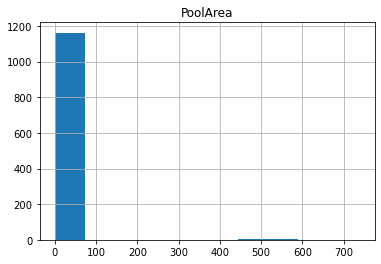

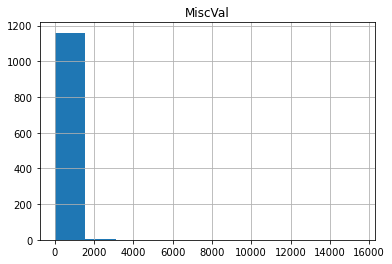

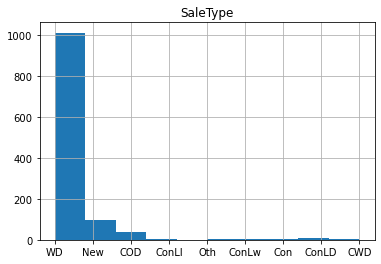

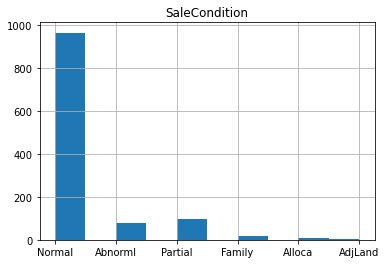

In [42]:
for i in critical_cols:
    df[i].hist()
    plt.title(i)
    plt.show()

I will drop all these columns.

In [43]:
df = df.drop(critical_cols, axis=1)

In [44]:
print('Cat:', len(df.select_dtypes(include=[object]).columns))
print('Num:', len(df.select_dtypes(include=['int64', 'float64']).columns))

Cat: 35
Num: 15


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 254 to 1126
Data columns (total 50 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   object 
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    951 non-null    float64
 3   LotArea        1168 non-null   int64  
 4   Alley          74 non-null     object 
 5   LotShape       1168 non-null   object 
 6   LotConfig      1168 non-null   object 
 7   Neighborhood   1168 non-null   object 
 8   HouseStyle     1168 non-null   object 
 9   OverallQual    1168 non-null   object 
 10  OverallCond    1168 non-null   object 
 11  YearBuilt      1168 non-null   object 
 12  YearRemodAdd   1168 non-null   object 
 13  RoofStyle      1168 non-null   object 
 14  Exterior1st    1168 non-null   object 
 15  Exterior2nd    1168 non-null   object 
 16  MasVnrType     1162 non-null   object 
 17  MasVnrArea     1162 non-null   float64
 18  ExterQ

## Handling Missing Values

In [46]:
missing_df = pd.DataFrame(df.isna().sum(), columns = ['No_of_missing'])
missing_df['feat_names'] = missing_df.index
missing_df['Percent_Missing'] = (missing_df['No_of_missing']/len(df))*100
missing_df = missing_df[missing_df['No_of_missing'] > 0]
missing_df = missing_df.sort_values(by = ['No_of_missing'])
missing_df['Non_null'] = len(df)-missing_df['No_of_missing']
missing_df

No_of_missing    feat_names  Percent_Missing  Non_null
MasVnrType                6    MasVnrType         0.513699      1162
MasVnrArea                6    MasVnrArea         0.513699      1162
BsmtQual                 28      BsmtQual         2.397260      1140
BsmtExposure             28  BsmtExposure         2.397260      1140
BsmtFinType1             28  BsmtFinType1         2.397260      1140
GarageType               64    GarageType         5.479452      1104
GarageFinish             64  GarageFinish         5.479452      1104
LotFrontage             217   LotFrontage        18.578767       951
FireplaceQu             547   FireplaceQu        46.832192       621
Fence                   935         Fence        80.051370       233
Alley                  1094         Alley        93.664384        74
MiscFeature            1122   MiscFeature        96.061644        46
PoolQC                 1162        PoolQC        99.486301         6

In [47]:
len(missing_df)

13

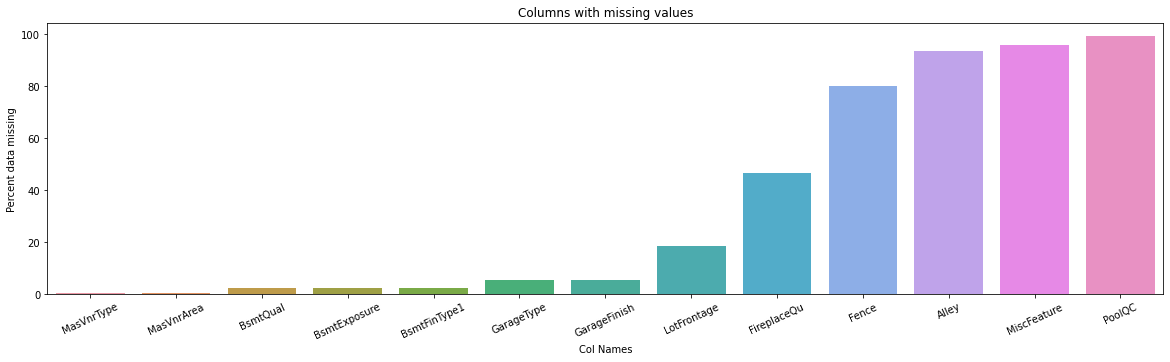

In [48]:
plt.figure(figsize = (20,5))
sns.barplot(x = missing_df['feat_names'], y = missing_df['Percent_Missing'])
plt.xticks(rotation=25)
plt.title('Columns with missing values')
plt.xlabel('Col Names')
plt.ylabel('Percent data missing')
plt.show()

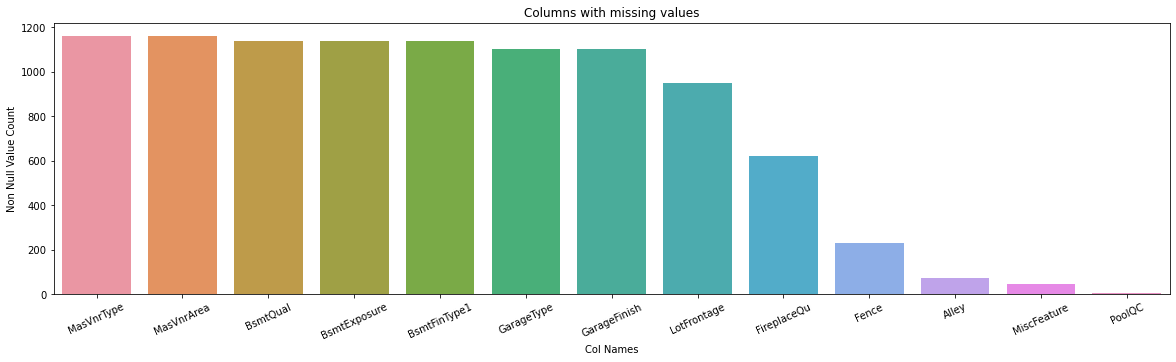

In [49]:
plt.figure(figsize = (20,5))
sns.barplot(x = missing_df['feat_names'], y = missing_df['Non_null'])
plt.xticks(rotation=25)
plt.title('Columns with missing values')
plt.xlabel('Col Names')
plt.ylabel('Non Null Value Count')
plt.show()

Initially I think we should drop Fence, Alley, MiscFeature, PoolQC.
<br>But the data dictionary might have guidelines about the missing data.
<br>We will check what insights we can derive from them first.

Explanation of the columns which are having missing values:

MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
       
MasVnrArea: Masonry veneer area in square feet

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
       
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
       
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
       
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

LotFrontage: Linear feet of street connected to property

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
       
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
       
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
       
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
       
PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

We  must tackle them one by one.

### MasVnrType

MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

None       677
BrkFace    366
Stone      106
BrkCmn      13
NaN          6
Name: MasVnrType, dtype: int64

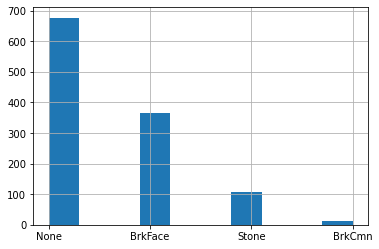

In [50]:
df['MasVnrType'].hist()
df['MasVnrType'].value_counts(dropna=False)

I think the NaNs are nothing but Nones here, so will impute them with that.

In [51]:
df.loc[df['MasVnrType'].isnull(), 'MasVnrType'] = 'None'

None       683
BrkFace    366
Stone      106
BrkCmn      13
Name: MasVnrType, dtype: int64

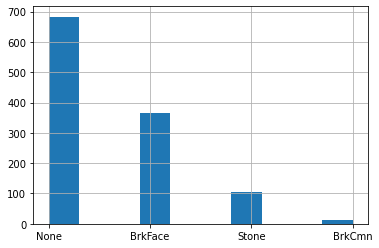

In [52]:
df['MasVnrType'].hist()
df['MasVnrType'].value_counts(dropna=False)

### MasVnrArea

MasVnrArea: Masonry veneer area in square feet

This is a numerical column

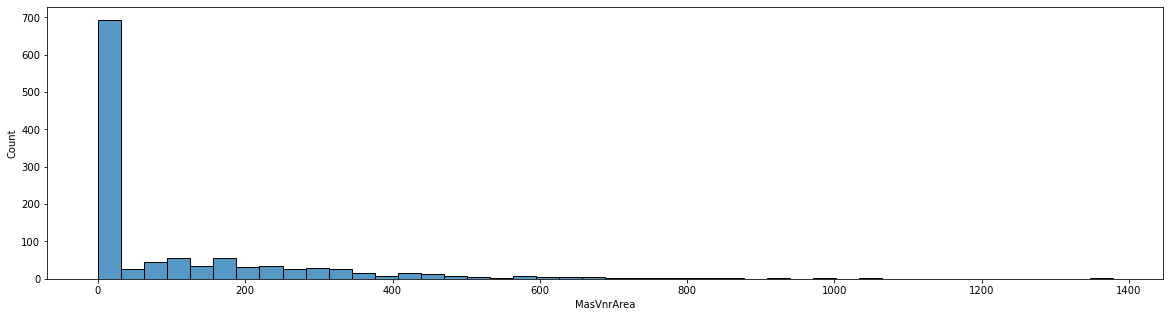

In [53]:
plt.figure(figsize=(20,5))
sns.histplot(data=df, x='MasVnrArea')
plt.show()

In [54]:
df['MasVnrArea'].isnull().sum()

6

We have 8 missing values here.

In [55]:
vital_stat = df.describe().transpose().reset_index()
vital_stat[vital_stat['index'] == 'MasVnrArea']

index   count        mean         std  min  25%  50%    75%     max
2  MasVnrArea  1162.0  103.771945  173.032238  0.0  0.0  0.0  166.0  1378.0

From my understanding, masonry veneer means creating a fake brick wall on the actual concrete wall. 
<br>So there is a possiblity that most houses wont have it by default, because it is part of beautification.

Therefore it is totally ok to impute the missing values with 0.

In [56]:
df.loc[df['MasVnrArea'].isnull(), 'MasVnrArea'] = 0

In [57]:
df['MasVnrArea'].isnull().sum()

0

### BsmtQual

BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

TA     521
Gd     493
Ex      97
Fa      29
NaN     28
Name: BsmtQual, dtype: int64

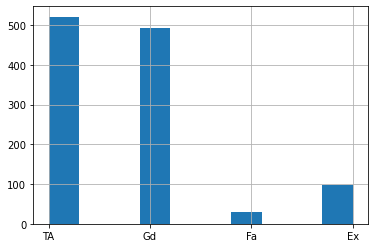

In [58]:
df['BsmtQual'].hist()
df['BsmtQual'].value_counts(dropna=False)

The data dictionary says NA means no basement so we will impute these with a new category of No_Basement.

In [59]:
df.loc[df['BsmtQual'].isnull(), 'BsmtQual'] = 'No_Basement'

### BsmtFinType1

BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

Unf    345
GLQ    328
ALQ    178
BLQ    123
Rec    104
LwQ     62
NaN     28
Name: BsmtFinType1, dtype: int64

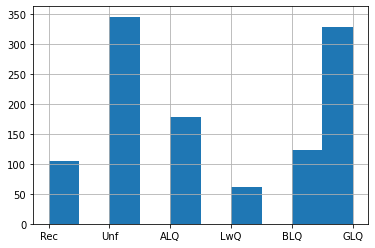

In [60]:
df['BsmtFinType1'].hist()
df['BsmtFinType1'].value_counts(dropna=False)

In [61]:
df.loc[df['BsmtFinType1'].isnull(), 'BsmtFinType1'] = 'No_Basement'

### BsmtExposure

BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

No     769
Av     175
Gd     103
Mn      93
NaN     28
Name: BsmtExposure, dtype: int64

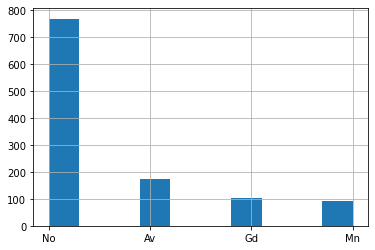

In [62]:
df['BsmtExposure'].hist()
df['BsmtExposure'].value_counts(dropna=False)

In [63]:
df.loc[df['BsmtExposure'].isnull(), 'BsmtExposure'] = 'No_Basement'

### GarageType

GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

Attchd     693
Detchd     308
BuiltIn     74
NaN         64
Basment     16
CarPort      7
2Types       6
Name: GarageType, dtype: int64

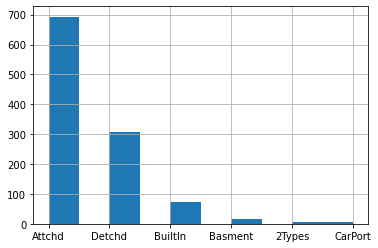

In [64]:
df['GarageType'].hist()
df['GarageType'].value_counts(dropna=False)

Just like basement, garage variables should be imputed with no garage.

In [65]:
for i in ['GarageFinish',
         'GarageType']:
    df.loc[df[i].isnull(), i] = 'No_Garage'

### GarageFinis

GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

Unf          480
RFn          339
Fin          285
No_Garage     64
Name: GarageFinish, dtype: int64

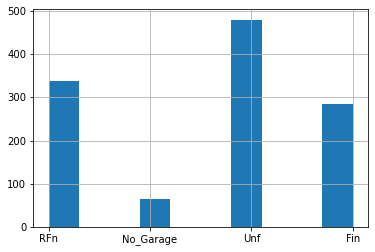

In [66]:
df['GarageFinish'].hist()
df['GarageFinish'].value_counts(dropna=False)

### LotFrontage

LotFrontage: Linear feet of street connected to property

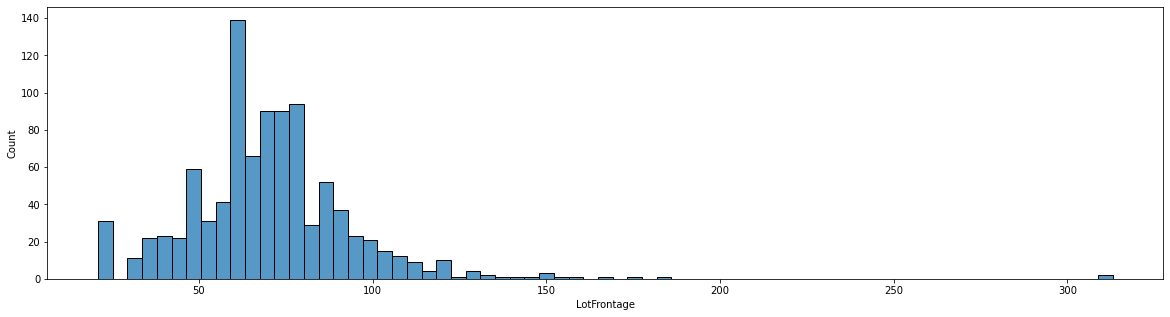

In [67]:
plt.figure(figsize=(20,5))
sns.histplot(data=df, x='LotFrontage')
plt.show()

In [68]:
df['LotFrontage'].isnull().sum()

217

In [69]:
vital_stat[vital_stat['index'] == 'LotFrontage']

index  count       mean        std   min   25%   50%   75%    max
0  LotFrontage  951.0  70.343849  24.897021  21.0  59.0  70.0  80.0  313.0

Will impute with median.

In [70]:
df.loc[df['LotFrontage'].isnull(), 'LotFrontage'] = df['LotFrontage'].median()

### FireplaceQu

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

NaN    547
Gd     305
TA     252
Fa      27
Ex      21
Po      16
Name: FireplaceQu, dtype: int64

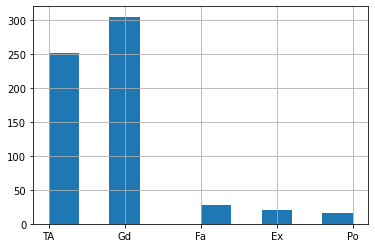

In [71]:
df['FireplaceQu'].hist()
df['FireplaceQu'].value_counts(dropna=False)

Will impute with No_Fireplace as given in data dictionary.

In [72]:
df.loc[df['FireplaceQu'].isnull(), 'FireplaceQu'] = 'No Fireplace'

### Fence

Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

NaN      935
MnPrv    128
GdPrv     50
GdWo      46
MnWw       9
Name: Fence, dtype: int64

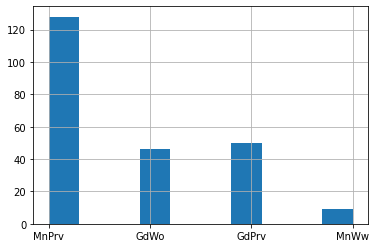

In [73]:
df['Fence'].hist()
df['Fence'].value_counts(dropna=False)

Impute with No_Fence

In [74]:
df.loc[df['Fence'].isnull(), 'Fence'] = 'No_Fence'

### Alley

Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access

NaN     1094
Grvl      44
Pave      30
Name: Alley, dtype: int64

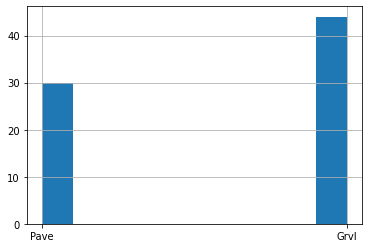

In [75]:
df['Alley'].hist()
df['Alley'].value_counts(dropna=False)

In [76]:
df.loc[df['Alley'].isnull(), 'Alley'] = 'No_Alley'

### MiscFeature

MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

NaN     1122
Shed      41
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64

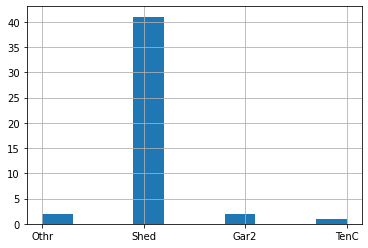

In [77]:
df['MiscFeature'].hist()
df['MiscFeature'].value_counts(dropna=False)

Impute with None

In [78]:
df.loc[df['MiscFeature'].isnull(), 'MiscFeature'] = 'None'

### PoolQC

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool

NaN    1162
Ex        2
Fa        2
Gd        2
Name: PoolQC, dtype: int64

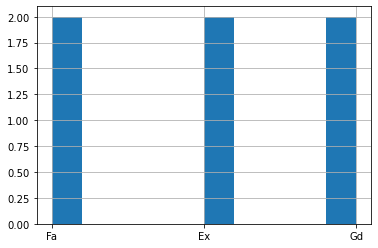

In [79]:
df['PoolQC'].hist()
df['PoolQC'].value_counts(dropna=False)

index   count           mean           std      min       25%  \
14  SalePrice  1168.0  181441.541952  77263.583862  34900.0  130000.0   

         50%       75%       max  
14  165000.0  214925.0  745000.0

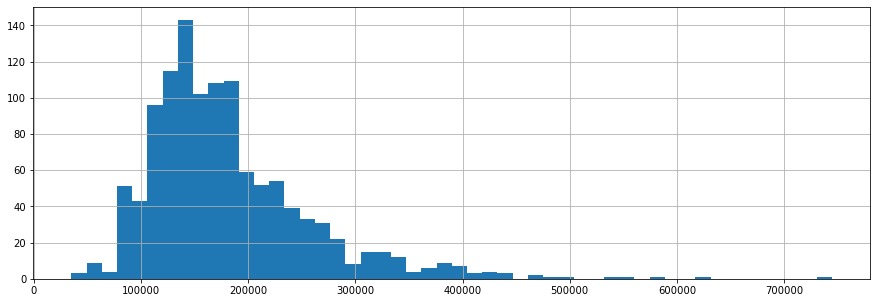

In [80]:
plt.figure(figsize=(15,5))
df['SalePrice'].hist(bins=50)
vital_stat[vital_stat['index'] == 'SalePrice']

So essentially the houses that got a pool has a price above median, mostly.

In [81]:
df.loc[df['PoolQC'].isnull(), 'PoolQC'] = 'No_Pool'

### Check final results

In [82]:
missing_df = pd.DataFrame(df.isna().sum(), columns = ['No_of_missing'])
missing_df['feat_names'] = missing_df.index
missing_df['Percent_Missing'] = (missing_df['No_of_missing']/len(df))*100
missing_df = missing_df[missing_df['No_of_missing'] > 0]
missing_df = missing_df.sort_values(by = ['No_of_missing'])
missing_df['Non_null'] = 1460-missing_df['No_of_missing']
missing_df

Empty DataFrame
Columns: [No_of_missing, feat_names, Percent_Missing, Non_null]
Index: []

### Dropping some more features

Alley, MiscFeature, PoolQC have too many values in NA category, they might not prove to be useful. So we should drop them.

In [83]:
df = df.drop(['Alley', 'MiscFeature', 'PoolQC'], axis=1)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 254 to 1126
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   object 
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    1168 non-null   float64
 3   LotArea        1168 non-null   int64  
 4   LotShape       1168 non-null   object 
 5   LotConfig      1168 non-null   object 
 6   Neighborhood   1168 non-null   object 
 7   HouseStyle     1168 non-null   object 
 8   OverallQual    1168 non-null   object 
 9   OverallCond    1168 non-null   object 
 10  YearBuilt      1168 non-null   object 
 11  YearRemodAdd   1168 non-null   object 
 12  RoofStyle      1168 non-null   object 
 13  Exterior1st    1168 non-null   object 
 14  Exterior2nd    1168 non-null   object 
 15  MasVnrType     1168 non-null   object 
 16  MasVnrArea     1168 non-null   float64
 17  ExterQual      1168 non-null   object 
 18  Founda

## Check outliers

In [85]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [86]:
# Reference: https://www.kaggle.com/nareshbhat/outlier-the-silent-killer
out=[]
def iqr_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    #     print("Outliers:",out)
    return out
cols_with_outliers = []
for i in num_cols:
    try:
        if len(iqr_outliers(df[i]))>0:
            cols_with_outliers.append(i)
    except:
        pass
cols_with_outliers

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

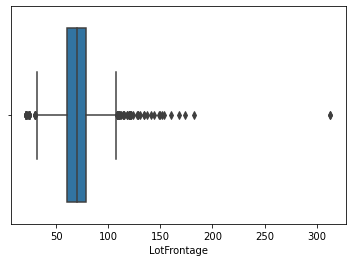

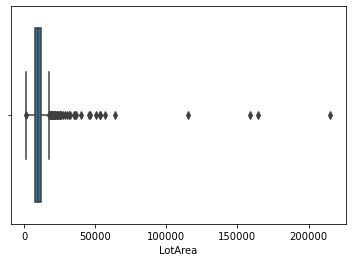

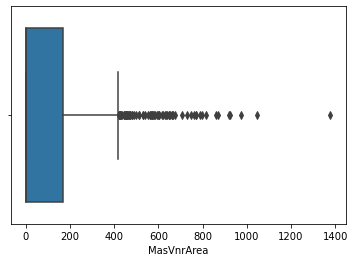

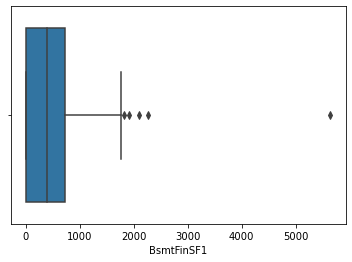

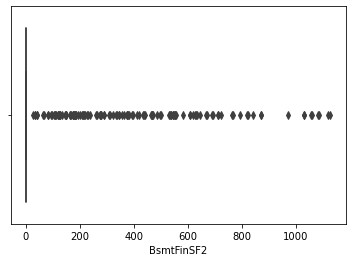

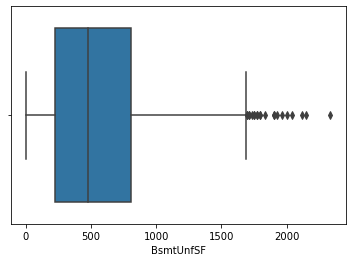

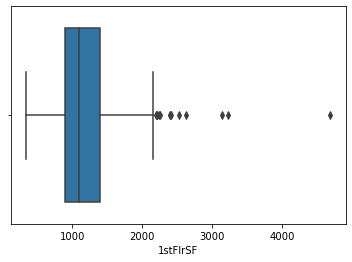

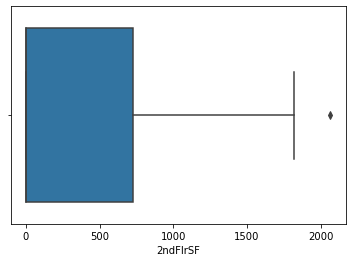

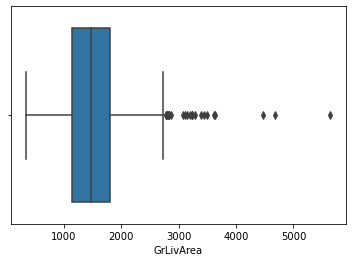

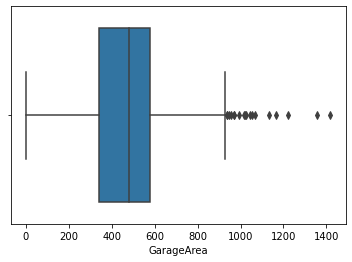

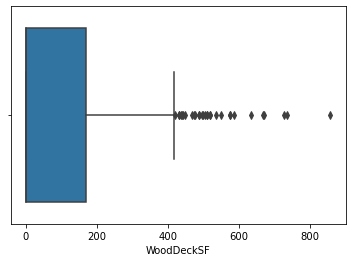

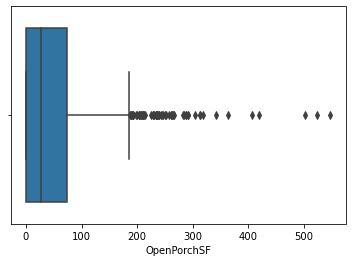

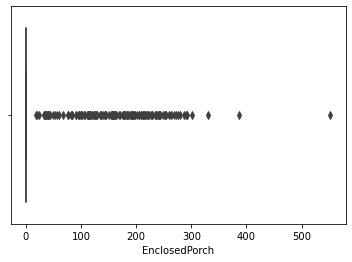

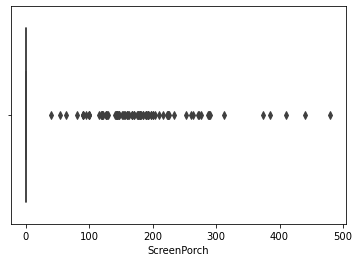

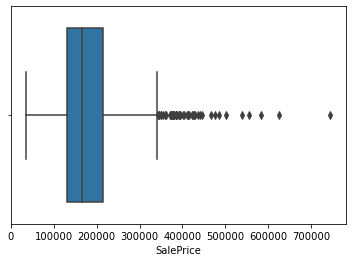

In [87]:
for i in cols_with_outliers:
    sns.boxplot(x=df[i])
    plt.show()

The below code is commented out because after removing the outliers with IQR and Median imputation, 
<br>models performed terribly. So decided to go without it as the variation in data will be lost if we do this.

In [88]:
# # Reference: https://www.kaggle.com/nareshbhat/outlier-the-silent-killer
# def median_impute(col):
    
#     plt.figure(figsize=(15,5))
#     plt.subplot(1,2,1)
# #     sns.boxplot(df[col])
#     sns.histplot(df[col])
#     plt.title("Before")
# #     plt.show()

#     q1 = df[col].quantile(0.25)
#     q3 = df[col].quantile(0.75)
#     iqr = q3-q1
#     Lower_tail = q1 - 1.5 * iqr
#     Upper_tail = q3 + 1.5 * iqr

#     med = np.median(df[col])
#     percentile_90th = np.percentile(df[col], 90)
#     for i in df[col]:
#         if i > Upper_tail or i < Lower_tail:
# #                 df[col] = df[col].replace(i, med)
#                 df[col] = df[col].replace(i, percentile_90th)
    
#     plt.subplot(1,2,2)
# #     sns.boxplot(df[col])
#     sns.histplot(df[col])
#     plt.title("After")
#     plt.show()   
    
# for i in cols_with_outliers:
#     median_impute(i)

<AxesSubplot:>

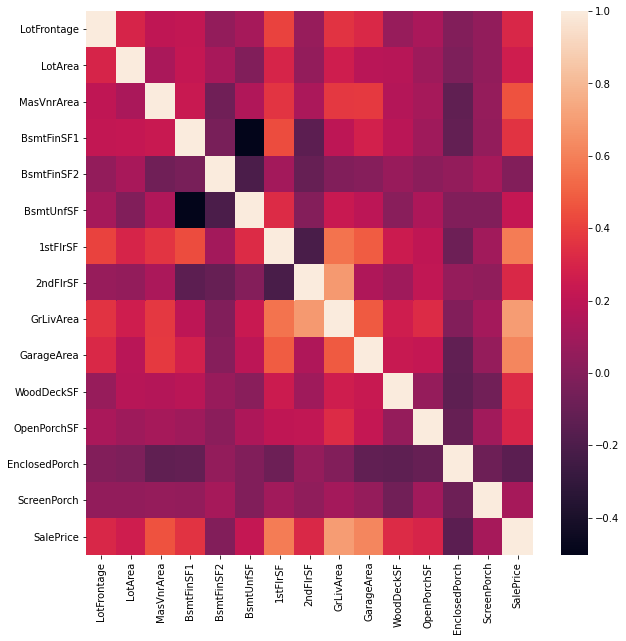

In [89]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

As ScreenPorch has too many outliers, we will drop it.

<AxesSubplot:xlabel='ScreenPorch', ylabel='Count'>

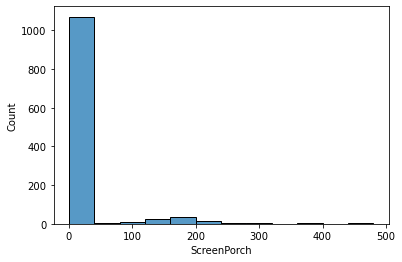

In [90]:
sns.histplot(df.ScreenPorch)

In [91]:
df = df.drop(['ScreenPorch'], axis=1)

## Transform Skewed Numerical Columns

Now I want to check the numerical columns.

We will transorm using lop1p if it is right skewed, otherwise with boxcox if the dist is in positive.

In [92]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [93]:
len(num_cols)

14

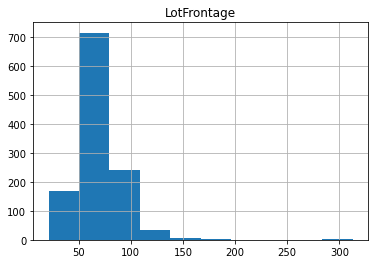

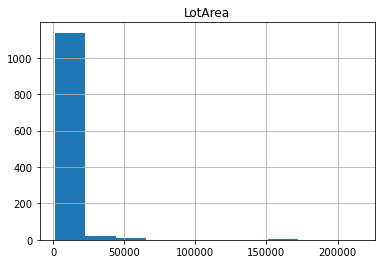

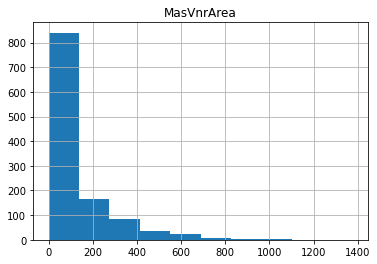

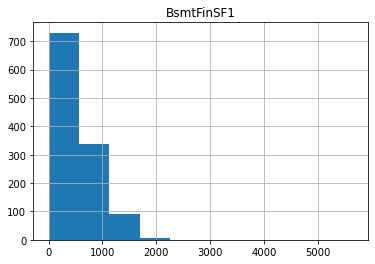

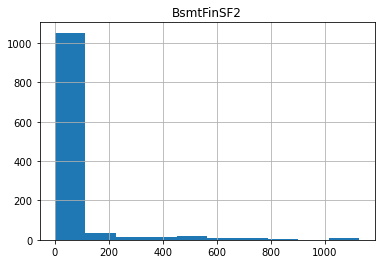

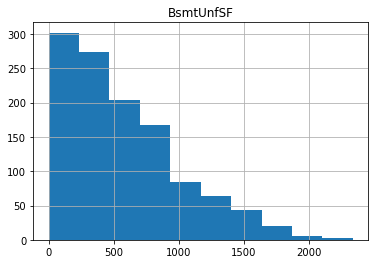

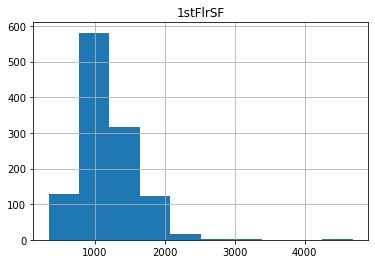

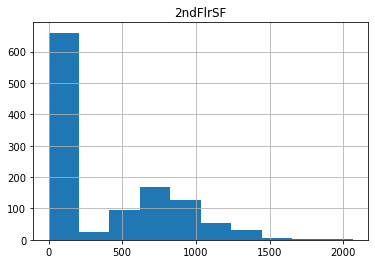

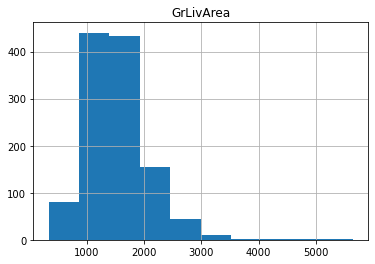

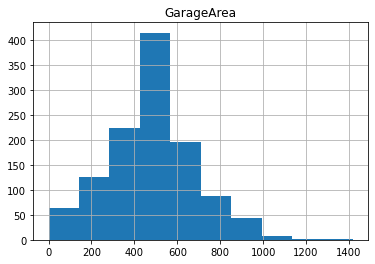

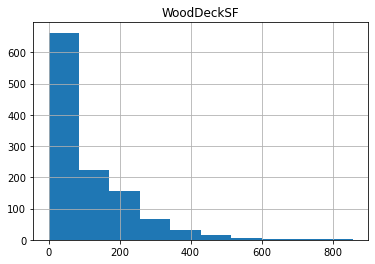

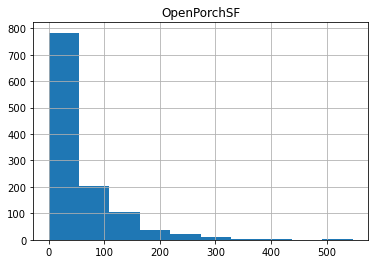

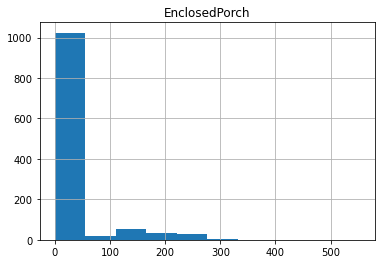

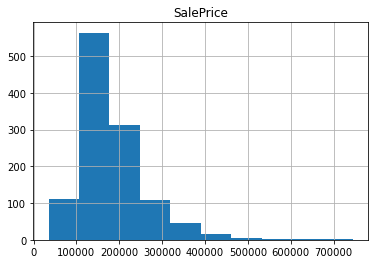

In [94]:
for i in num_cols:
    df[i].hist()
    plt.title(i)
    plt.show()

We have bimodal features and lots of skewed features. Only few are near normal.

Let's check the skewed features and transform them.

In [95]:
skewed_cols = df[num_cols].apply(lambda x: skew(x)).sort_values(ascending=False)

In [96]:
skewed_cols

LotArea          11.942726
BsmtFinSF2        4.212476
EnclosedPorch     3.159881
LotFrontage       2.671465
OpenPorchSF       2.328895
MasVnrArea        2.291170
BsmtFinSF1        1.859740
SalePrice         1.740889
WoodDeckSF        1.585291
GrLivArea         1.423308
1stFlrSF          1.420335
BsmtUnfSF         0.909458
2ndFlrSF          0.800180
GarageArea        0.108970
dtype: float64

We will transform features with skewness greater than 0.9.

In [97]:
highly_skewed_cols = skewed_cols[abs(skewed_cols) > 0.9]

In [98]:
highly_skewed_cols.index

Index(['LotArea', 'BsmtFinSF2', 'EnclosedPorch', 'LotFrontage', 'OpenPorchSF',
       'MasVnrArea', 'BsmtFinSF1', 'SalePrice', 'WoodDeckSF', 'GrLivArea',
       '1stFlrSF', 'BsmtUnfSF'],
      dtype='object')

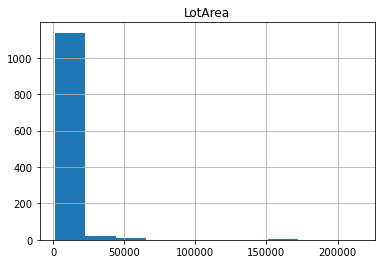

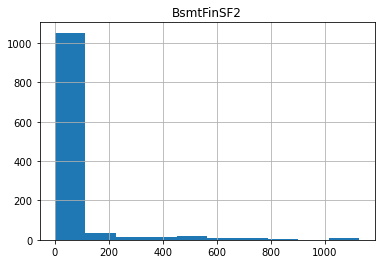

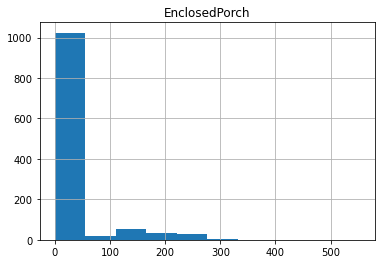

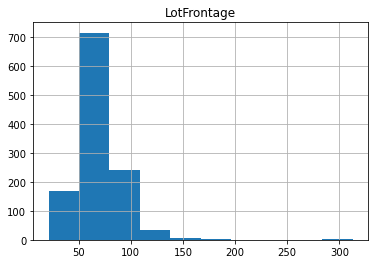

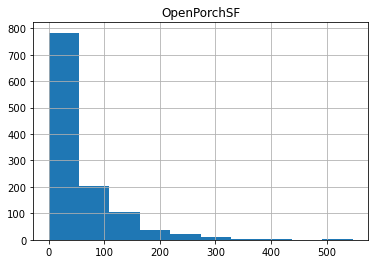

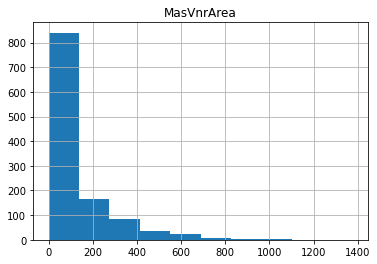

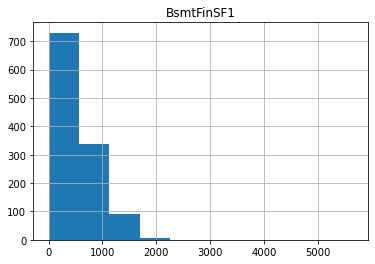

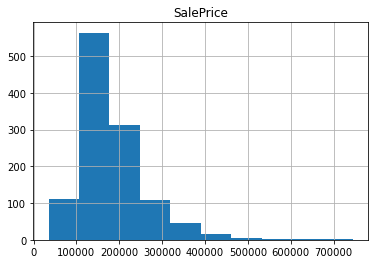

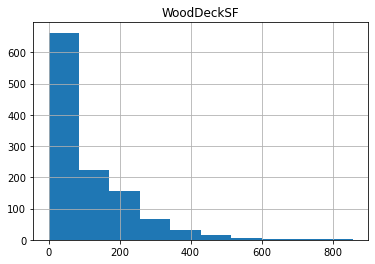

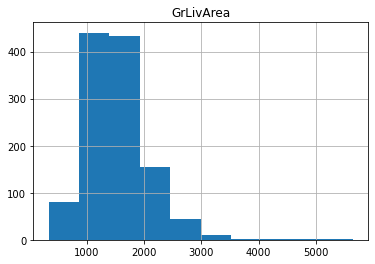

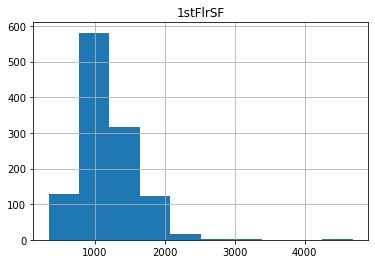

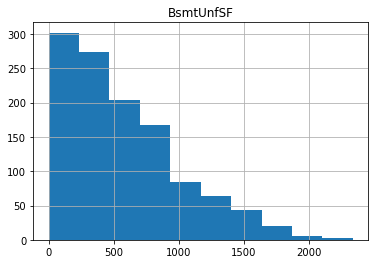

In [99]:
for i in highly_skewed_cols.index:
    df[i].hist()
    plt.title(i)
    plt.show()

But let's check Target Variable separately.

In [100]:
vital_stat = df.describe().transpose().reset_index()
vital_stat[vital_stat['index'] == 'SalePrice']

index   count           mean           std      min       25%  \
13  SalePrice  1168.0  181441.541952  77263.583862  34900.0  130000.0   

         50%       75%       max  
13  165000.0  214925.0  745000.0

Mean = 180921.19589
<br>Std Dev = 79442.502883

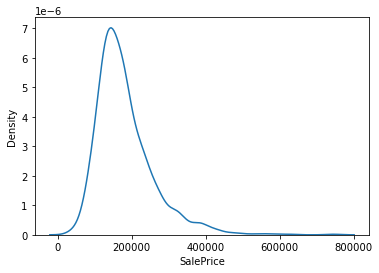

In [101]:
sns.kdeplot(df.SalePrice)
plt.show()

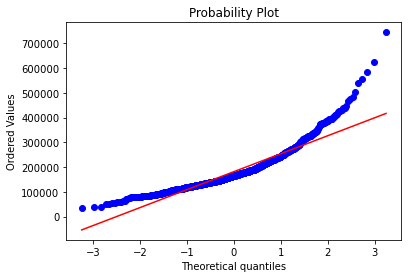

In [102]:
stats.probplot(df['SalePrice'], plot=plt)
plt.show()

We will not do this transformation so this code will remain commented.

A simple log(1+x) transformation should do the job.

In [103]:
# for i in highly_skewed_cols.index:
#     print(i)
#     df[i] = np.log1p(df[i])

Lets see the transformed target variable.

In [104]:
# sns.kdeplot(df.SalePrice)
# plt.show()

In [105]:
# stats.probplot(df['SalePrice'], plot=plt)
# plt.show()

Lets see all the transformed variables.

In [106]:
# for i in highly_skewed_cols.index:
#     df[i].hist()
#     plt.title(i)
#     plt.show()

## Checking criterias of Linear Regression

Linear Regression criterias:

    Independence of observations
    No or little Multicollinearity
    Relations between the independent and dependent variables must be linear
    
    Normality of the residuals
    Homoscedasticity
    No autocorrelation in the error term

### Check Independence

If feature definitions look like they can influence each other I will check their correlation and plots with each other to check for independence.

Check correlation:
    
    overallqual, overallcond
    yearbuild, yearremodadd
    Exterior1st, Exterior2nd    
    Foundation, Neighborhood
    BsmtFinSF1, BsmtFinSF2, BsmtUnfSF      
    1stFlrSF, 2ndFlrSF, GrLivArea , FullBath, HalfBath, BedroomAbvGr
    WoodDeckSF   
    OpenPorchSF, EnclosedPorch  
    YrSold, MoSold         

<AxesSubplot:>

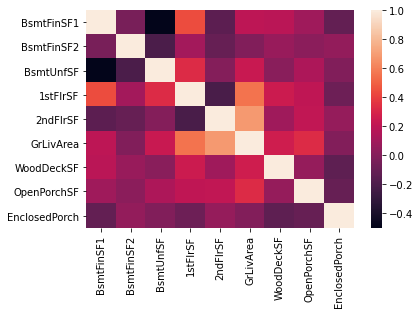

In [120]:
cols_indep = ['OverallQual', 'OverallCond',
'YearBuilt', 'YearRemodAdd',
'Exterior1st', 'Exterior2nd' ,   
'Foundation', 'Neighborhood',
'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',      
'1stFlrSF', '2ndFlrSF', 'GrLivArea' , 'FullBath', 'HalfBath', 'BedroomAbvGr',
'WoodDeckSF',
'OpenPorchSF', 'EnclosedPorch',
'YrSold', 'MoSold']

sns.heatmap(df[cols_indep].corr())

I will look for correlation as low as 0.4 to get a broader view.

In [121]:
for i in range(len(df[cols_indep].corr())):
    for j in range(len(df[cols_indep].corr())):
        if i<j:
            val = df[cols_indep].corr()[abs(df[cols_indep].corr())>0.4].iloc[i,j]
            if (val<1) and (abs(val)>0.4) :
                print(df[cols_indep].corr().columns[i],' ~ ',df[cols_indep].corr().columns[j])

BsmtFinSF1  ~  BsmtUnfSF
BsmtFinSF1  ~  1stFlrSF
1stFlrSF  ~  GrLivArea
2ndFlrSF  ~  GrLivArea


These relationships are concerning:

    YearBuilt  ~  YearRemodAdd
    BsmtFinSF1  ~  BsmtUnfSF
    BsmtFinSF1  ~  1stFlrSF
    1stFlrSF  ~  GrLivArea
    2ndFlrSF  ~  GrLivArea
    2ndFlrSF  ~  FullBath
    2ndFlrSF  ~  HalfBath
    2ndFlrSF  ~  BedroomAbvGr
    GrLivArea  ~  FullBath
    GrLivArea  ~  HalfBath
    GrLivArea  ~  BedroomAbvGr

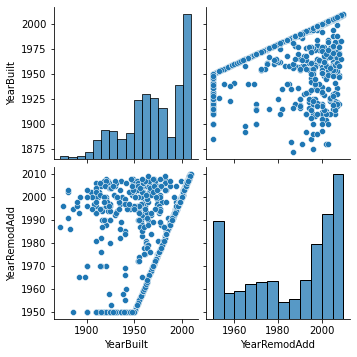

In [122]:
cols_indep = [
'YearBuilt', 'YearRemodAdd']

sns.pairplot(df[cols_indep])

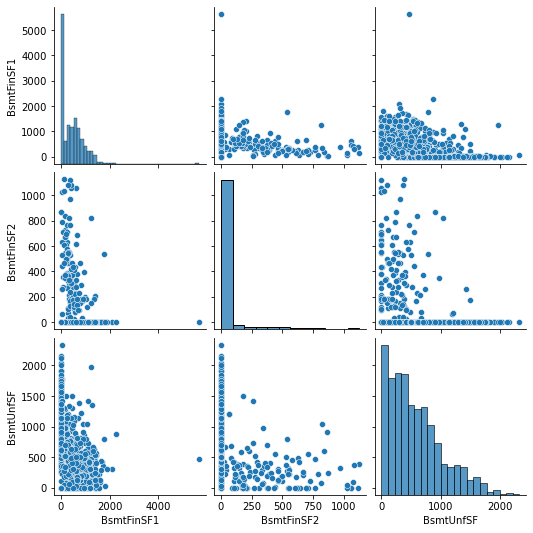

In [123]:
cols_indep = [ 
'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF']

sns.pairplot(df[cols_indep])

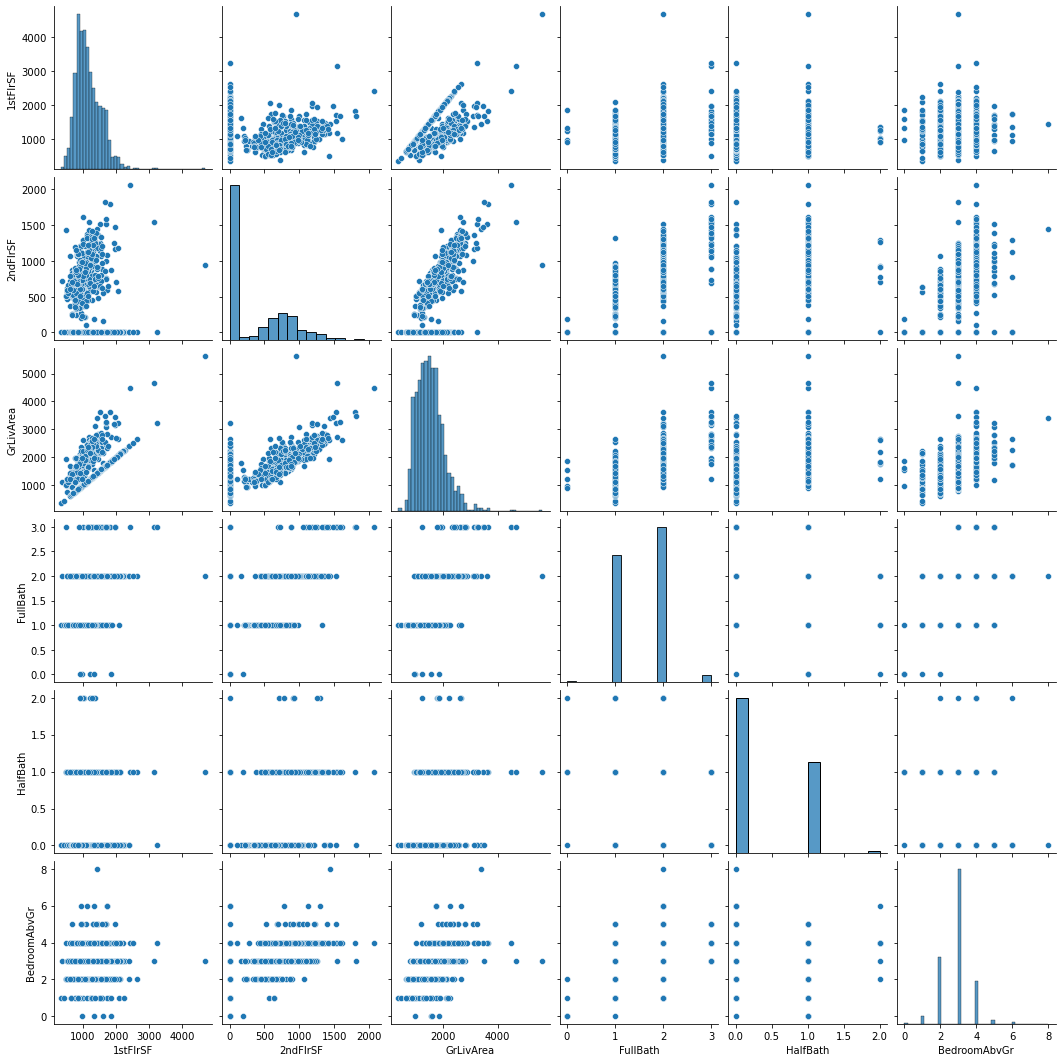

In [124]:
cols_indep = [    
'1stFlrSF', '2ndFlrSF', 'GrLivArea' , 'FullBath', 'HalfBath', 'BedroomAbvGr']

sns.pairplot(df[cols_indep])

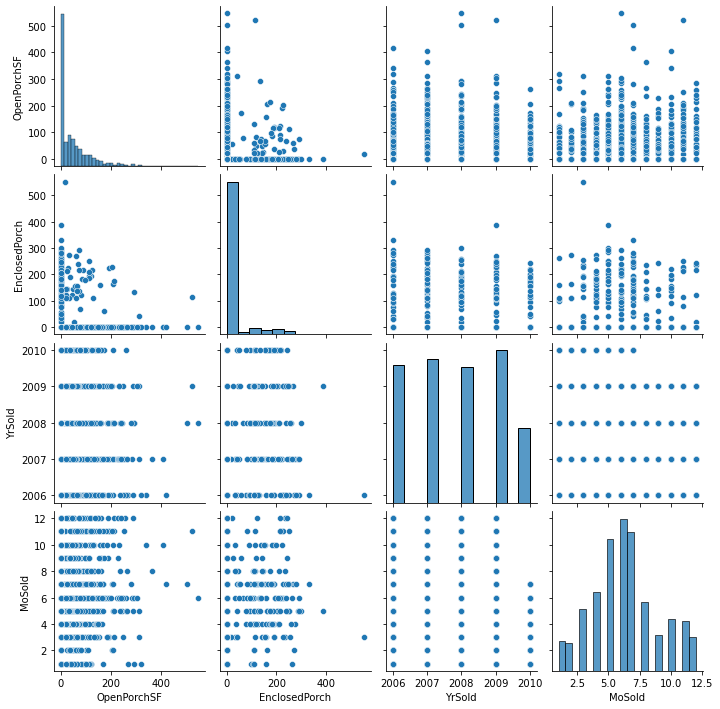

In [125]:
cols_indep = [    
'OpenPorchSF', 'EnclosedPorch',
'YrSold', 'MoSold']

sns.pairplot(df[cols_indep])

Verdict

Keep:
    
    YearBuilt
    GrLivArea
    
Drop:
    
    1stfloor
    2ndfloor
    FullBath
    YearRemodAdd
    
Bad:
    
    YearBuilt-YearRemodAdd
    1stfloor - GrLivArea
    2ndfloor - GrLivArea
    2ndfloor- FullBath

In [126]:
df = df.drop(['1stFlrSF', '2ndFlrSF', 'FullBath', 'YearRemodAdd'], axis=1)

### Check Linearity

We need to check if features are linear with target.

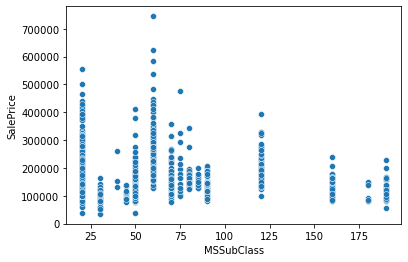

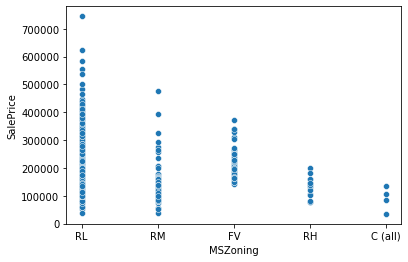

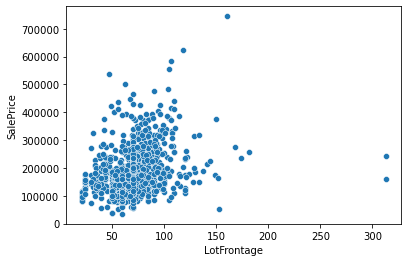

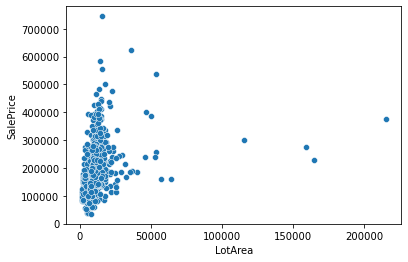

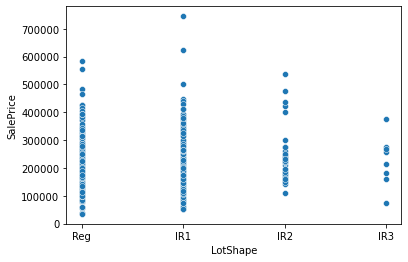

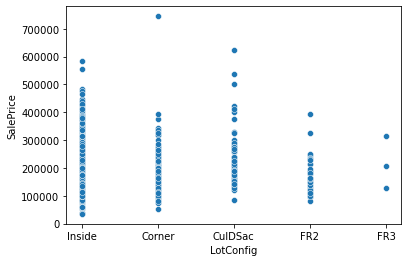

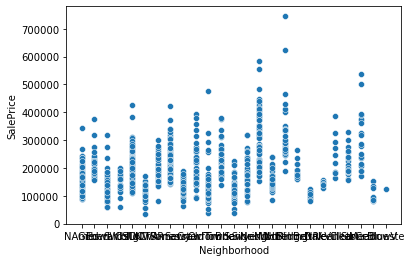

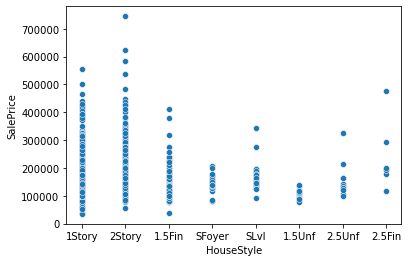

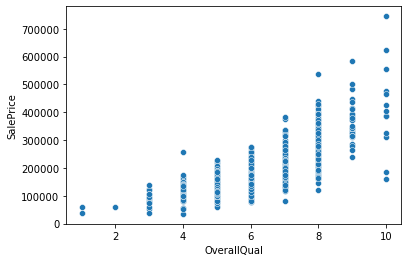

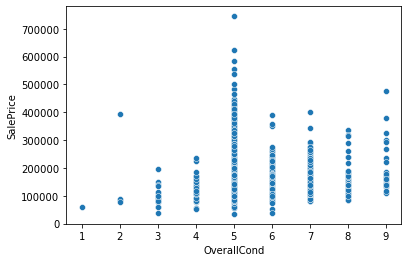

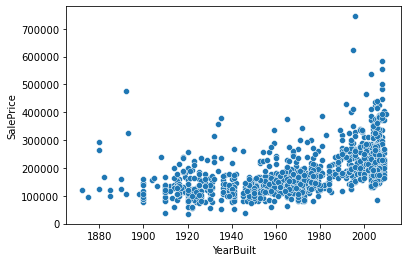

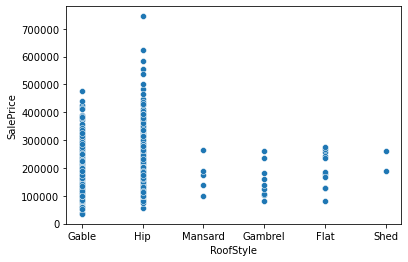

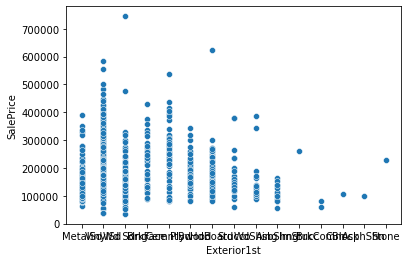

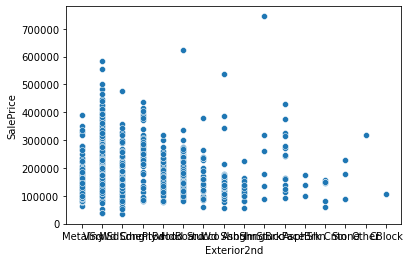

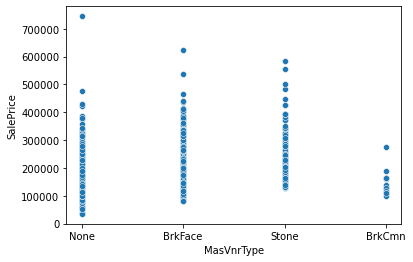

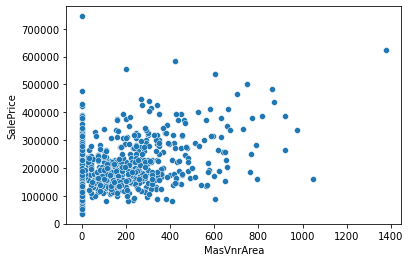

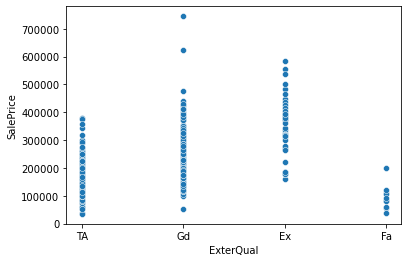

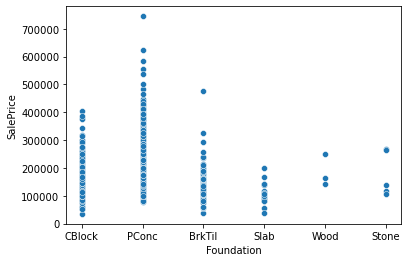

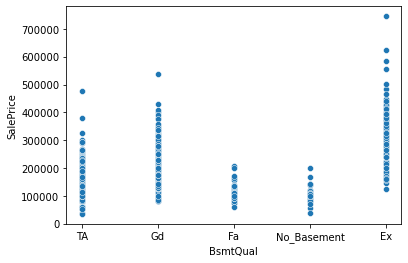

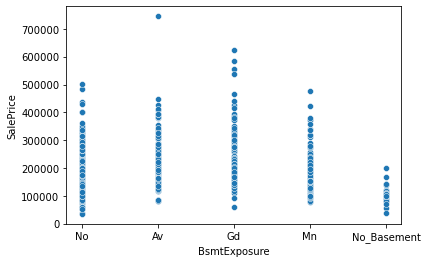

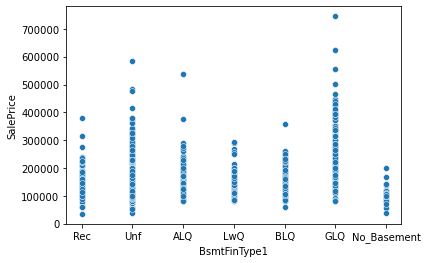

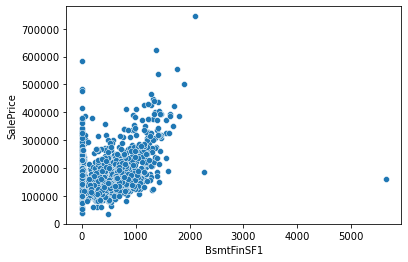

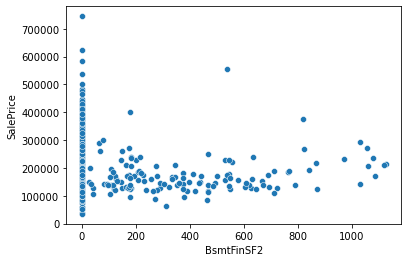

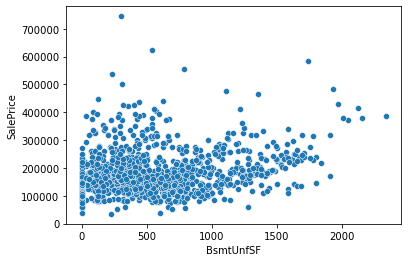

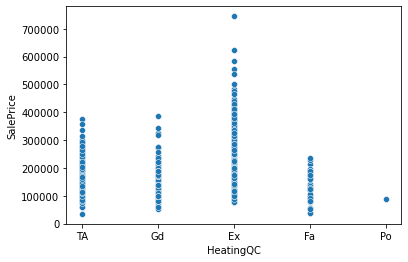

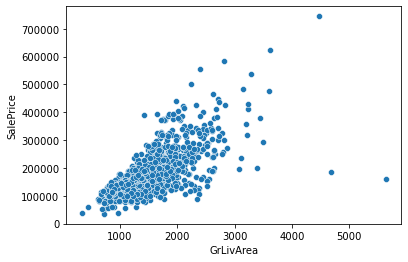

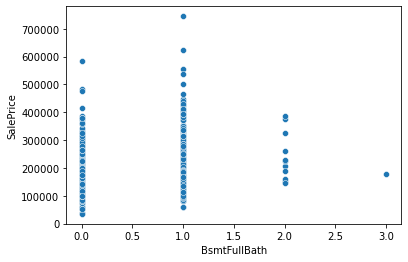

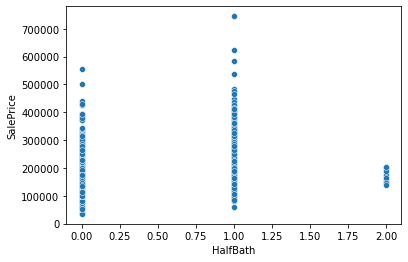

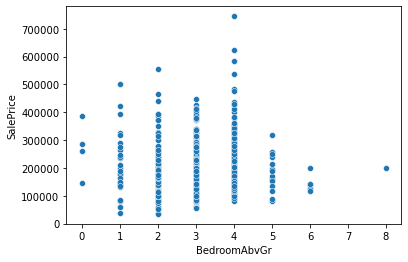

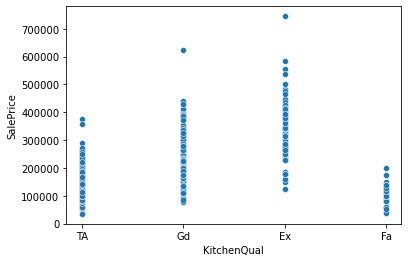

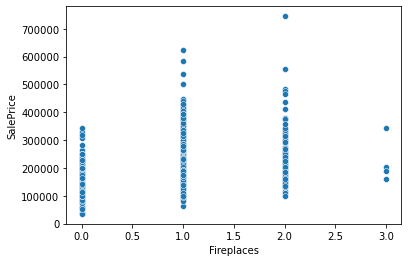

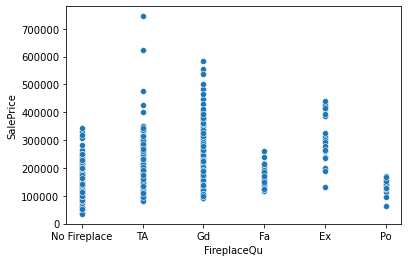

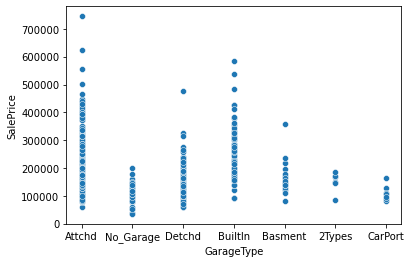

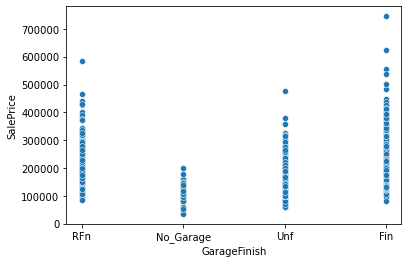

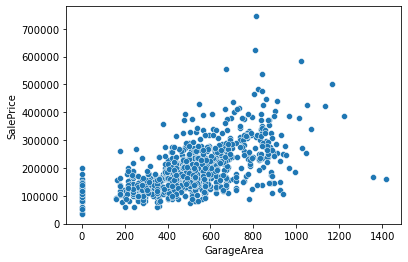

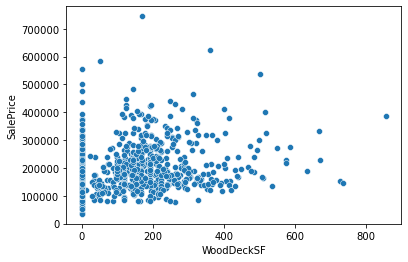

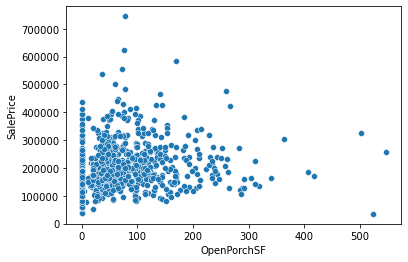

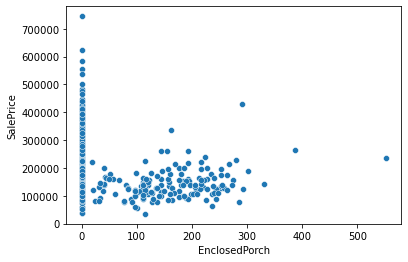

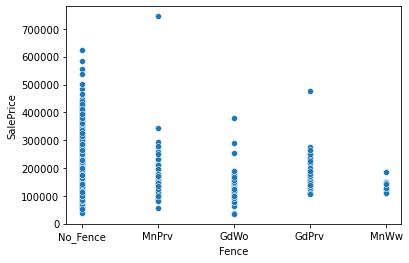

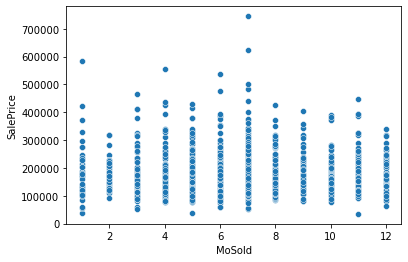

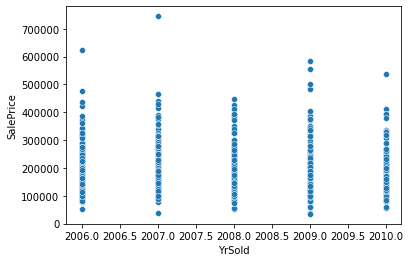

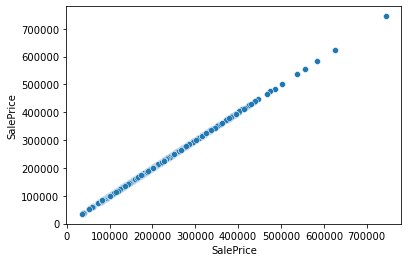

In [127]:
for i in df.columns:
    sns.scatterplot(df[i], df['SalePrice'])
    plt.show()

The features dropped below are not linear with the target so it might help if we drop them.
<br> I wanted to drop features 'LotFrontage', 'BsmtFinSF1' too but baseline model found them important, so decided to keep them.

In [128]:

# df = df.drop(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'WoodDeckSF', 'OpenPorchSF'], axis=1)
df = df.drop(['MasVnrArea', 'WoodDeckSF', 'OpenPorchSF'], axis=1)

## Final Columns Kept

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 254 to 1126
Data columns (total 39 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1168 non-null   object 
 1   MSZoning       1168 non-null   object 
 2   LotFrontage    1168 non-null   float64
 3   LotArea        1168 non-null   int64  
 4   LotShape       1168 non-null   object 
 5   LotConfig      1168 non-null   object 
 6   Neighborhood   1168 non-null   object 
 7   HouseStyle     1168 non-null   object 
 8   OverallQual    1168 non-null   object 
 9   OverallCond    1168 non-null   object 
 10  YearBuilt      1168 non-null   object 
 11  RoofStyle      1168 non-null   object 
 12  Exterior1st    1168 non-null   object 
 13  Exterior2nd    1168 non-null   object 
 14  MasVnrType     1168 non-null   object 
 15  ExterQual      1168 non-null   object 
 16  Foundation     1168 non-null   object 
 17  BsmtQual       1168 non-null   object 
 18  BsmtEx

In [130]:
df.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LotConfig  \
254          20       RL         70.0     8400      Reg    Inside   
1066         60       RL         59.0     7837      IR1    Inside   
638          30       RL         67.0     8777      Reg    Inside   
799          50       RL         60.0     7200      Reg    Corner   
380          50       RL         50.0     5000      Reg    Inside   

     Neighborhood HouseStyle OverallQual OverallCond YearBuilt RoofStyle  \
254         NAmes     1Story           5           6      1957     Gable   
1066      Gilbert     2Story           6           7      1993     Gable   
638       Edwards     1Story           5           7      1910     Gable   
799         SWISU     1.5Fin           5           7      1937     Gable   
380         SWISU     1.5Fin           5           6      1924     Gable   

     Exterior1st Exterior2nd MasVnrType ExterQual Foundation BsmtQual  \
254      MetalSd     MetalSd       None        TA     CBlock       TA   
1066     VinylSd     VinylSd       None        Gd      PConc       Gd   
638      MetalSd     Wd Sdng       None        TA     CBlock       Fa   
799      Wd Sdng     Wd Sdng    BrkFace        TA     BrkTil       Gd   
380      BrkFace     Wd Sdng       None        TA     BrkTil       TA   

     BsmtExposure BsmtFinType1  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF HeatingQC  \
254            No          Rec         922           0        392        TA   
1066           No          Unf           0           0        799        Gd   
638            No          Unf           0           0        796        Gd   
799            No          ALQ         569           0        162        Ex   
380            No          LwQ         218           0        808        TA   

      GrLivArea BsmtFullBath HalfBath BedroomAbvGr KitchenQual Fireplaces  \
254        1314            1        0            3          TA          0   
1066       1571            0        1            3          TA          1   
638         796            0        0            2          TA          0   
799        1768            1        1            3          Gd          2   
380        1691            0        0            3          Gd          1   

       FireplaceQu GarageType GarageFinish  GarageArea  EnclosedPorch  \
254   No Fireplace     Attchd          RFn         294              0   
1066            TA     Attchd          RFn         380              0   
638   No Fireplace  No_Garage    No_Garage           0            164   
799             TA     Detchd          Unf         240            264   
380             Gd     Detchd          Unf         308            242   

         Fence MoSold YrSold  SalePrice  
254   No_Fence      6   2010     145000  
1066  No_Fence      5   2009     178000  
638      MnPrv      5   2008      85000  
799      MnPrv      6   2007     175000  
380   No_Fence      5   2010     127000

In [131]:
cols_kept = list(df.columns)
cols_kept

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'HeatingQC',
 'GrLivArea',
 'BsmtFullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenQual',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageArea',
 'EnclosedPorch',
 'Fence',
 'MoSold',
 'YrSold',
 'SalePrice']

In [132]:
# cols_kept = ['MSSubClass',
#  'MSZoning',
#  'LotArea',
#  'LotShape',
#  'LotConfig',
#  'Neighborhood',
#  'HouseStyle',
#  'OverallQual',
#  'OverallCond',
#  'YearBuilt',
#  'RoofStyle',
#  'Exterior1st',
#  'Exterior2nd',
#  'MasVnrType',
#  'ExterQual',
#  'Foundation',
#  'BsmtQual',
#  'BsmtExposure',
#  'BsmtFinType1',
#  'BsmtFinSF2',
#  'BsmtUnfSF',
#  'HeatingQC',
#  'GrLivArea',
#  'BsmtFullBath',
#  'HalfBath',
#  'BedroomAbvGr',
#  'KitchenQual',
#  'Fireplaces',
#  'FireplaceQu',
#  'GarageType',
#  'GarageFinish',
#  'GarageArea',
#  'EnclosedPorch',
#  'Fence',
#  'MoSold',
#  'YrSold',
#  'SalePrice']

## A Dictionary to store model performances

In [133]:
model_dict = {
    'vanilla_linear_regression':None,
    'ENreg':None,
    'lasso':None,
    'ridge':None,
    'lr_mlxtend':None,
    'regressor_OLS':None,
    'xgbr':None,
    'rfr':None
}

## Function for Scoring

In [134]:
def print_score(model, train, val, y_train, y_val):
    
    y_pred = model.predict(train)
    rms1 = np.sqrt(mean_squared_error(y_train, y_pred))
    r2_1 = (r2_score(y_train, y_pred))
#     print(f'Train Errors: RMSE: {rms}, R Sq: {r2}')

    pred_on = val
    y_pred = model.predict(pred_on)
    rms2 = np.sqrt(mean_squared_error(y_val, y_pred))
    r2_2 = (r2_score(y_val, y_pred))
#     print(f'Val Errors: RMSE: {rms}, R Sq: {r2}')
    
    return rms1, rms2, r2_1, r2_2

## Linear Regression

As we have the test data available, we will merge all the data we have together and apply labelencoder on the categorical
<br>columns, then break the data into the previous train, val, test format.

In [127]:
ndf = df.copy()

train = ndf.copy() #pd.read_csv('train.csv')[cols_kept]
test = pd.read_csv('test.csv')[cols_kept[:-1]]

df = pd.concat([train[cols_kept], X_val[cols_kept[:-1]], X_test[cols_kept[:-1]], test])

cat_cols = ['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'HouseStyle', 'YearBuilt',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 
       'FireplaceQu', 'GarageType', 'GarageFinish', 'Fence', 
       'YrSold']

le = preprocessing.LabelEncoder()
df[cat_cols] = df[cat_cols].apply(le.fit_transform)

print(len(df), len(X_val), len(X_test), len(train), len(test))

train = df.iloc[:len(train)]
X_val = df.iloc[len(train):len(train)+len(X_val)]
X_test = df.iloc[len(train)+len(X_val):len(train)+len(X_val)+len(X_test)]
test = df.iloc[len(train)+len(X_val)+len(X_test):]

# print(len(df), len(X_val), len(X_test), len(train), len(test))
# print(len(train.columns), len(X_val.columns), len(X_test.columns), len(test.columns))

for i in cols_kept[:-1]:
    X_val[i] = X_val[i].astype(dict(ndf.apply(lambda x: x.dtype))[i])
    X_test[i] = X_test[i].astype(dict(ndf.apply(lambda x: x.dtype))[i])
    
    
df = train.copy()

df.head()

X_train = df.drop(['SalePrice'], axis=1)
y_train = df['SalePrice']

# regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

# regressor.fit(X_train, y_train)

X_val = X_val.drop(['SalePrice'], axis=1)
X_test = X_test.drop(['SalePrice'], axis=1)

X_val.loc[X_val['LotFrontage'].isnull(), 'LotFrontage'] = X_train['LotFrontage'].median()
X_test.loc[X_test['LotFrontage'].isnull(), 'LotFrontage'] = X_train['LotFrontage'].median()

2919 146 146 1168 1459


### Vanilla Linear Regression

In [128]:
lr = LinearRegression(normalize=True)
# lr = LinearRegression(fit_intercept=False)

lr.fit(X_train, y_train)

tr_rmse, val_rmse, r2_1, r2_2 = print_score(lr, X_train, X_val[X_train.columns],  y_train, y_val)
tr_rmse, val_rmse, r2_1, r2_2 

(32053.095397745885,
 25779.714268262076,
 0.8277488060019488,
 0.8865625924712075)

In [129]:
vanilla_linear_regression = lr
model_dict['vanilla_linear_regression'] = [tr_rmse, val_rmse, r2_1, r2_2]

In [130]:
y_train.mean(), y_train.median(), y_train.min()

(181441.5419520548, 165000.0, 34900.0)

In [131]:
lr.intercept_

43472.82053329985

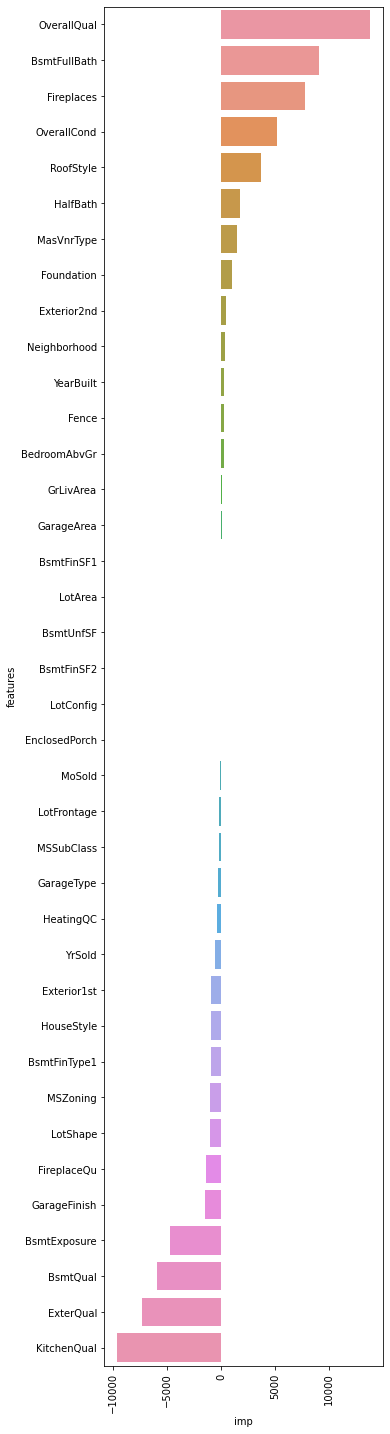

In [132]:
imp_df = pd.DataFrame({'features':X_train.columns, 'imp':lr.coef_}).sort_values(by=['imp'], ascending=False)
# imp_df = imp_df[:12]
plt.figure(figsize=(5,25))
sns.barplot(x=imp_df.imp, y=imp_df.features)
plt.xticks(rotation=90)
plt.show()

We need to check:
    
    Normality of the residuals
    Homoscedasticity
    No autocorrelation in the error term

Normality of the residuals - Pretty normal

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

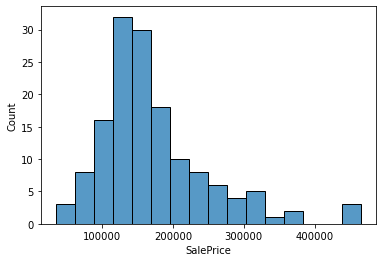

In [133]:
sns.histplot(y_val - y_pred)

Homoscedasticity - I see no cone shape, so no homoscedasticity.

<AxesSubplot:ylabel='SalePrice'>

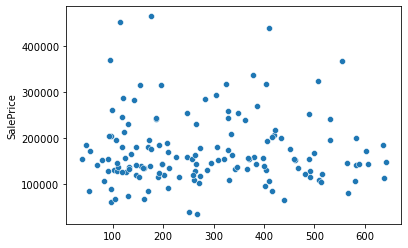

In [134]:
sns.scatterplot(y_pred, y_val - y_pred)

Autocorrelation - No Autocorrelation

In [ ]:
# durbin_watson(y_val - y_pred)

# If this is within the range of 1.5 and 2.5, 
# we will consider there is no autocorrelation

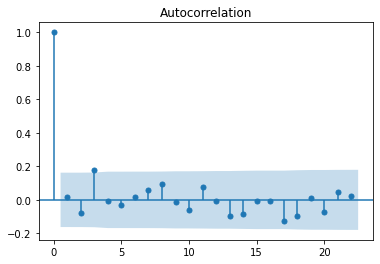

In [136]:
plot_acf(y_val - y_pred, alpha =0.05)
plt.show()

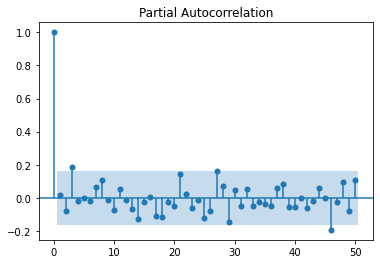

In [137]:
plot_pacf(y_val - y_pred, alpha =0.05, lags=50)
plt.show()

### Elastic Net

Plot with alphas

In [138]:
from sklearn.linear_model import ElasticNet


ENreg = ElasticNet(alpha=15, l1_ratio=0.5, normalize=False)

ENreg.fit(X_train, y_train)

tr_rmse, val_rmse, r2_1, r2_2 = print_score(ENreg, X_train, X_val[X_train.columns],  y_train, y_val)
model_dict['ENreg'] = [tr_rmse, val_rmse, r2_1, r2_2]
tr_rmse, val_rmse, r2_1, r2_2 

(38316.81050445832, 32552.688825270074, 0.7538493476031198, 0.819126964499927)

### Lasso

In [139]:
lassoReg = Lasso(normalize=True)

alphas = [0.001, 0.005, 0.02, 0.03, 0.05, 0.06, 0.07, 0.08, 0.1, 0.5, 0.9]
# lasso_params = {'alpha':[0.02, 0.024, 0.025, 0.026, 0.03, 0.04, 0.05]}
lasso_params = {'alpha':alphas}

model = GridSearchCV(lassoReg, 
            param_grid=lasso_params).fit(X_train, y_train)

print(model.best_estimator_)

pred_on = X_train
y_pred = model.predict(pred_on)

r2 = (r2_score(y_train, y_pred))
print("Train Errors: ",rms, r2)

pred_on = X_val[X_train.columns]
y_pred = model.predict(pred_on)

rms = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = (r2_score(y_val, y_pred))
print("Val Errors: ",rms, r2)

Lasso(alpha=0.9, normalize=True)
Train Errors:  55.66391857228449 0.8277413610350386
Val Errors:  25726.573834558396 0.8870297737606573


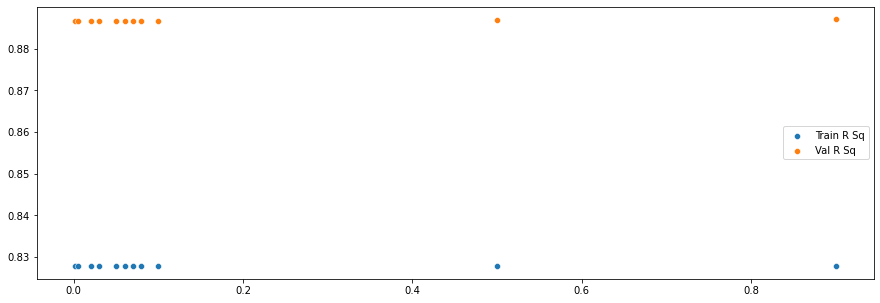

In [140]:
val_rq_list = []
tr_rq_list = []

for i in alphas:
    
    model = Lasso(alpha = i, normalize=True)
    model.fit(X_train, y_train)

    pred_on = X_train
    y_pred = model.predict(pred_on)

    r2 = (r2_score(y_train, y_pred))
    # print("Val Errors: ",rms, r2)
    tr_rq_list.append(r2)
    
    pred_on = X_val[X_train.columns]
    y_pred = model.predict(pred_on)

    r2 = (r2_score(y_val, y_pred))
    # print("Val Errors: ",rms, r2)
    val_rq_list.append(r2)
    
plt.figure(figsize=(15,5))
sns.scatterplot(alphas, tr_rq_list, label ='Train R Sq')
sns.scatterplot(alphas, val_rq_list, label ='Val R Sq')
plt.legend()

32053.095747705964 25778.509259490234 0.8277488022406245 0.8865731969236088


<AxesSubplot:xlabel='val', ylabel='pred'>

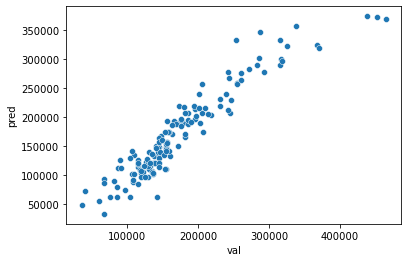

In [141]:
model = Lasso(alpha = 0.02, normalize=True)
model.fit(X_train, y_train)

tr_rmse, val_rmse, r2_1, r2_2 = print_score(model, X_train, X_val[X_train.columns], y_train, y_val)
model_dict['lasso'] = [tr_rmse, val_rmse, r2_1, r2_2]
print(tr_rmse, val_rmse, r2_1, r2_2 )

res_df = pd.DataFrame({'val':y_val, 'pred':y_pred})
sns.scatterplot(res_df.val, res_df.pred)

In [142]:
lasso = model

In [143]:
model.intercept_

43460.2874056717

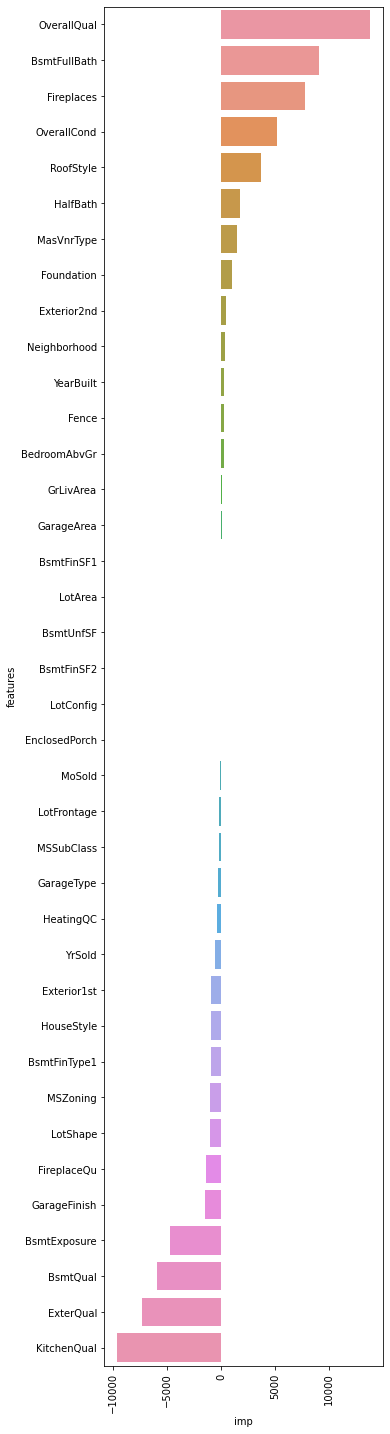

In [144]:
imp_df = pd.DataFrame({'features':X_train.columns, 'imp':model.coef_}).sort_values(by=['imp'], ascending=False)
# imp_df = imp_df[:12]
plt.figure(figsize=(5,25))
sns.barplot(x=imp_df.imp, y=imp_df.features)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

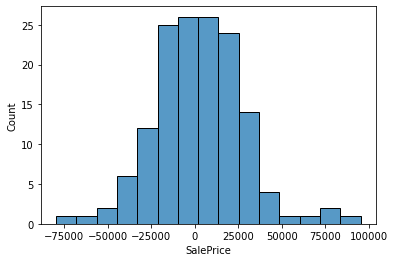

In [145]:
sns.histplot(y_val - y_pred)

<AxesSubplot:ylabel='SalePrice'>

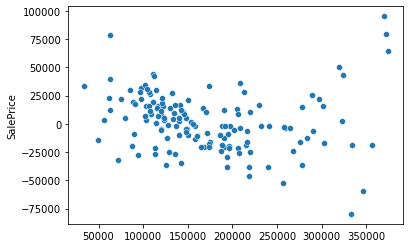

In [146]:
sns.scatterplot(y_pred, y_val - y_pred)

In [147]:
durbin_watson(y_val - y_pred)

# If this is within the range of 1.5 and 2.5, 
# we will consider there is no autocorrelation

2.049293302718209

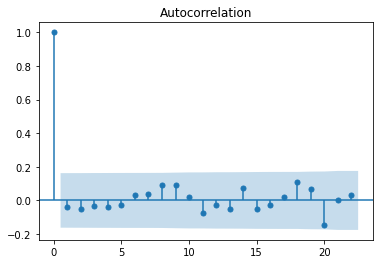

In [148]:
plot_acf(y_val - y_pred, alpha =0.05)
plt.show()

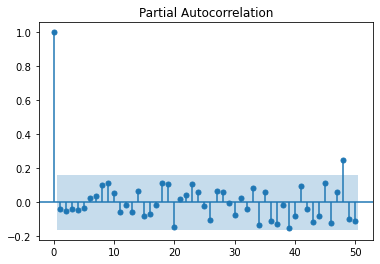

In [149]:
plot_pacf(y_val - y_pred, alpha =0.05, lags=50)
plt.show()

### Ridge

In [150]:
ridgeReg = Ridge(normalize=True)

ridge_params = {'alpha':[0.05, 0.08, 0.1, 0.5, 1, 5, 10, 200, 230, 250,265, 270, 275, 290, 300, 500, 1000]}

model = GridSearchCV(ridgeReg, 
            param_grid=ridge_params).fit(X_train, y_train)

print(model.best_estimator_)

pred_on = X_train
y_pred = model.predict(pred_on)

r2 = (r2_score(y_train, y_pred))
print("Train Errors: ",rms, r2)

pred_on = X_val[X_train.columns]
y_pred = model.predict(pred_on)

rms = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = (r2_score(y_val, y_pred))
print("Val Errors: ",rms, r2)

Ridge(alpha=0.1, normalize=True)
Train Errors:  25726.573834558396 0.8251230437768077
Val Errors:  25665.740342350215 0.8875634047180159


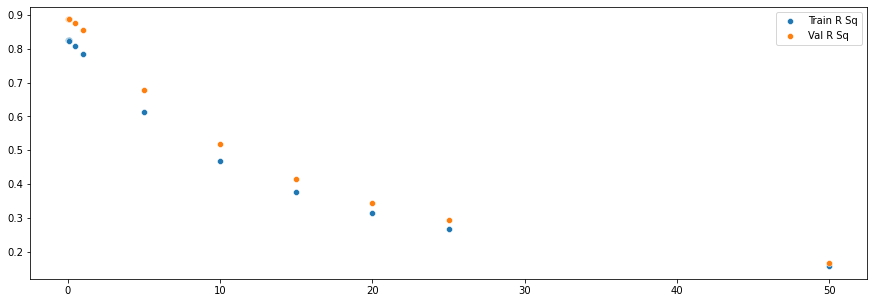

In [151]:
val_rq_list = []
tr_rq_list = []
alphas = [0.025, 0.05, 0.08, 0.1, 0.5, 1, 5, 10, 15, 20, 25, 50]
for i in alphas:
    
    model = Ridge(alpha = i, normalize=True)
    model.fit(X_train, y_train)

    pred_on = X_train
    y_pred = model.predict(pred_on)

    r2 = (r2_score(y_train, y_pred))
    # print("Val Errors: ",rms, r2)
    tr_rq_list.append(r2)
    
    pred_on = X_val[X_train.columns]
    y_pred = model.predict(pred_on)

    r2 = (r2_score(y_val, y_pred))
    # print("Val Errors: ",rms, r2)
    val_rq_list.append(r2)
    
plt.figure(figsize=(15,5))
sns.scatterplot(alphas, tr_rq_list, label ='Train R Sq')
sns.scatterplot(alphas, val_rq_list, label ='Val R Sq')
plt.legend()

So I would say that alpha 0.1 is a good parameter for Ridge Regression and the model did not overfit with it.

In [152]:
model = Ridge(alpha = 0.1, normalize=True)
model.fit(X_train, y_train)

tr_rmse, val_rmse, r2_1, r2_2 = print_score(model, X_train, X_val[X_train.columns], y_train, y_val)
model_dict['ridge'] = [tr_rmse, val_rmse, r2_1, r2_2]
print(tr_rmse, val_rmse, r2_1, r2_2 )

32296.476830362637 25665.740342350215 0.8251230437768077 0.8875634047180159


In [153]:
ridge = model

In [154]:
model.intercept_

53411.1232459592

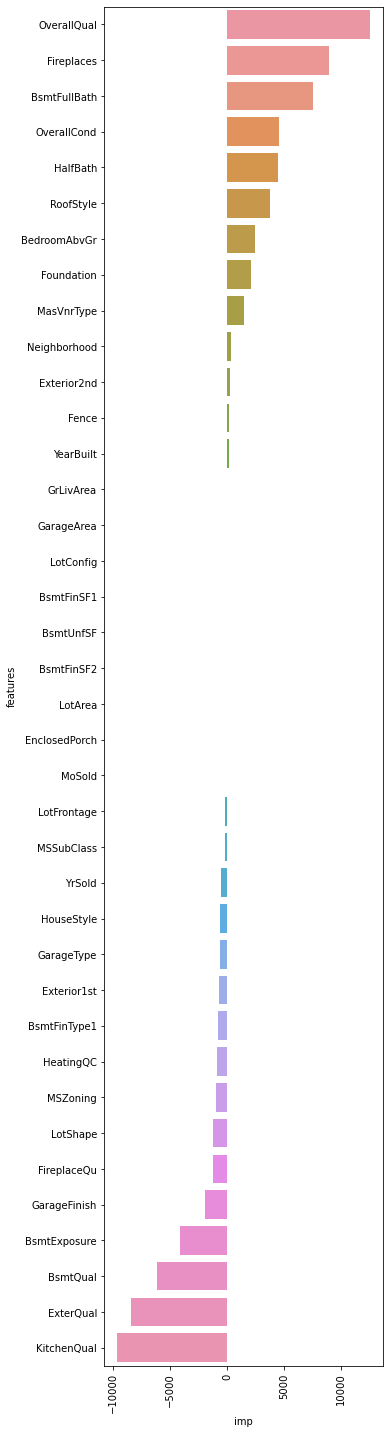

In [155]:
imp_df = pd.DataFrame({'features':X_train.columns, 'imp':model.coef_}).sort_values(by=['imp'], ascending=False)
# imp_df = imp_df[:12]
plt.figure(figsize=(5,25))
sns.barplot(x=imp_df.imp, y=imp_df.features)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

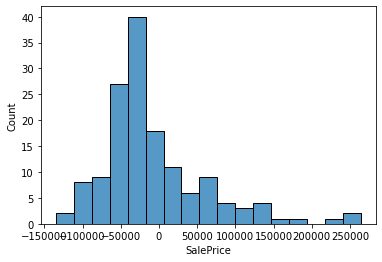

In [156]:
sns.histplot(y_val - y_pred)

<AxesSubplot:ylabel='SalePrice'>

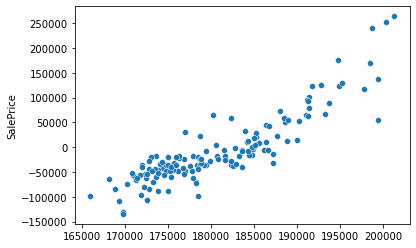

In [157]:
sns.scatterplot(y_pred, y_val - y_pred)

In [158]:
durbin_watson(y_val - y_pred)

# If this is within the range of 1.5 and 2.5, 
# we will consider there is no autocorrelation

1.9141660141495336

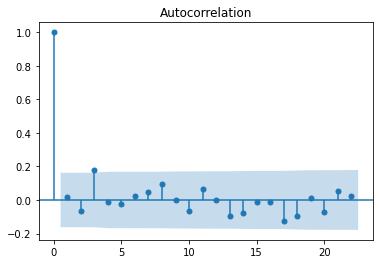

In [159]:
plot_acf(y_val - y_pred, alpha =0.05)
plt.show()

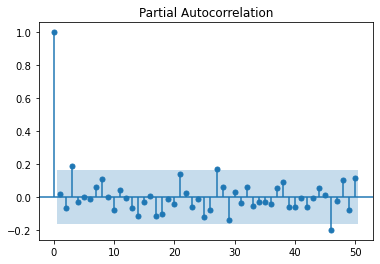

In [160]:
plot_pacf(y_val - y_pred, alpha =0.05, lags=50)
plt.show()

### Linear Regression - Backward Feature Elimination

#### Using mlextend

I wanted to check 20 most important features, we can increase this no in an extension to this project.

In [161]:
# !pip install mlxtend

In [162]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

lreg = LinearRegression()

sfs1 = sfs(lreg, k_features=20, forward=False, verbose=0, scoring='neg_mean_squared_error')

sfs1 = sfs1.fit(X_train, y_train)

feat_names = list(sfs1.k_feature_names_)

In [163]:
print(feat_names)

['MSSubClass', 'LotArea', 'LotShape', 'Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'RoofStyle', 'ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'GrLivArea', 'BsmtFullBath', 'KitchenQual', 'Fireplaces', 'FireplaceQu', 'GarageFinish', 'GarageArea']


In [164]:
new_data = X_train[feat_names]
new_data['SalePrice'] = y_train

new_data.head()

MSSubClass  LotArea  LotShape  Neighborhood  HouseStyle OverallQual  \
254          20     8400         3            12           2           5   
1066         60     7837         0             8           5           6   
638          30     8777         3             7           2           5   
799          50     7200         3            18           0           5   
380          50     5000         3            18           0           5   

     OverallCond  YearBuilt  RoofStyle  ExterQual  BsmtQual  BsmtExposure  \
254            6         64          1          3         4             3   
1066           7        100          1          2         2             3   
638            7         20          1          3         1             3   
799            7         46          1          3         2             3   
380            6         34          1          3         4             3   

      BsmtFinType1  GrLivArea BsmtFullBath  KitchenQual Fireplaces  \
254              5       1314            1            3          0   
1066             6       1571            0            3          1   
638              6        796            0            3          0   
799              0       1768            1            2          2   
380              3       1691            0            2          1   

      FireplaceQu  GarageFinish  GarageArea  SalePrice  
254             3             2       294.0   145000.0  
1066            5             2       380.0   178000.0  
638             3             1         0.0    85000.0  
799             5             3       240.0   175000.0  
380             2             3       308.0   127000.0

32407.801010332543 25693.641780058737 0.8239153834818104 0.8873188103424505


<AxesSubplot:xlabel='val', ylabel='pred'>

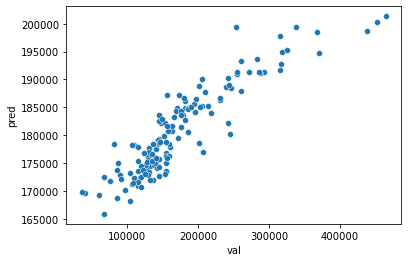

In [165]:
model = LinearRegression(normalize=True)
model.fit(X_train[feat_names], y_train)

tr_rmse, val_rmse, r2_1, r2_2 = print_score(model, X_train[feat_names], X_val[feat_names], y_train, y_val)
model_dict['lr_mlxtend'] = [tr_rmse, val_rmse, r2_1, r2_2]
print(tr_rmse, val_rmse, r2_1, r2_2 )

res_df = pd.DataFrame({'val':y_val, 'pred':y_pred})
sns.scatterplot(res_df.val, res_df.pred)

In [166]:
lr_mlxtend = model

In [167]:
model.intercept_

19616.89168432253

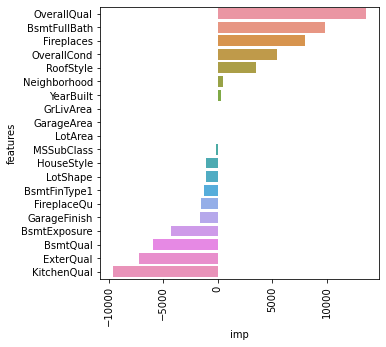

In [168]:
imp_df = pd.DataFrame({'features':feat_names, 'imp':model.coef_}).sort_values(by=['imp'], ascending=False)
# imp_df = imp_df[:12]
plt.figure(figsize=(5,5))
sns.barplot(x=imp_df.imp, y=imp_df.features)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

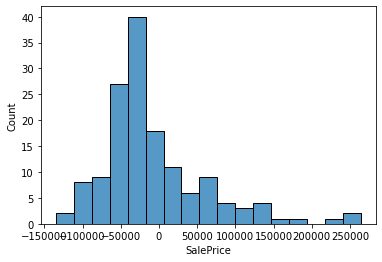

In [169]:
sns.histplot(y_val - y_pred)

<AxesSubplot:ylabel='SalePrice'>

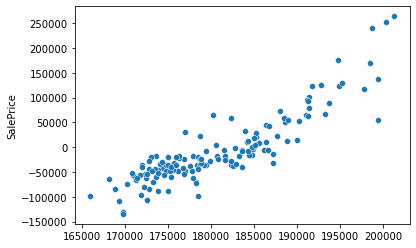

In [170]:
sns.scatterplot(y_pred, y_val - y_pred)

In [171]:
durbin_watson(y_val - y_pred)

# If this is within the range of 1.5 and 2.5, 
# we will consider there is no autocorrelation

1.9141660141495336

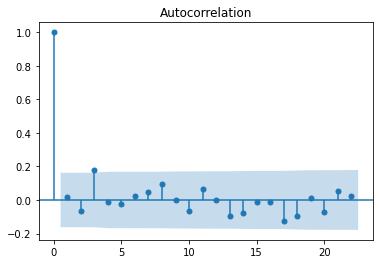

In [172]:
plot_acf(y_val - y_pred, alpha =0.05)
plt.show()

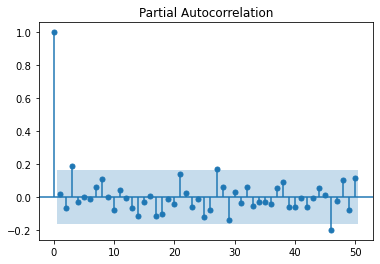

In [173]:
plot_pacf(y_val - y_pred, alpha =0.05, lags=50)
plt.show()

#### Using statsmodels

In [174]:
X_train_copy = X_train.copy()

condition = True
# condition = False
while(condition):
    X_train_opt = np.append(arr = np.ones((len(X_train),1)).astype(float), values = X_train_copy, axis = 1) 

    regressor_OLS = sm.OLS(endog = y_train, exog = X_train_opt.astype(float)).fit()

    pvals = regressor_OLS.pvalues.iloc[1:]
    if input()=='n':
        condition = False
    else:
        if max(pvals)>0.05:
            indx_to_remove = pvals.argmax()
            X_train_copy = X_train_copy.drop(X_train_copy.columns[indx_to_remove], axis=1)
        else:
            print('Done.')
            condition = False
    print(pd.read_html(regressor_OLS.summary().tables[0].as_html(),header=0,index_col=0)[0])
    
regressor_OLS.summary()


                          SalePrice           R-squared:      0.828
Dep. Variable:                                                     
Model:                          OLS      Adj. R-squared:      0.822
Method:               Least Squares         F-statistic:    142.800
Date:              Sun, 27 Feb 2022  Prob (F-statistic):      0.000
Time:                      16:39:34      Log-Likelihood: -13775.000
No. Observations:              1168                 AIC:  27630.000
Df Residuals:                  1129                 BIC:  27830.000
Df Model:                        38                  NaN        NaN
Covariance Type:          nonrobust                  NaN        NaN

                          SalePrice           R-squared:      0.828
Dep. Variable:                                                     
Model:                          OLS      Adj. R-squared:      0.822
Method:               Least Squares         F-statistic:    146.800
Date:              Sun, 27 Feb 2022  Prob (F-s


                          SalePrice           R-squared:      0.827
Dep. Variable:                                                     
Model:                          OLS      Adj. R-squared:      0.823
Method:               Least Squares         F-statistic:    218.700
Date:              Sun, 27 Feb 2022  Prob (F-statistic):      0.000
Time:                      16:39:38      Log-Likelihood: -13777.000
No. Observations:              1168                 AIC:  27610.000
Df Residuals:                  1142                 BIC:  27740.000
Df Model:                        25                  NaN        NaN
Covariance Type:          nonrobust                  NaN        NaN

                          SalePrice           R-squared:      0.827
Dep. Variable:                                                     
Model:                          OLS      Adj. R-squared:      0.824
Method:               Least Squares         F-statistic:    227.900
Date:              Sun, 27 Feb 2022  Prob (F-s

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     248.6
Date:                Sun, 27 Feb 2022   Prob (F-statistic):               0.00
Time:                        16:39:41   Log-Likelihood:                -13778.
No. Observations:                1168   AIC:                         2.760e+04
Df Residuals:                    1145   BIC:                         2.772e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.961e+04   1.41e+04      2.802      0.005    1.19e+04    6.73e+04
x1          -218.8053     27.726     -7.892      0.000    -273.204    -164.407
x2          -206.2838     51.439     -4.010      0.000    -307.209    -105.359
x3             0.4527      0.099      4.579      0.000       0.259       0.647
x4         -1057.0551    718.507     -1.471      0.142   -2466.793     352.683
x5           404.6679    166.899      2.425      0.015      77.205     732.131
x6          -882.1088    605.298     -1.457      0.145   -2069.727     305.510
x7          1.355e+04   1254.086     10.807      0.000    1.11e+04     1.6e+04
x8          5225.6469    976.387      5.352      0.000    3309.938    7141.355
x9           323.8181     55.146      5.872      0.000     215.620     432.017
x10         3529.5065   1188.344      2.970      0.003    1197.931    5861.082
x11         -542.3390    311.248     -1.742      0.082   -1153.020      68.342
x12        -7332.0524   2079.242     -3.526      0.000   -1.14e+04   -3252.500
x13        -6115.3616   1079.651     -5.664      0.000   -8233.678   -3997.045
x14        -4624.8815    941.916     -4.910      0.000   -6472.957   -2776.806
x15        -1150.7877    505.914     -2.275      0.023   -2143.410    -158.165
x16           53.0107      2.802     18.916      0.000      47.512      58.509
x17         1.001e+04   2206.931      4.534      0.000    5675.287    1.43e+04
x18        -9830.6511   1622.746     -6.058      0.000    -1.3e+04   -6646.762
x19         7980.3117   1767.202      4.516      0.000    4512.995    1.14e+04
x20        -1584.7717    862.432     -1.838      0.066   -3276.896     107.353
x21        -1708.6509    976.316     -1.750      0.080   -3624.221     206.919
x22           35.5393      6.218      5.715      0.000      23.339      47.739
==============================================================================
Omnibus:                      586.526   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80151.943
Skew:                          -1.275   Prob(JB):                         0.00
Kurtosis:                      43.503   Cond. No.                     2.27e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.27e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [175]:
X_train_copy.head()

MSSubClass  LotFrontage  LotArea  LotShape  Neighborhood  HouseStyle  \
254          20         70.0     8400         3            12           2   
1066         60         59.0     7837         0             8           5   
638          30         67.0     8777         3             7           2   
799          50         60.0     7200         3            18           0   
380          50         50.0     5000         3            18           0   

     OverallQual OverallCond  YearBuilt  RoofStyle  Exterior1st  ExterQual  \
254            5           6         64          1            8          3   
1066           6           7        100          1           12          2   
638            5           7         20          1            8          3   
799            5           7         46          1           13          3   
380            5           6         34          1            3          3   

      BsmtQual  BsmtExposure  BsmtFinType1  GrLivArea BsmtFullBath  \
254          4             3             5       1314            1   
1066         2             3             6       1571            0   
638          1             3             6        796            0   
799          2             3             0       1768            1   
380          4             3             3       1691            0   

      KitchenQual Fireplaces  FireplaceQu  GarageFinish  GarageArea  
254             3          0            3             2       294.0  
1066            3          1            5             2       380.0  
638             3          0            3             1         0.0  
799             2          2            5             3       240.0  
380             2          1            2             3       308.0

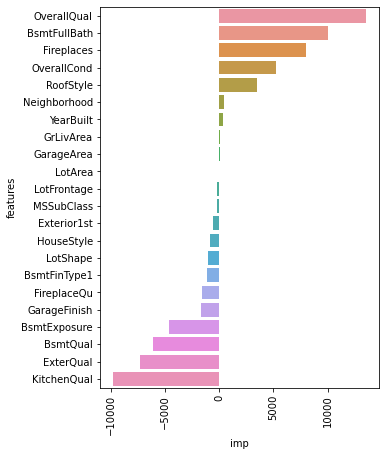

In [176]:
sum_tab = pd.read_html(regressor_OLS.summary().tables[1].as_html(),header=0,index_col=0)[0]
# sum_tab

imp_df = pd.DataFrame({'features':X_train_copy.columns, 'imp':sum_tab.coef[1:]}).sort_values(by=['imp'], ascending=False)

plt.figure(figsize=(5,7))
sns.barplot(x=imp_df.imp, y=imp_df.features)
plt.xticks(rotation=90)
plt.show()

In [177]:
imp_df[abs(imp_df.imp)>1700]
imp_df

features         imp
x7    OverallQual  13550.0000
x17  BsmtFullBath  10010.0000
x19    Fireplaces   7980.3117
x8    OverallCond   5225.6469
x10     RoofStyle   3529.5065
x5   Neighborhood    404.6679
x9      YearBuilt    323.8181
x16     GrLivArea     53.0107
x22    GarageArea     35.5393
x3        LotArea      0.4527
x2    LotFrontage   -206.2838
x1     MSSubClass   -218.8053
x11   Exterior1st   -542.3390
x6     HouseStyle   -882.1088
x4       LotShape  -1057.0551
x15  BsmtFinType1  -1150.7877
x20   FireplaceQu  -1584.7717
x21  GarageFinish  -1708.6509
x14  BsmtExposure  -4624.8815
x13      BsmtQual  -6115.3616
x12     ExterQual  -7332.0524
x18   KitchenQual  -9830.6511

In [178]:
feat_names_stats = X_train_copy.columns

Train Errors:  25665.740342350215 0.1653565815063145


<AxesSubplot:xlabel='val', ylabel='pred'>

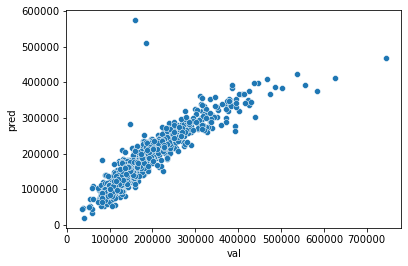

In [179]:
X_train_opt = np.append(arr = np.ones((len(X_train_copy),1)).astype(float), 
                        values = X_train_copy[feat_names_stats], axis = 1) 
y_pred = regressor_OLS.predict(X_train_opt.astype(float))

rms_11 = np.sqrt(mean_squared_error(y_train, y_pred))
r2_11 = (r2_score(y_train, y_pred))
print("Train Errors: ",rms, r2)

res_df = pd.DataFrame({'val':y_train, 'pred':y_pred})
sns.scatterplot(res_df.val, res_df.pred)

Val Errors:  25665.740342350215 0.1653565815063145


<AxesSubplot:xlabel='val', ylabel='pred'>

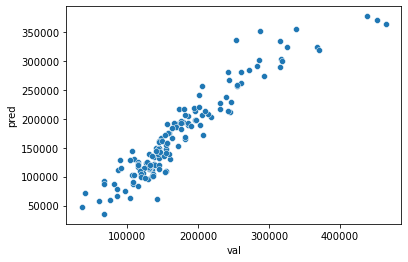

In [180]:
X_val_opt = np.append(arr = np.ones((len(X_val),1)).astype(float), values = X_val[feat_names_stats], axis = 1) 
y_pred = regressor_OLS.predict(X_val_opt.astype(float))

rms_22 = np.sqrt(mean_squared_error(y_val, y_pred))
r2_22 = (r2_score(y_val, y_pred))
print("Val Errors: ",rms, r2)

res_df = pd.DataFrame({'val':y_val, 'pred':y_pred})
sns.scatterplot(res_df.val, res_df.pred)

In [181]:
model_dict['regressor_OLS'] = [rms_11, rms_22, r2_11, r2_22]

In [182]:
regressor_OLS.params.const

39606.10067876608

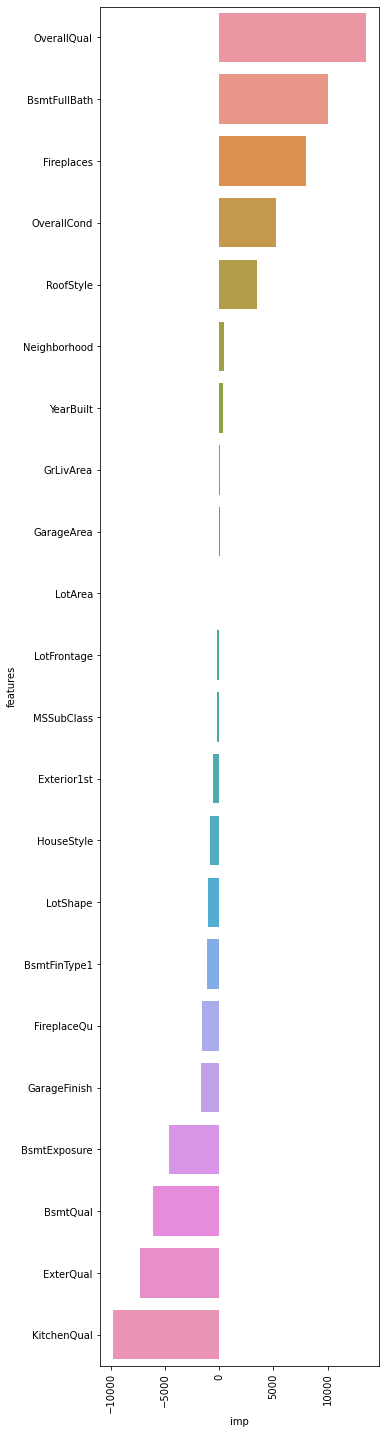

In [183]:
imp_df = pd.DataFrame({'features':feat_names_stats, 'imp':regressor_OLS.params[1:]}).sort_values(by=['imp'], ascending=False)
# imp_df = imp_df[:12]
plt.figure(figsize=(5,25))
sns.barplot(x=imp_df.imp, y=imp_df.features)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

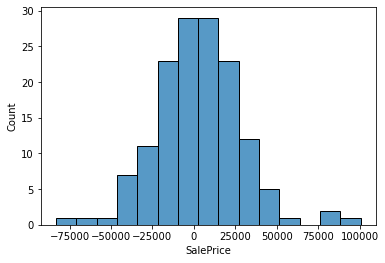

In [184]:
sns.histplot(y_val - y_pred)

<AxesSubplot:ylabel='SalePrice'>

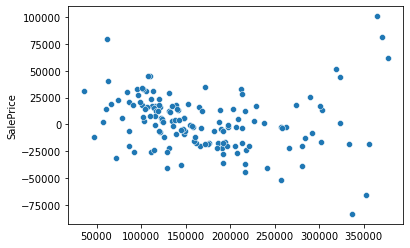

In [185]:
sns.scatterplot(y_pred, y_val - y_pred)

In [186]:
durbin_watson(y_val - y_pred)

# If this is within the range of 1.5 and 2.5, 
# we will consider there is no autocorrelation

2.033100189244154

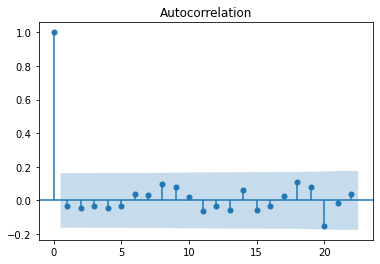

In [187]:
plot_acf(y_val - y_pred, alpha =0.05)
plt.show()

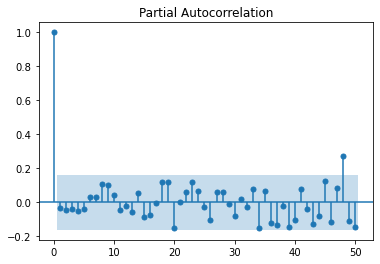

In [188]:
plot_pacf(y_val - y_pred, alpha =0.05, lags=50)
plt.show()

So essentially, 
we did not transform the SalePrice with log1p for these results so no inversion is required.

By reducing GrLivArea by one unit we can make the house cheaper by $.
<br> Which means it is a /SQ Ft home.

Going by this logic, GarageArea is /sq-ft.

Also having one less fireplace will help us get the home  cheaper.

#### Verdict

> Backward Feature Elimination using MLExtend:
 
    Imp features: (4 most important)
        
        OverallQual, BsmtQual, GrLivArea, BsmtFullBath
    
> Backward Feature Elimination using P Values:
    It turns out if we keep p-val at 0.05 and don't want R-Sq below 0.75 then we need these features:
    
    ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'LotConfig', 
     'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'HeatingQC', 
     'GrLivArea', 'BsmtFullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces', 'FireplaceQu', 
     'GarageType', 'GarageFinish', 'GarageArea', 'EnclosedPorch', 'Fence']

## XGBRegressor

In [189]:
X_train_copy = X_train.copy()

In [190]:
X_train_copy = X_train_copy.apply(pd.to_numeric)

### Baseline

In [191]:
xgbr = xgb.XGBRegressor(seed=27)

xgbr.fit(X_train_copy, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=27,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [192]:
y_pred = xgbr.predict(X_train_copy)

rms = np.sqrt(mean_squared_error(y_train, y_pred))
r2 = (r2_score(y_train, y_pred))
print(f'Train Errors: RMSE: {rms}, R Sq: {r2}')

pred_on = X_val[X_train_copy.columns].apply(pd.to_numeric)
y_pred = xgbr.predict(pred_on)

rms = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = (r2_score(y_val, y_pred))
print(f'Val Errors: RMSE: {rms}, R Sq: {r2}')

Train Errors: RMSE: 989.7057444163717, R Sq: 0.9998357768149879
Val Errors: RMSE: 24744.130491744352, R Sq: 0.8954932148043102


### Finding best model

In [193]:
# Params to try

# params = { 'max_depth': [3,6,10],
#            'learning_rate': [0.01, 0.05, 0.1],
#            'n_estimators': [100, 500, 1000],
#            'colsample_bytree': [0.3, 0.7]}

# params = {
#     'max_depth':range(3,10,2),
#     'min_child_weight':[6,8,10,12]
#     'gamma':[i/10.0 for i in range(0,5)]
    
# }

# xgbr = xgb.XGBRegressor(seed = 20)
# clf = GridSearchCV(estimator=xgbr, 
#                    param_grid=params,
#                    scoring='neg_mean_squared_error', 
#                    verbose=1)
# clf.fit(X_train_copy, y_train)
# print("Best parameters:", clf.best_params_)
# print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

In [194]:
# Step 1

In [195]:
# xgbr = xgb.XGBRegressor(
#  learning_rate =0.1,
#  n_estimators=1000,
#  max_depth=5,
#  min_child_weight=1,
#  gamma=0,
#  subsample=0.8,
#  colsample_bytree=0.8,
#  objective= 'reg:squarederror',
#  nthread=4,
#  scale_pos_weight=1,
#  seed=27)

# params = {
#  'max_depth':range(3,10,2),
#  'min_child_weight':range(1,6,2)
# }

In [196]:
# %%time
# clf = GridSearchCV(estimator=xgbr, 
#                    param_grid=params,
#                    scoring='neg_mean_squared_error', 
#                    verbose=2)
# clf.fit(X_train_copy, y_train)
# print("Best parameters:", clf.best_params_)
# print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

In [197]:
# step 2

In [198]:
# %%time

# xgbr = xgb.XGBRegressor(
#  learning_rate =0.1,
#  n_estimators=1000,
#  max_depth=5,
#  min_child_weight=1,
#  gamma=0,
#  subsample=0.8,
#  colsample_bytree=0.8,
#  objective= 'reg:squarederror',
#  nthread=4,
#  scale_pos_weight=1,
#  seed=27)

# params = {
#  'max_depth':[4,5,6],
#  'min_child_weight':[0.1,0.5,1]
# }

# clf = GridSearchCV(estimator=xgbr, 
#                    param_grid=params,
#                    scoring='neg_mean_squared_error', 
#                    verbose=2)
# clf.fit(X_train_copy, y_train)
# print("Best parameters:", clf.best_params_)
# print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

In [199]:
# pred_on = X_val[X_train_copy.columns].apply(pd.to_numeric)
# y_pred = clf.predict(pred_on)

# rms = np.sqrt(mean_squared_error(y_val, y_pred))
# r2 = (r2_score(y_val, y_pred))
# print("Val Errors: ",rms, r2)

# pred_on = X_test[X_train_copy.columns].apply(pd.to_numeric)
# y_pred = lr.predict(pred_on)

# rms = np.sqrt(mean_squared_error(y_test, y_pred))
# r2 = (r2_score(y_test, y_pred))
# print(rms, r2)

In [200]:
# Step 3

In [201]:
# %%time

# xgbr = xgb.XGBRegressor(
#  learning_rate =0.1,
#  n_estimators=1000,
#  max_depth=5,
#  min_child_weight=0.1,
#  gamma=0,
#  subsample=0.8,
#  colsample_bytree=0.8,
#  objective= 'reg:squarederror',
#  nthread=4,
#  scale_pos_weight=1,
#  seed=27)

# params = {
#  'gamma':[i/10.0 for i in range(0,5)]
# }

# clf = GridSearchCV(estimator=xgbr, 
#                    param_grid=params,
#                    scoring='neg_mean_squared_error', 
#                    verbose=2)
# clf.fit(X_train_copy, y_train)
# print("Best parameters:", clf.best_params_)
# print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

# pred_on = X_val[X_train_copy.columns].apply(pd.to_numeric)
# y_pred = clf.predict(pred_on)

# rms = np.sqrt(mean_squared_error(y_val, y_pred))
# r2 = (r2_score(y_val, y_pred))
# print("Val Errors: ",rms, r2)

# pred_on = X_test[X_train_copy.columns].apply(pd.to_numeric)
# y_pred = lr.predict(pred_on)

# rms = np.sqrt(mean_squared_error(y_test, y_pred))
# r2 = (r2_score(y_test, y_pred))
# print(rms, r2)

In [202]:
# Step 4

In [203]:
# %%time


# xgbr = xgb.XGBRegressor(
#  learning_rate =0.1,
#  n_estimators=1000,
#  max_depth=5,
#  min_child_weight=0.1,
#  gamma=0,
#  subsample=0.8,
#  colsample_bytree=0.8,
#  objective= 'reg:squarederror',
#  nthread=4,
#  scale_pos_weight=1,
#  seed=27)

# params = {
#  'subsample':[i/10.0 for i in range(6,10)],
#  'colsample_bytree':[i/10.0 for i in range(6,10)]
# }

# clf = GridSearchCV(estimator=xgbr, 
#                    param_grid=params,
#                    scoring='neg_mean_squared_error', 
#                    verbose=2)
# clf.fit(X_train_copy, y_train)
# print("Best parameters:", clf.best_params_)
# print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

# pred_on = X_val[X_train_copy.columns].apply(pd.to_numeric)
# y_pred = clf.predict(pred_on)

# rms = np.sqrt(mean_squared_error(y_val, y_pred))
# r2 = (r2_score(y_val, y_pred))
# print("Val Errors: ",rms, r2)

# pred_on = X_test[X_train_copy.columns].apply(pd.to_numeric)
# y_pred = lr.predict(pred_on)

# rms = np.sqrt(mean_squared_error(y_test, y_pred))
# r2 = (r2_score(y_test, y_pred))
# print(rms, r2)

In [204]:
# Step 5

In [205]:
# %%time

# xgbr = xgb.XGBRegressor(
#  learning_rate =0.1,
#  n_estimators=1000,
#  max_depth=5,
#  min_child_weight=0.1,
#  gamma=0,
#  subsample=0.8,
#  colsample_bytree=0.8,
#  objective= 'reg:squarederror',
#  nthread=4,
#  scale_pos_weight=1,
#  seed=27)

# params = {
#  'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
# }

# clf = GridSearchCV(estimator=xgbr, 
#                    param_grid=params,
#                    scoring='neg_mean_squared_error', 
#                    verbose=2)
# clf.fit(X_train_copy, y_train)
# print("Best parameters:", clf.best_params_)
# print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

# pred_on = X_val[X_train_copy.columns].apply(pd.to_numeric)
# y_pred = clf.predict(pred_on)

# rms = np.sqrt(mean_squared_error(y_val, y_pred))
# r2 = (r2_score(y_val, y_pred))
# print("Val Errors: ",rms, r2)

# pred_on = X_test[X_train_copy.columns].apply(pd.to_numeric)
# y_pred = lr.predict(pred_on)

# rms = np.sqrt(mean_squared_error(y_test, y_pred))
# r2 = (r2_score(y_test, y_pred))
# print(rms, r2)

### Final

In [206]:
# xgbr = xgb.XGBRegressor(
#  learning_rate =0.1,
#  n_estimators=1000,
#  max_depth=5,
#  min_child_weight=0.1,
#  gamma=0,
#  reg_alpha=0.005,
#  subsample=0.8,
#  colsample_bytree=0.8,
#  objective= 'reg:squarederror',
#  nthread=4,
#  scale_pos_weight=1,
#  seed=27)

In [207]:

tr_rmse, val_rmse, r2_1, r2_2 = print_score(xgbr, 
                                            X_train_copy, X_val[X_train_copy.columns].apply(pd.to_numeric),  y_train, y_val)

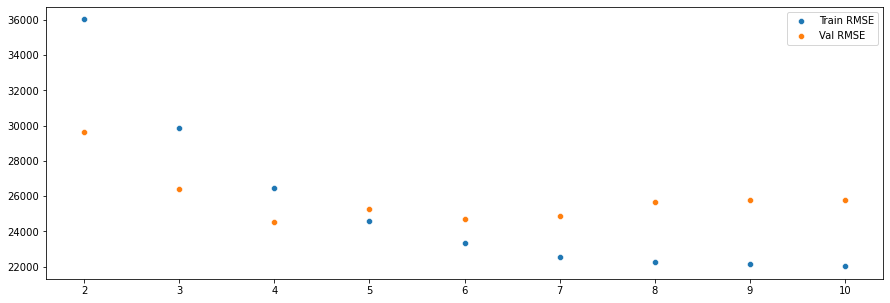

In [208]:
tr_e = []
val_e = []
max_depths_to_try = [2,3,4,5,6,7,8,9,10]
for i in max_depths_to_try:

    xgbr = xgb.XGBRegressor(
     learning_rate =0.1,
     n_estimators=25,
     max_depth=i,
     min_child_weight=0.1,
     gamma=0,
     reg_alpha=0.005,
     subsample=0.8,
     colsample_bytree=0.8,
     objective= 'reg:squarederror',
     nthread=4,
     scale_pos_weight=1,
     seed=27)

    xgbr.fit(X_train_copy, y_train)

    tr_rmse, val_rmse, r2_1, r2_2 = print_score(xgbr, X_train_copy, X_val[X_train_copy.columns].apply(pd.to_numeric),  y_train, y_val)
    
    tr_e.append(tr_rmse)
    val_e.append(val_rmse)
    
plt.figure(figsize=(15,5))
sns.scatterplot(max_depths_to_try, tr_e, label ='Train RMSE')
sns.scatterplot(max_depths_to_try, val_e, label ='Val RMSE')
plt.legend()

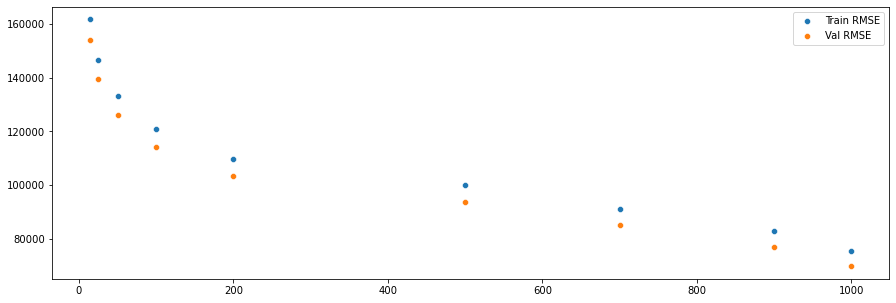

In [209]:
tr_e = []
val_e = []
n_estimators_to_try = [15, 25, 50, 100, 200, 500, 700, 900, 1000]
for i in max_depths_to_try:

    xgbr = xgb.XGBRegressor(
     learning_rate =0.1,
     n_estimators=i,
     max_depth=5,
     min_child_weight=0.1,
     gamma=0,
     reg_alpha=0.005,
     subsample=0.8,
     colsample_bytree=0.8,
     objective= 'reg:squarederror',
     nthread=4,
     scale_pos_weight=1,
     seed=27)

    xgbr.fit(X_train_copy, y_train)

    tr_rmse, val_rmse, r2_1, r2_2 = print_score(xgbr, X_train_copy, X_val[X_train_copy.columns].apply(pd.to_numeric),  y_train, y_val)
    
    tr_e.append(tr_rmse)
    val_e.append(val_rmse)
    
plt.figure(figsize=(15,5))
sns.scatterplot(n_estimators_to_try, tr_e, label ='Train RMSE')
sns.scatterplot(n_estimators_to_try, val_e, label ='Val RMSE')
plt.legend()

In [210]:
xgbr = xgb.XGBRegressor(
     learning_rate =0.1,
     n_estimators=25,
     max_depth=5,
     min_child_weight=0.1,
     gamma=0,
     reg_alpha=0.005,
     subsample=0.8,
     colsample_bytree=0.8,
     objective= 'reg:squarederror',
     nthread=4,
     scale_pos_weight=1,
     seed=27)

xgbr.fit(X_train_copy, y_train)

tr_rmse, val_rmse, r2_1, r2_2 = print_score(xgbr, X_train_copy, 
                                            X_val[X_train_copy.columns].apply(pd.to_numeric), y_train, y_val)
tr_rmse, val_rmse, r2_1, r2_2

(24596.82421365921, 25259.019270890327, 0.89856674470391, 0.891098700493482)

In [211]:
model_dict['xgbr'] = [tr_rmse, val_rmse, r2_1, r2_2]
tr_rmse, val_rmse, r2_1, r2_2 

(24596.82421365921, 25259.019270890327, 0.89856674470391, 0.891098700493482)

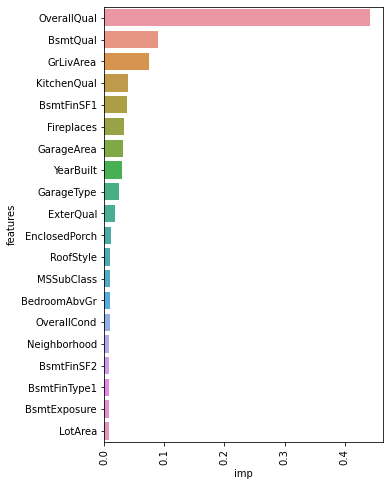

In [212]:
imp_df = pd.DataFrame({'features':X_train_copy.columns, 'imp':xgbr.feature_importances_}).sort_values(by=['imp'], ascending=False)
imp_df = imp_df[:20]
plt.figure(figsize=(5,8))
sns.barplot(x=imp_df.imp, y=imp_df.features)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

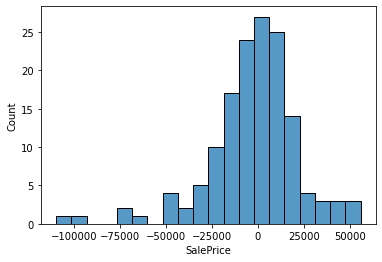

In [213]:
sns.histplot(y_val - y_pred)

## Random Forest Regressor

### Baseline

In [214]:
rfr = RandomForestRegressor()
rfr.fit(X_train_copy, y_train)

print_score(rfr, X_train_copy, X_val[X_train_copy.columns].apply(pd.to_numeric), y_train, y_val)

(12019.941095892682, 22176.28440119547, 0.9757770536336238, 0.9160583196117609)

### Finding the best model

In [215]:
# %%time
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import GridSearchCV

# params={  'max_depth': [5, 10, None], 
#          'max_features': ['auto'], 
#          'n_estimators': [10, 100, 250, 500, 700, 800, 1000]}

# rfr = RandomForestRegressor()
# clf = GridSearchCV(estimator=rfr, 
#                    param_grid=params,
#                    scoring='neg_mean_squared_error', 
#                    verbose=1)
# clf.fit(X_train_copy, y_train)
# print("Best parameters:", clf.best_params_)
# print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

# pred_on = X_val[X_train_copy.columns].apply(pd.to_numeric)
# y_pred = clf.predict(pred_on)

# rms = np.sqrt(mean_squared_error(y_val, y_pred))
# r2 = (r2_score(y_val, y_pred))
# print("Val Errors: ",rms, r2)

In [216]:
# Fitting 5 folds for each of 36 candidates, totalling 180 fits
# Best parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'log2', 'n_estimators': 500}
# Lowest RMSE:  31122.676660515
# Val Errors:  23372.077786452188 0.9067616155645672
# 41278.5966307294 0.8189044399992987
# Wall time: 7min 54s

### Final

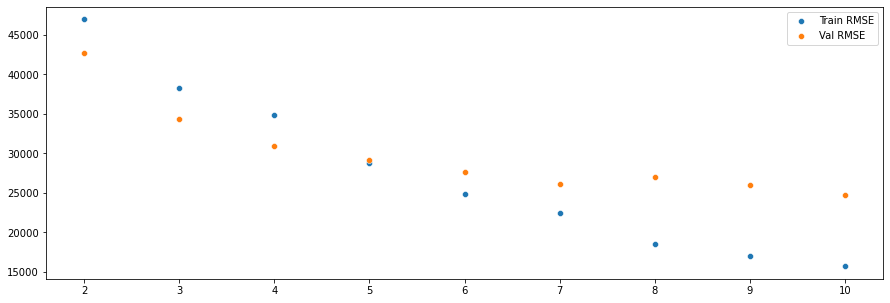

In [217]:
tr_e = []
val_e = []
max_depths_to_try = [2,3,4,5,6,7,8,9,10]

for i in max_depths_to_try:

    rfr = RandomForestRegressor(bootstrap= True, max_depth=i, max_features= 'log2', n_estimators=25)
    rfr.fit(X_train_copy, y_train)

    tr_rmse, val_rmse, r2_1, r2_2 = print_score(rfr, X_train_copy, X_val[X_train_copy.columns].apply(pd.to_numeric), y_train, y_val)
    
    tr_e.append(tr_rmse)
    val_e.append(val_rmse)
    
plt.figure(figsize=(15,5))
sns.scatterplot(max_depths_to_try, tr_e, label ='Train RMSE')
sns.scatterplot(max_depths_to_try, val_e, label ='Val RMSE')
plt.legend()

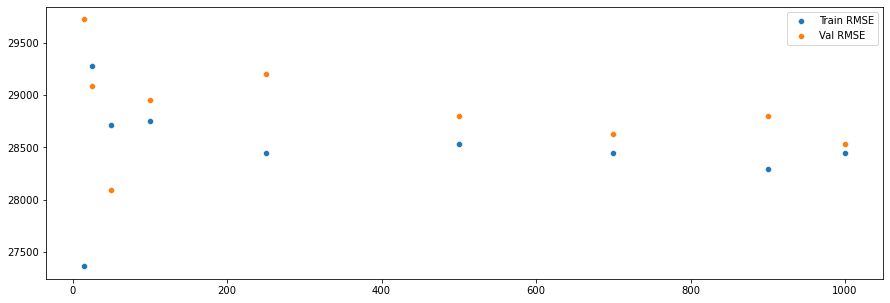

In [218]:
tr_e = []
val_e = []
n_estimators_to_try = [15, 25, 50, 100, 250, 500, 700, 900, 1000]

for i in n_estimators_to_try:

    rfr = RandomForestRegressor(bootstrap= True, max_depth=5, max_features= 'log2', n_estimators=i)
    rfr.fit(X_train_copy, y_train)

    tr_rmse, val_rmse, r2_1, r2_2 = print_score(rfr, X_train_copy, X_val[X_train_copy.columns].apply(pd.to_numeric), y_train, y_val)
    
    tr_e.append(tr_rmse)
    val_e.append(val_rmse)
    
plt.figure(figsize=(15,5))
sns.scatterplot(n_estimators_to_try, tr_e, label ='Train RMSE')
sns.scatterplot(n_estimators_to_try, val_e, label ='Val RMSE')
plt.legend()

In [219]:
rfr = RandomForestRegressor(bootstrap= True, max_depth=5, max_features= 'log2', n_estimators=500)
rfr.fit(X_train_copy, y_train)

tr_rmse, val_rmse, r2_1, r2_2  = print_score(rfr, X_train_copy, X_val[X_train_copy.columns].apply(pd.to_numeric), y_train, y_val)
tr_rmse, val_rmse, r2_1, r2_2 

(28498.145353667478,
 28572.109250289664,
 0.8638381375143974,
 0.8606571471719313)

In [220]:
model_dict['rfr'] = [tr_rmse, val_rmse, r2_1, r2_2]
tr_rmse, val_rmse, r2_1, r2_2 

(28498.145353667478,
 28572.109250289664,
 0.8638381375143974,
 0.8606571471719313)

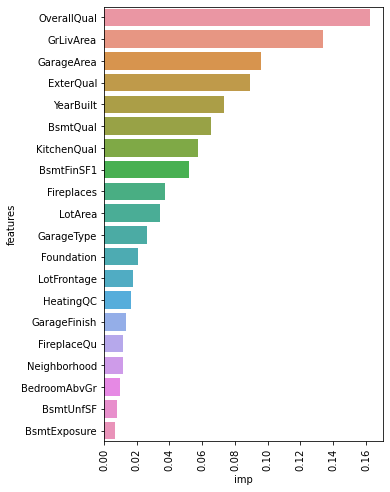

In [221]:
imp_df = pd.DataFrame({'features':X_train_copy.columns, 'imp':rfr.feature_importances_}).sort_values(by=['imp'], ascending=False)
imp_df = imp_df[:20]
plt.figure(figsize=(5,8))
sns.barplot(x=imp_df.imp, y=imp_df.features)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

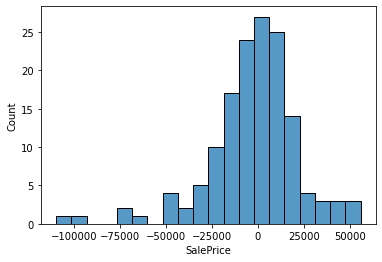

In [222]:
sns.histplot(y_val - y_pred)

## Comparing Models

In [223]:
# vanilla_linear_regression
# ENreg
# lasso
# ridge
# feat_names, lr_mlxtend
# regressor_OLS
# xgbr
# rfr

In [224]:
model_dict

{'vanilla_linear_regression': [32053.095397745885,
  25779.714268262076,
  0.8277488060019488,
  0.8865625924712075],
 'ENreg': [38316.81050445832,
  32552.688825270074,
  0.7538493476031198,
  0.819126964499927],
 'lasso': [32053.095747705964,
  25778.509259490234,
  0.8277488022406245,
  0.8865731969236088],
 'ridge': [32296.476830362637,
  25665.740342350215,
  0.8251230437768077,
  0.8875634047180159],
 'lr_mlxtend': [32407.801010332543,
  25693.641780058737,
  0.8239153834818104,
  0.8873188103424505],
 'regressor_OLS': [32134.547039115896,
  26077.941891246235,
  0.8268722623399343,
  0.8839228543483857],
 'xgbr': [24596.82421365921,
  25259.019270890327,
  0.89856674470391,
  0.891098700493482],
 'rfr': [28498.145353667478,
  28572.109250289664,
  0.8638381375143974,
  0.8606571471719313]}

In [225]:
model_dict.keys()

dict_keys(['vanilla_linear_regression', 'ENreg', 'lasso', 'ridge', 'lr_mlxtend', 'regressor_OLS', 'xgbr', 'rfr'])

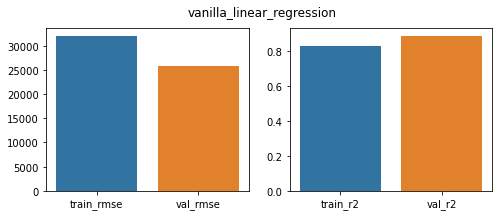

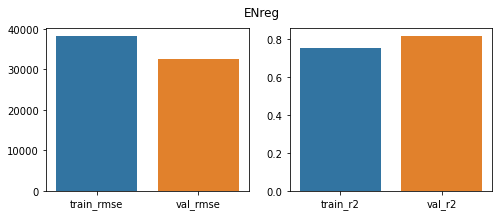

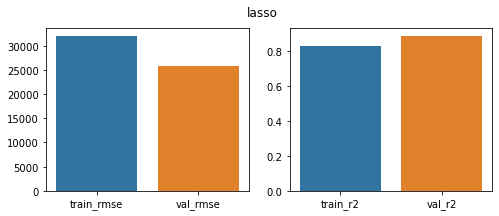

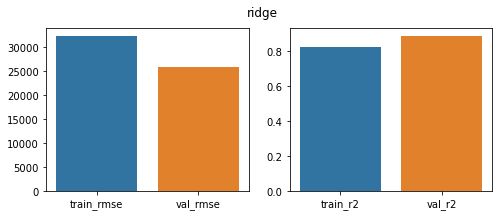

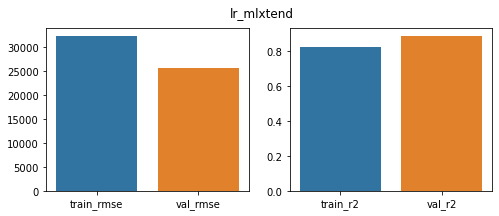

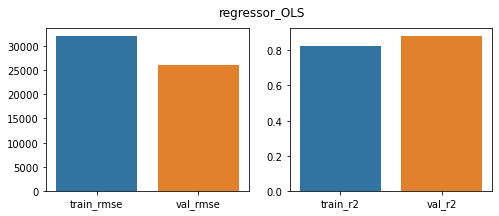

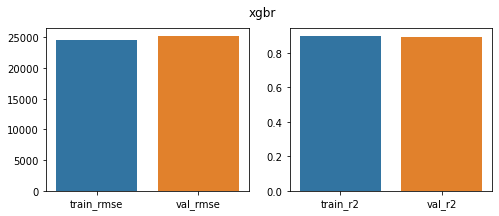

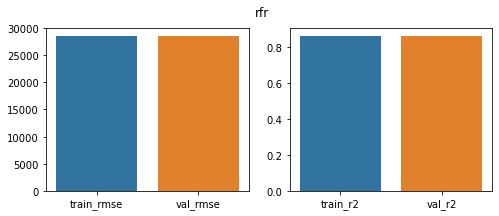

In [226]:
for i in model_dict.keys():
    plt.figure(figsize=(8,3))
    plt.subplot(1,2,1)
    sns.barplot(['train_rmse', 'val_rmse'], model_dict[i][:2])
    plt.subplot(1,2,2)
    sns.barplot(['train_r2', 'val_r2'], model_dict[i][2:])
    plt.suptitle(i)
    plt.show()

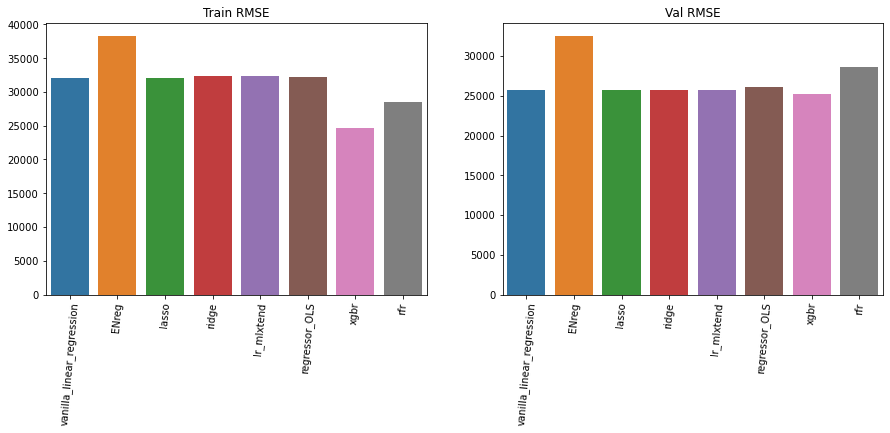

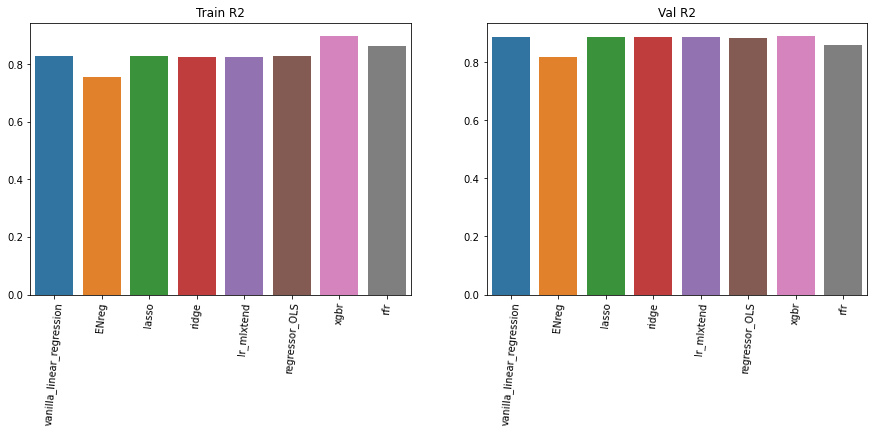

In [227]:
train_rmse = []
val_rmse = []

train_r2 = []
val_r2 = []

for i in model_dict.keys():
    train_rmse.append(model_dict[i][0])
    val_rmse.append(model_dict[i][1])
    
    train_r2.append(model_dict[i][2])
    val_r2.append(model_dict[i][3])

plt.figure(figsize=(15,5))
    
plt.subplot(1,2,1)
plt.title('Train RMSE')
sns.barplot(list(model_dict.keys()), train_rmse)
plt.xticks(rotation=85)

plt.subplot(1,2,2)
plt.title('Val RMSE')
sns.barplot(list(model_dict.keys()), val_rmse)
plt.xticks(rotation=85)

plt.show()

plt.figure(figsize=(15,5))
    
plt.subplot(1,2,1)
plt.title('Train R2')
sns.barplot(list(model_dict.keys()), train_r2)
plt.xticks(rotation=85)

plt.subplot(1,2,2)
plt.title('Val R2')
sns.barplot(list(model_dict.keys()), val_r2)
plt.xticks(rotation=85)

plt.show()

In [228]:
# vanilla
# xgbr

In [229]:
model_dict.keys()

dict_keys(['vanilla_linear_regression', 'ENreg', 'lasso', 'ridge', 'lr_mlxtend', 'regressor_OLS', 'xgbr', 'rfr'])

In [230]:
def test_score(name, model, X_test, perform_df):
    y_pred = model.predict(X_test)

    rms = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = (r2_score(y_test, y_pred))
#     print(f'{name} Test Errors: RMSE: {rms}, R Sq: {r2}')
    perform_df = perform_df.append({'Model':name, 'Test RMSE':rms, 'Test R2':r2}, ignore_index=True)
    return rms, r2, perform_df

In [231]:
perform_df = pd.DataFrame({'Model':[], 'Test RMSE':[], 'Test R2':[]})

rms, r2, perform_df = test_score('Vanilla Lin Reg', vanilla_linear_regression, X_test, perform_df)
rms, r2, perform_df = test_score('Lasso', lasso, X_test[X_train.columns], perform_df)
rms, r2, perform_df = test_score('Rigde', ridge, X_test[X_train.columns], perform_df)
rms, r2, perform_df = test_score('Elastic Net', ENreg, X_test[X_train.columns], perform_df)
rms, r2, perform_df = test_score('mlxtend_lin', lr_mlxtend, X_test[feat_names], perform_df)

X_test_opt = np.append(arr = np.ones((len(X_test),1)).astype(float), 
                        values = X_test[feat_names_stats], axis = 1)
rms, r2, perform_df = test_score('statsmodel Lin Reg', regressor_OLS, X_test_opt, perform_df)

rms, r2, perform_df = test_score('XGBoost', xgbr, X_test[X_train_copy.columns].apply(pd.to_numeric), perform_df)
rms, r2, perform_df = test_score('Random Forest', rfr, X_test[X_train_copy.columns].apply(pd.to_numeric), perform_df)

perform_df

Model     Test RMSE   Test R2
0     Vanilla Lin Reg  43736.575308  0.796695
1               Lasso  43736.007030  0.796701
2               Rigde  44458.340109  0.789930
3         Elastic Net  46706.521566  0.768147
4         mlxtend_lin  43237.904333  0.801305
5  statsmodel Lin Reg  43628.545621  0.797698
6             XGBoost  49059.087245  0.744202
7       Random Forest  48187.309314  0.753212

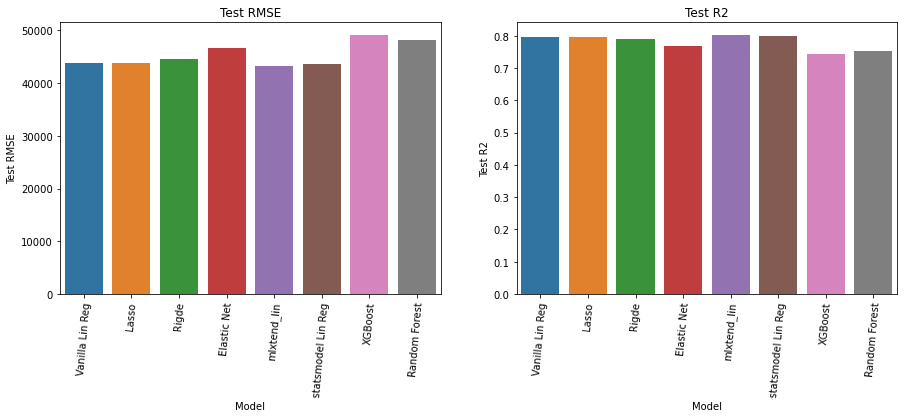

In [232]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Test RMSE')
plt.xticks(rotation=85)
sns.barplot(data=perform_df, x='Model', y='Test RMSE')

plt.subplot(1,2,2)
plt.title('Test R2')
sns.barplot(data=perform_df, x='Model', y='Test R2')
plt.xticks(rotation=85)

plt.show()

The best model is:

In [233]:
perform_df[perform_df.Model == 'mlxtend_lin']

Model     Test RMSE   Test R2
4  mlxtend_lin  43237.904333  0.801305

In [234]:
y_pred = lr_mlxtend.predict(X_test[feat_names])

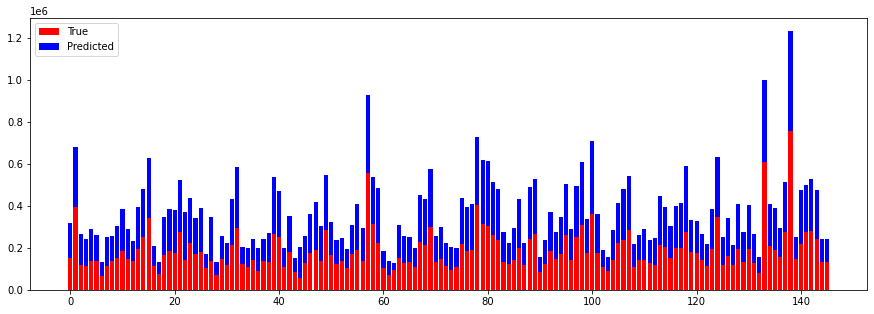

In [235]:
plt.figure(figsize=(15,5))
# plt.bar(x = np.arange(len(y_test)), y = y_test, height=10)
# plt.bar(x = np.arange(len(y_test)), y = y_pred, height=10)

plt.bar(np.arange(len(y_test)), y_test, color='r', label='True')
plt.bar(np.arange(len(y_test)), y_pred, bottom=y_test, color='b', label='Predicted')
plt.legend()
plt.show()

## Predicting on given Test Data

In [236]:
pred_on = test[feat_names]

In [237]:
X_train[feat_names].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1168 entries, 254 to 1126
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1168 non-null   object 
 1   LotArea       1168 non-null   int64  
 2   LotShape      1168 non-null   int32  
 3   Neighborhood  1168 non-null   int32  
 4   HouseStyle    1168 non-null   int32  
 5   OverallQual   1168 non-null   object 
 6   OverallCond   1168 non-null   object 
 7   YearBuilt     1168 non-null   int32  
 8   RoofStyle     1168 non-null   int32  
 9   ExterQual     1168 non-null   int32  
 10  BsmtQual      1168 non-null   int32  
 11  BsmtExposure  1168 non-null   int32  
 12  BsmtFinType1  1168 non-null   int32  
 13  GrLivArea     1168 non-null   int64  
 14  BsmtFullBath  1168 non-null   object 
 15  KitchenQual   1168 non-null   int32  
 16  Fireplaces    1168 non-null   object 
 17  FireplaceQu   1168 non-null   int32  
 18  GarageFinish  1168 non-nul

In [238]:
pred_on.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSSubClass    1459 non-null   object 
 1   LotArea       1459 non-null   int64  
 2   LotShape      1459 non-null   int32  
 3   Neighborhood  1459 non-null   int32  
 4   HouseStyle    1459 non-null   int32  
 5   OverallQual   1459 non-null   object 
 6   OverallCond   1459 non-null   object 
 7   YearBuilt     1459 non-null   int32  
 8   RoofStyle     1459 non-null   int32  
 9   ExterQual     1459 non-null   int32  
 10  BsmtQual      1459 non-null   int32  
 11  BsmtExposure  1459 non-null   int32  
 12  BsmtFinType1  1459 non-null   int32  
 13  GrLivArea     1459 non-null   int64  
 14  BsmtFullBath  1457 non-null   object 
 15  KitchenQual   1459 non-null   int32  
 16  Fireplaces    1459 non-null   object 
 17  FireplaceQu   1459 non-null   int32  
 18  GarageFinish  1459 non-null 

In [239]:
X_train.GarageArea.median()

482.0

In [240]:
pred_on.BsmtFullBath.unique()

array([0.0, 1.0, 2.0, 3.0, nan], dtype=object)

In [241]:
pred_on.loc[pred_on['BsmtFullBath'].isnull(), 'BsmtFullBath'] = '0'
pred_on.loc[pred_on['GarageArea'].isnull(), 'GarageArea'] = pred_on['GarageArea'].median()

In [242]:
final_submission = lr_mlxtend.predict(pred_on)

In [243]:
np.mean(final_submission), np.median(final_submission)

(174945.87031742427, 160487.98266231493)

<AxesSubplot:>

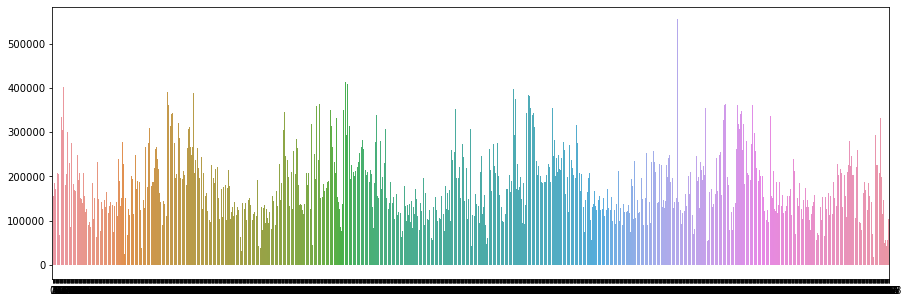

In [244]:
plt.figure(figsize=(15,5))
sns.barplot(x=np.arange(len(pred_on)), y=final_submission)

In [245]:
submission_file = pd.DataFrame({'Id':pd.read_csv('test.csv').Id, 'SalePrice':final_submission})

In [246]:
submission_file.to_csv('Submission.csv',index=False)

In [247]:
pd.read_csv('Submission.csv')

Id      SalePrice
0     1461  108576.031452
1     1462  156325.529086
2     1463  166310.895958
3     1464  184840.397003
4     1465  190607.283420
...    ...            ...
1454  2915   53882.327255
1455  2916   55481.742287
1456  2917  153527.893569
1457  2918  103194.848470
1458  2919  224412.532502

[1459 rows x 2 columns]

## Improvements Possible:

In [248]:
# - Treating the outliers with more subject matter expertise.
# - New features can be added through feature engineering.
# - Ensemble can be tried - like stacking regressor
# - Can try with log1p transformation for Skewness
# - Can have more elaborate interpretation of feature importances and coefficients for better business use.